<a href="https://colab.research.google.com/github/amanchauhan786/airly-vision-forecast/blob/main/delhi_gases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

github_url = "https://raw.githubusercontent.com/Aditya-devop/Delhi_Pollution_Data_analysis/main/Updated_data_Csv(No%20title)/Updated_COMP2.csv"

try:
    df = pd.read_csv(github_url)
    print(df.head())
except Exception as e:
    print(f"An error occurred: {e}")


          From Date           To Date    PM10   PM2.5    CO  Ozone    NO2
0  01-01-2023 00:00  01-01-2023 01:00  266.00  148.00  2.70   8.30  83.95
1  01-01-2023 01:00  01-01-2023 02:00  257.00  145.00  2.25  13.50  69.97
2  01-01-2023 02:00  01-01-2023 03:00  238.75  158.67  2.40   8.65  63.95
3  01-01-2023 03:00  01-01-2023 04:00  248.00  171.00  2.70   8.07  58.95
4  01-01-2023 04:00  01-01-2023 05:00  204.25  132.67  2.93   7.77  62.90


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn requests folium


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import folium

# GitHub Base URL (change index from 1 to 40)
BASE_URL = "https://raw.githubusercontent.com/Aditya-devop/Delhi_Pollution_Data_analysis/main/Updated_data_Csv(No%20title)/Updated_COMP"

# Load all datasets
dfs = []
for i in range(1, 41):
    file_url = f"{BASE_URL}{i}.csv"
    try:
        response = requests.get(file_url)
        if response.status_code == 200:
            csv_data = StringIO(response.text)
            df = pd.read_csv(csv_data)
            df['Location'] = f"Location_{i}"  # Assign a unique location identifier
            df['File'] = f"COMP{i}"  # File source identifier
            dfs.append(df)
            print(f"Loaded: COMP{i}")
        else:
            print(f"Failed to load: COMP{i}")
    except Exception as e:
        print(f"Error loading COMP{i}: {e}")


Loaded: COMP1
Loaded: COMP2
Loaded: COMP3
Loaded: COMP4
Loaded: COMP5
Loaded: COMP6
Loaded: COMP7
Loaded: COMP8
Loaded: COMP9
Loaded: COMP10
Loaded: COMP11
Loaded: COMP12
Loaded: COMP13
Loaded: COMP14
Loaded: COMP15
Loaded: COMP16
Loaded: COMP17
Loaded: COMP18
Loaded: COMP19
Loaded: COMP20
Loaded: COMP21
Loaded: COMP22
Loaded: COMP23
Loaded: COMP24
Loaded: COMP25
Loaded: COMP26
Loaded: COMP27
Loaded: COMP28
Loaded: COMP29
Loaded: COMP30
Loaded: COMP31
Loaded: COMP32
Loaded: COMP33
Loaded: COMP34
Loaded: COMP35
Loaded: COMP36
Loaded: COMP37
Loaded: COMP38
Loaded: COMP39
Loaded: COMP40


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import folium

In [ ]:

# Define dataset names as Loc1, Loc2, ..., Loc40 (except Loc39)
location_names = {i: f"Loc{i}" for i in range(1, 41) if i != 39}

# GitHub base URL for data files
BASE_URL = "https://raw.githubusercontent.com/Aditya-devop/Delhi_Pollution_Data_analysis/main/Updated_data_Csv(No%20title)/Updated_COMP"


In [ ]:
# Function to preprocess and clean data
def preprocess_data(df, location):
    # Add location column
    df['Location'] = location

    # Convert date columns to datetime
    df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')
    df['To Date'] = pd.to_datetime(df['To Date'], format='%d-%m-%Y %H:%M')

    # Handle missing values (forward fill)
    df.fillna(method='ffill', inplace=True)

    # Standardize column names
    df.columns = df.columns.str.strip().str.replace(' ', '_')

    return df

In [ ]:
# Function to preprocess and clean data
def preprocess_data(df, location):
    # Add location column
    df['Location'] = location

    # Convert date columns to datetime
    df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M')
    df['To Date'] = pd.to_datetime(df['To Date'], format='%d-%m-%Y %H:%M')

    # Handle missing values (forward fill)
    df.ffill(inplace=True)  # Use ffill() instead of fillna(method='ffill')

    # Standardize column names
    df.columns = df.columns.str.strip().str.replace(' ', '_')

    return df

In [ ]:
# Function to perform EDA and visualization
def perform_eda(df, location):
    print(f"\n📍 Analyzing Data for: {location}")

    # Display sample data
    print(f"\nSample Data for {location}:\n", df.head())

    # Summary statistics
    print(f"\nSummary Statistics for {location}:\n", df.describe())

    # Check for missing values
    print(f"\nMissing Values for {location}:\n", df.isnull().sum())

    # Plot pollutant trends
    plt.figure(figsize=(12, 6))
    for pollutant in ['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']:
        plt.plot(df['From_Date'], df[pollutant], label=pollutant)
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.title(f'Pollutant Trends for {location}')
    plt.legend()
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(df[['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {location}')
    plt.show()

    # Boxplot for outlier analysis
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']])
    plt.title(f'Boxplot for Pollutants in {location}')
    plt.show()

In [ ]:
# Function to train and evaluate model
def train_model(df, location):
    print(f"\n🚀 Training Model for: {location}")

    # Feature selection
    features = ['PM10', 'CO', 'Ozone', 'NO2']
    X = df[features]
    y = df['PM2.5']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest Regression Model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Model Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\nML Performance for {location}:\nMAE: {mae:.2f}, MSE: {mse:.2f}")

    # Feature importance
    feature_importance = pd.Series(rf_model.feature_importances_, index=features)
    plt.figure(figsize=(8, 6))
    feature_importance.sort_values().plot(kind='barh')
    plt.title(f'Feature Importance for {location}')
    plt.show()



📍 Analyzing Data for: Loc1

Sample Data for Loc1:
             From_Date             To_Date   PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  174.0  134.0  0.88   4.47  29.93   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  138.0  112.0  0.80   3.80  26.42   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  134.0  103.0  0.80   3.10  31.70   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  139.0  114.0  0.93   2.60  29.10   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  169.0  136.0  1.00   2.78  25.90   

  Location  
0     Loc1  
1     Loc1  
2     Loc1  
3     Loc1  
4     Loc1  

Summary Statistics for Loc1:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   180.584821    97.933342   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     1.000000     1.000000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00    91.75

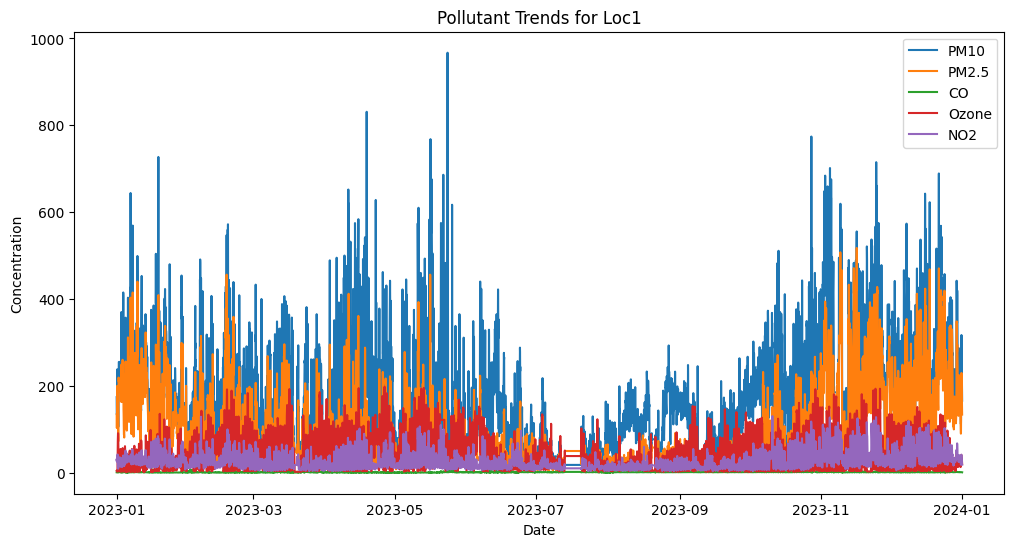

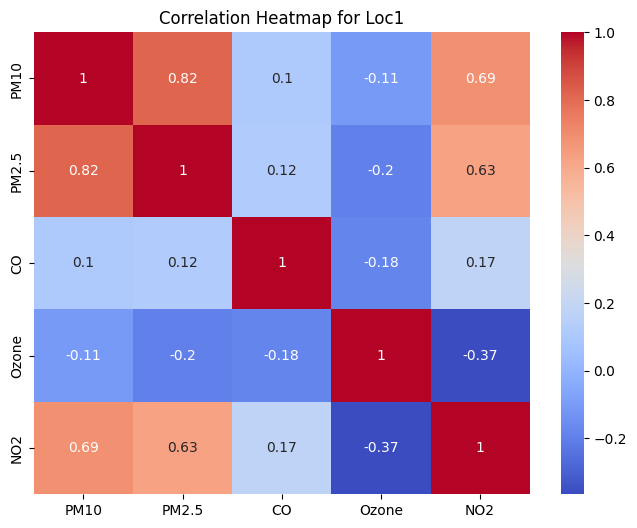

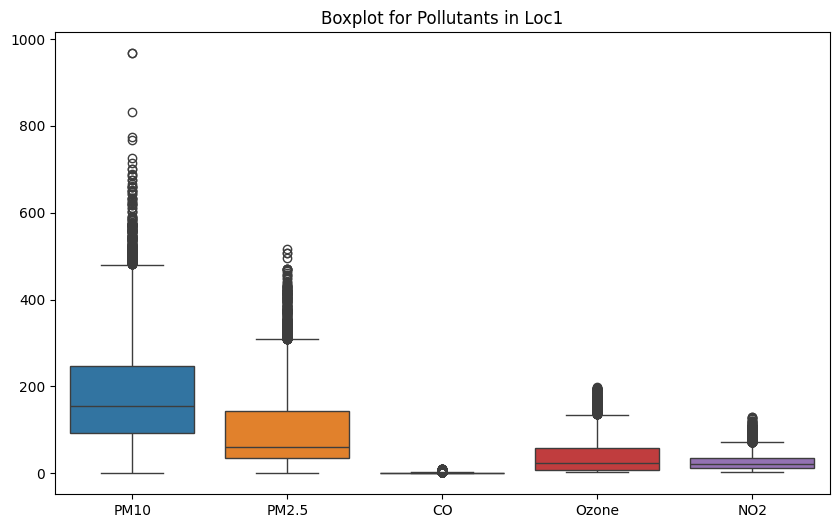


🚀 Training Model for: Loc1

ML Performance for Loc1:
MAE: 24.12, MSE: 1390.31


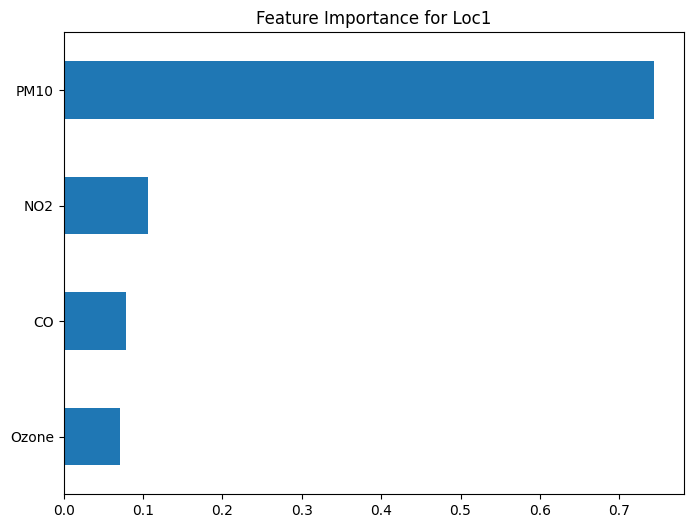


📍 Analyzing Data for: Loc2

Sample Data for Loc2:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  266.00  148.00  2.70   8.30  83.95   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  257.00  145.00  2.25  13.50  69.97   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  238.75  158.67  2.40   8.65  63.95   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  248.00  171.00  2.70   8.07  58.95   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  204.25  132.67  2.93   7.77  62.90   

  Location  
0     Loc2  
1     Loc2  
2     Loc2  
3     Loc2  
4     Loc2  

Summary Statistics for Loc2:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   291.768511   125.026433   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     7.000000     1.000000   
25%    2023-04-02 05:45:00  2023-04-02 06:45

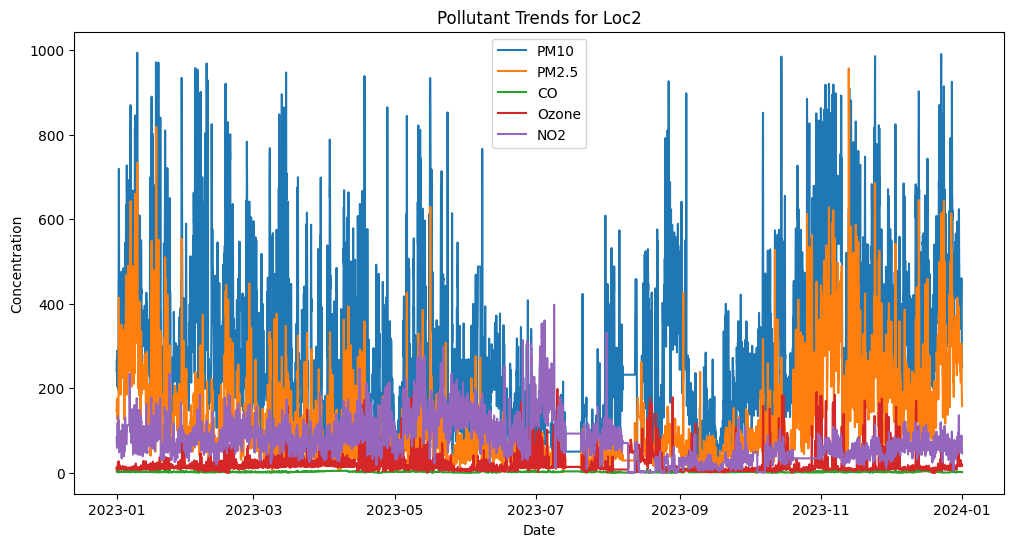

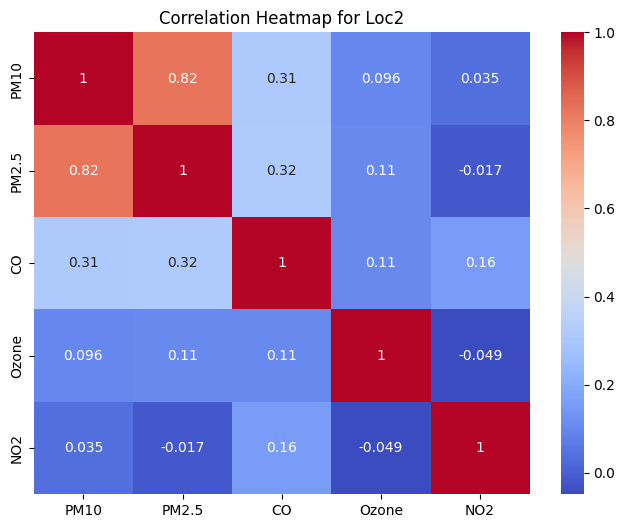

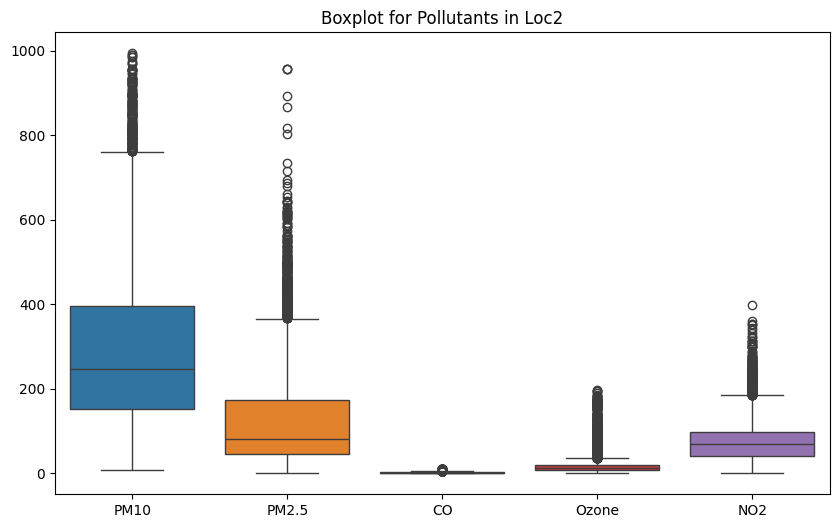


🚀 Training Model for: Loc2

ML Performance for Loc2:
MAE: 31.64, MSE: 2651.90


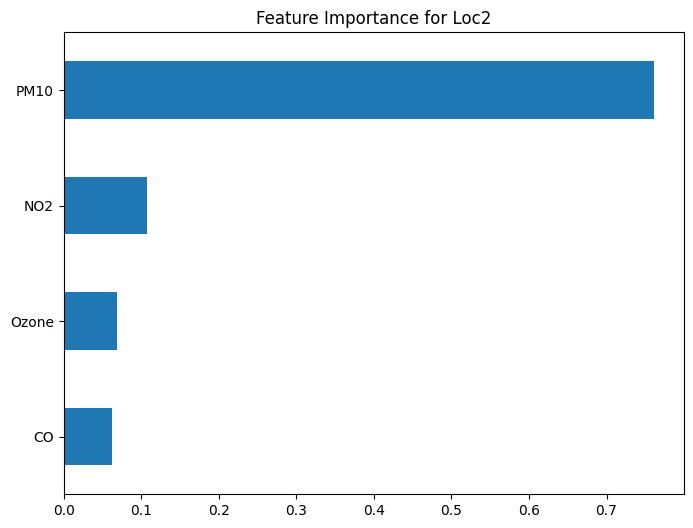


📍 Analyzing Data for: Loc3

Sample Data for Loc3:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  200.50  145.00  0.70   2.15  39.40   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  182.25  138.75  0.20   2.15  36.52   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  177.75  138.50  0.10   2.00  35.60   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  179.75  140.00  0.15   2.02  34.05   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  189.75  142.75  0.23   2.25  31.92   

  Location  
0     Loc3  
1     Loc3  
2     Loc3  
3     Loc3  
4     Loc3  

Summary Statistics for Loc3:
                  From_Date              To_Date         PM10       PM2.5  \
count                 8760                 8760  8760.000000  8760.00000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   207.677188    90.62555   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     3.500000     1.00000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00 

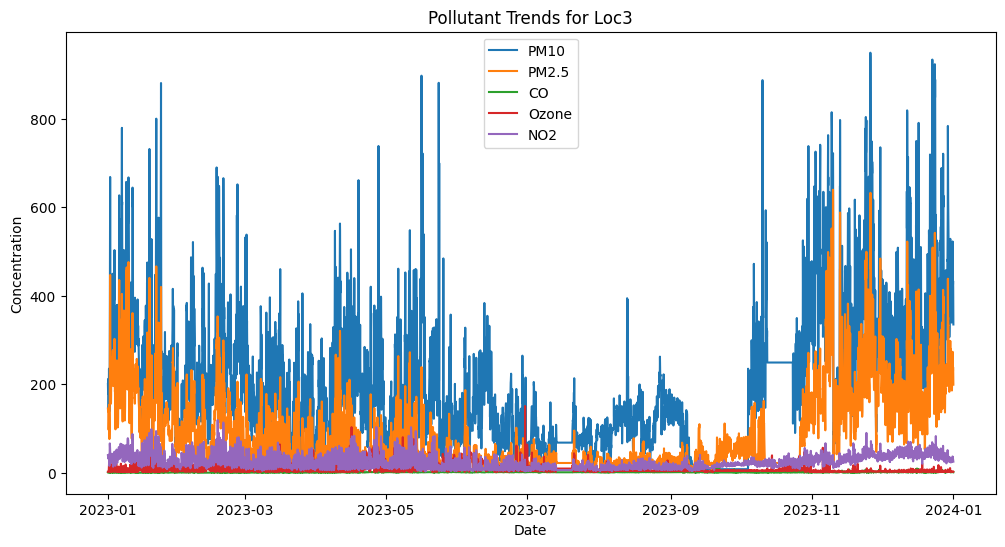

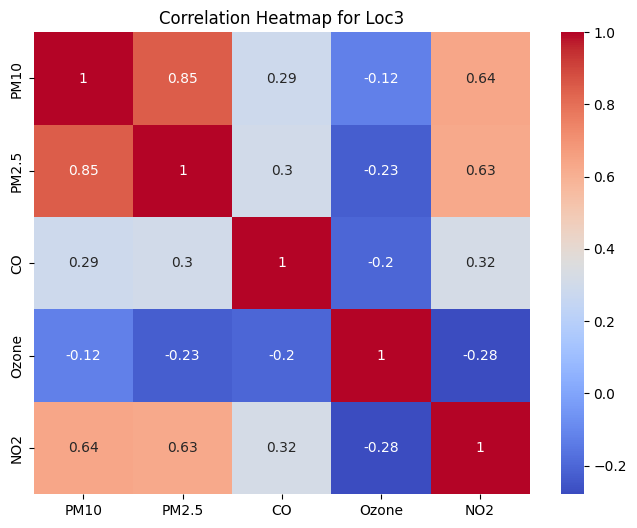

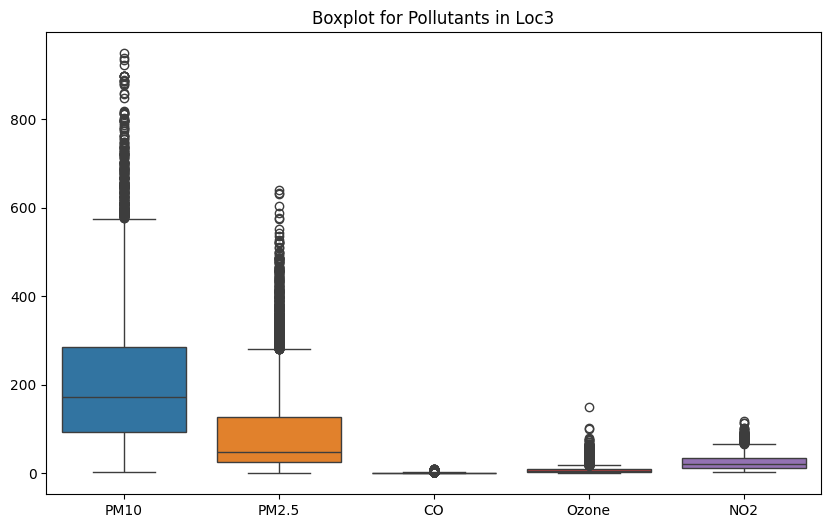


🚀 Training Model for: Loc3

ML Performance for Loc3:
MAE: 18.83, MSE: 882.70


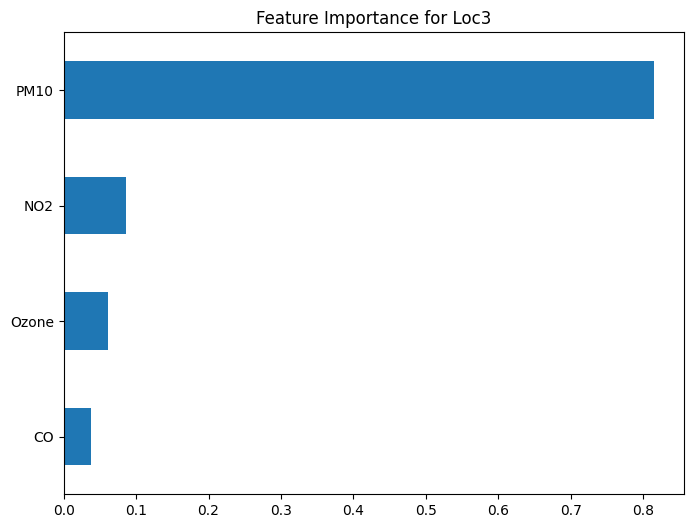


📍 Analyzing Data for: Loc4

Sample Data for Loc4:
             From_Date             To_Date    PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  122.30  69.44  1.25    NaN  18.85   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  107.56  82.64  1.23    NaN  18.99   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  126.11  86.88  1.24    NaN  19.48   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  124.64  77.52  1.23    NaN  19.60   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  113.10  62.34  1.26   1.24  20.12   

  Location  
0     Loc4  
1     Loc4  
2     Loc4  
3     Loc4  
4     Loc4  

Summary Statistics for Loc4:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   162.839235    84.139484   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     0.350000     0.100000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00   

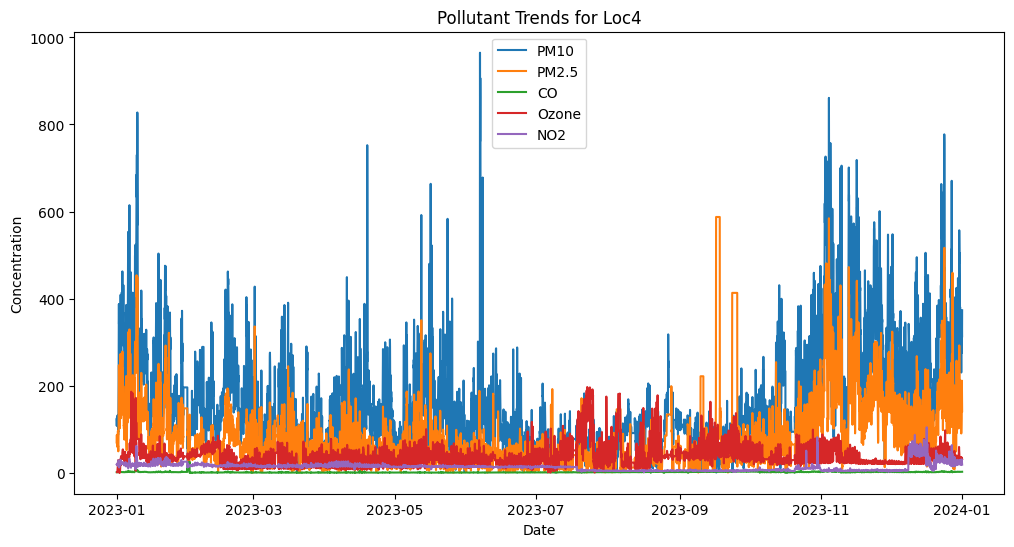

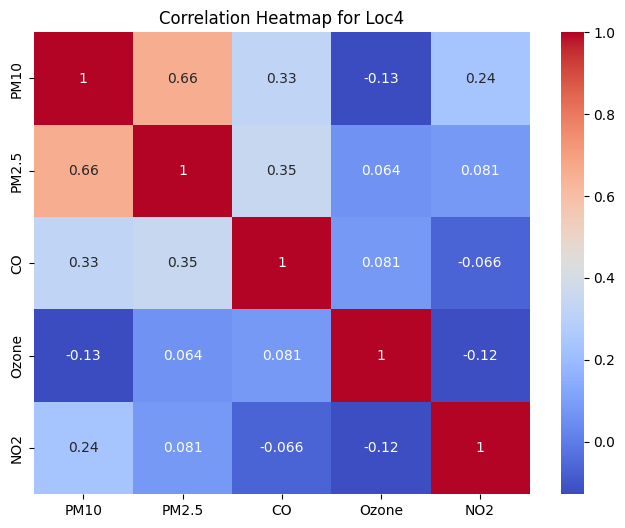

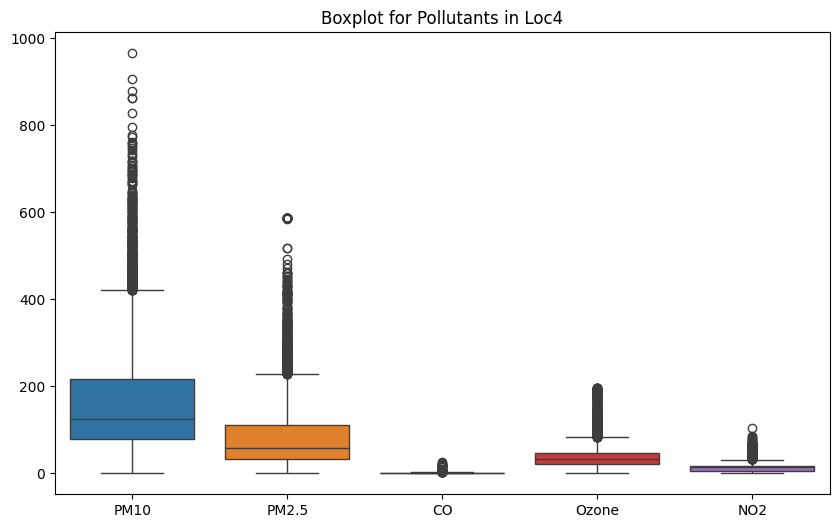


🚀 Training Model for: Loc4

ML Performance for Loc4:
MAE: 22.98, MSE: 1981.36


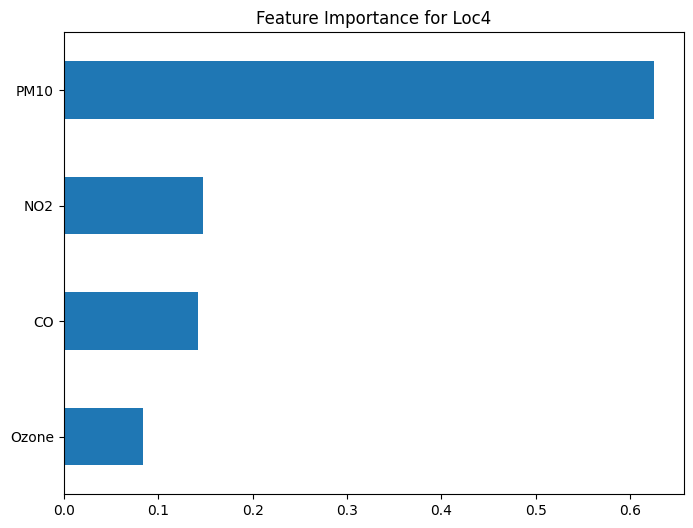


📍 Analyzing Data for: Loc5

Sample Data for Loc5:
             From_Date             To_Date    PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  277.75  181.5  1.17   7.60  14.10   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  239.50  167.5  1.07   5.20  12.55   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  227.50  158.0  1.07   4.88  12.55   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  230.50  159.5  1.00   5.50  12.95   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  234.75  158.0  0.95   1.83  12.95   

  Location  
0     Loc5  
1     Loc5  
2     Loc5  
3     Loc5  
4     Loc5  

Summary Statistics for Loc5:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   236.009341   119.825143   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     2.000000     1.000000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00   

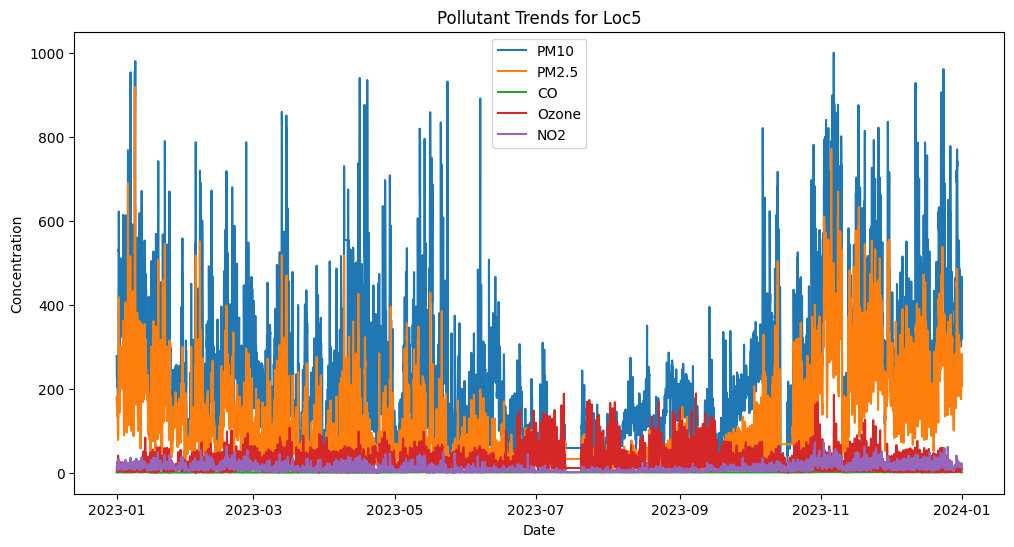

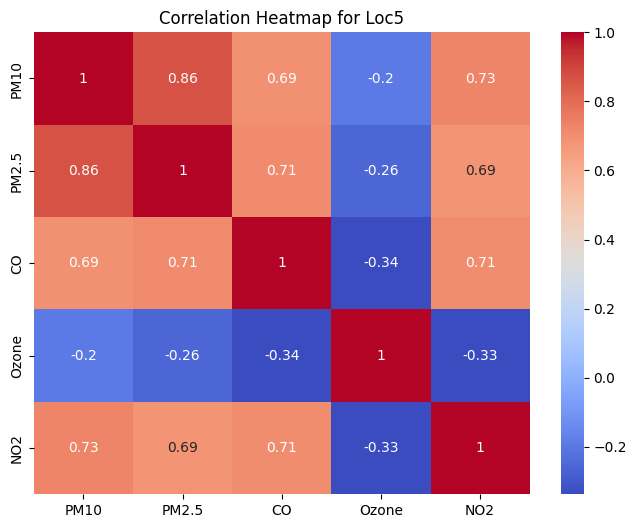

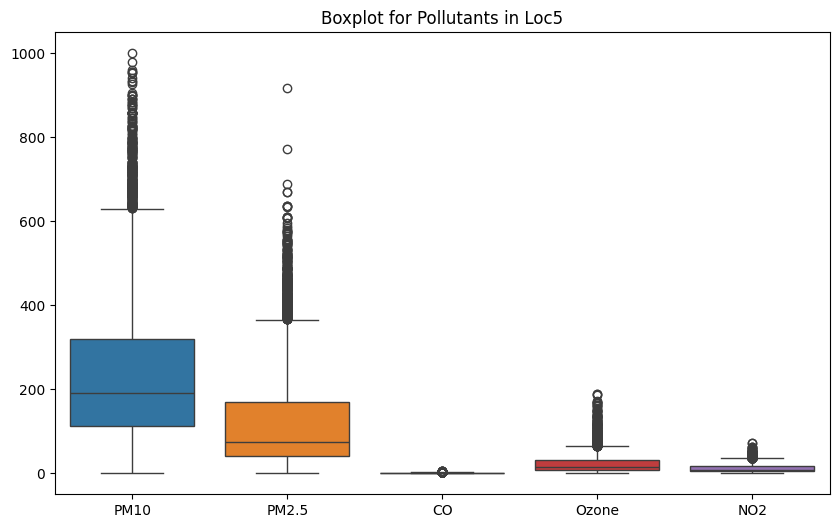


🚀 Training Model for: Loc5

ML Performance for Loc5:
MAE: 25.30, MSE: 1723.97


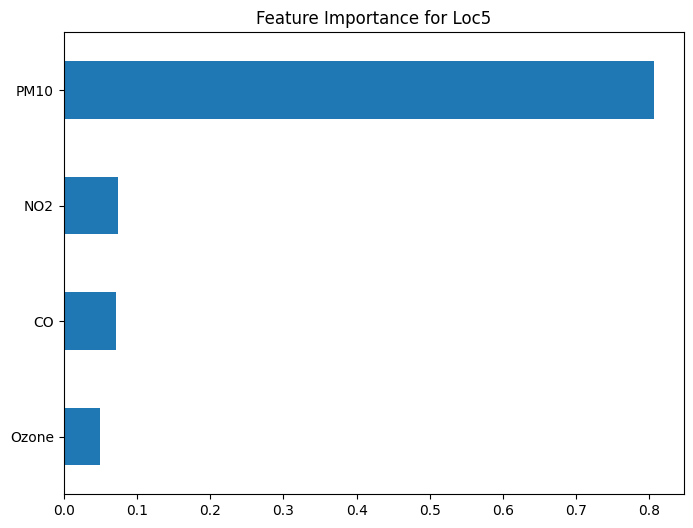


📍 Analyzing Data for: Loc6

Sample Data for Loc6:
             From_Date             To_Date  PM10   PM2.5    CO  Ozone  NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00   NaN  118.55  3.60  19.87  NaN   
1 2023-01-01 01:00:00 2023-01-01 02:00:00   NaN  124.24  3.56  18.07  NaN   
2 2023-01-01 02:00:00 2023-01-01 03:00:00   NaN   93.98  3.51  18.46  NaN   
3 2023-01-01 03:00:00 2023-01-01 04:00:00   NaN  141.71  3.66  18.20  NaN   
4 2023-01-01 04:00:00 2023-01-01 05:00:00   NaN  218.90  3.54  19.09  NaN   

  Location  
0     Loc6  
1     Loc6  
2     Loc6  
3     Loc6  
4     Loc6  

Summary Statistics for Loc6:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8700.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   206.716801    99.078434   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     1.390000     0.860000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00    95.755000    34.1

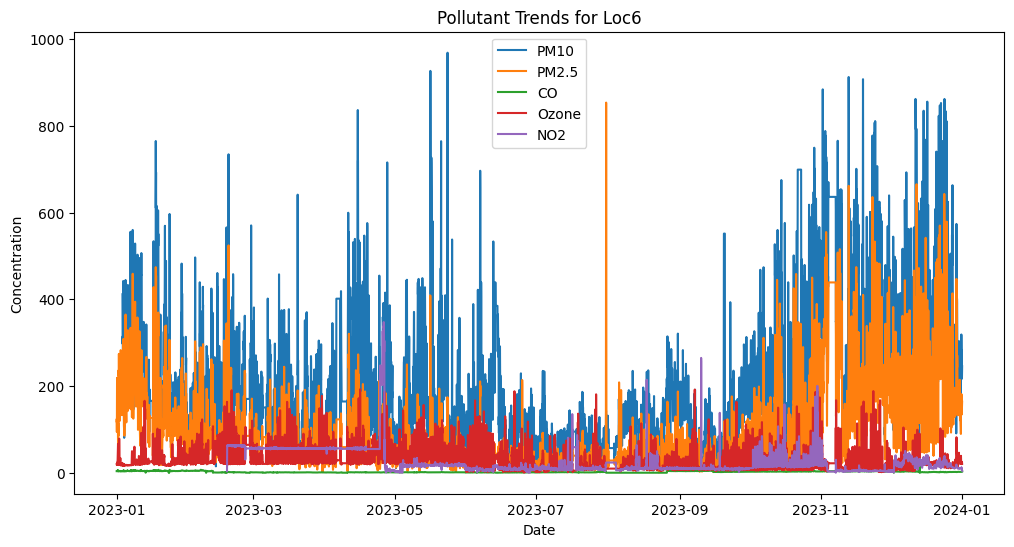

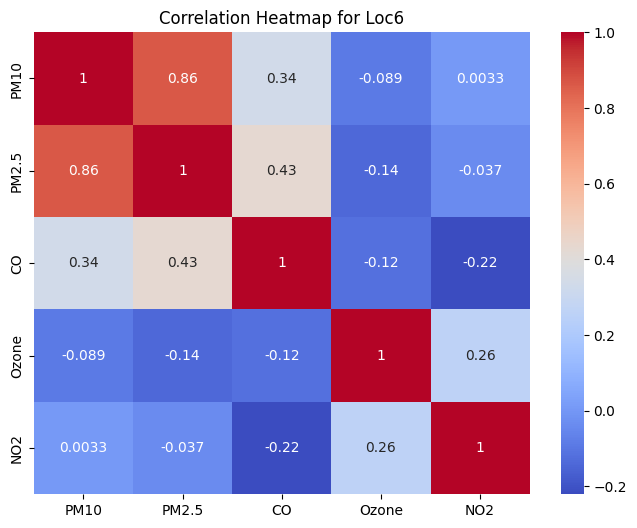

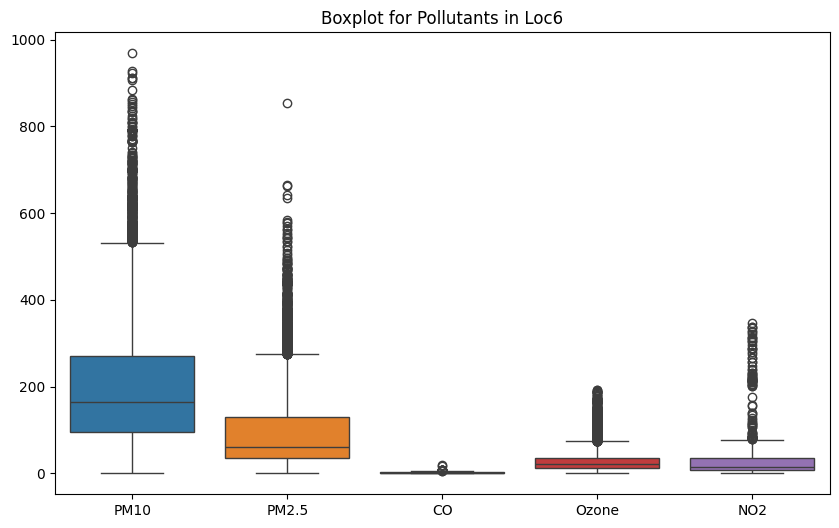


🚀 Training Model for: Loc6

ML Performance for Loc6:
MAE: 18.37, MSE: 1057.68


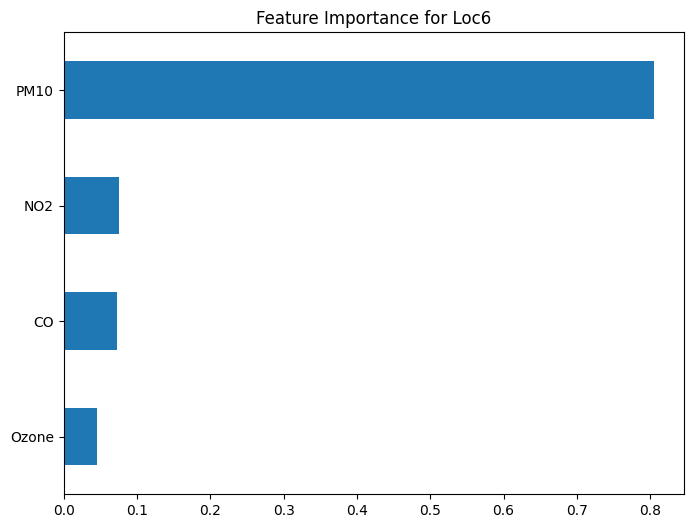


📍 Analyzing Data for: Loc7

Sample Data for Loc7:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  229.35  320.03  1.68  18.23  26.51   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  293.77  205.28  1.58  18.07  26.51   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  253.53  169.93  1.26  17.82  26.52   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  225.88   87.83  0.96  17.64  26.57   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  181.42  168.54  0.83  17.76  26.60   

  Location  
0     Loc7  
1     Loc7  
2     Loc7  
3     Loc7  
4     Loc7  

Summary Statistics for Loc7:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   175.997702    85.482156   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     0.170000     0.130000   
25%    2023-04-02 05:45:00  2023-04-02 06:45

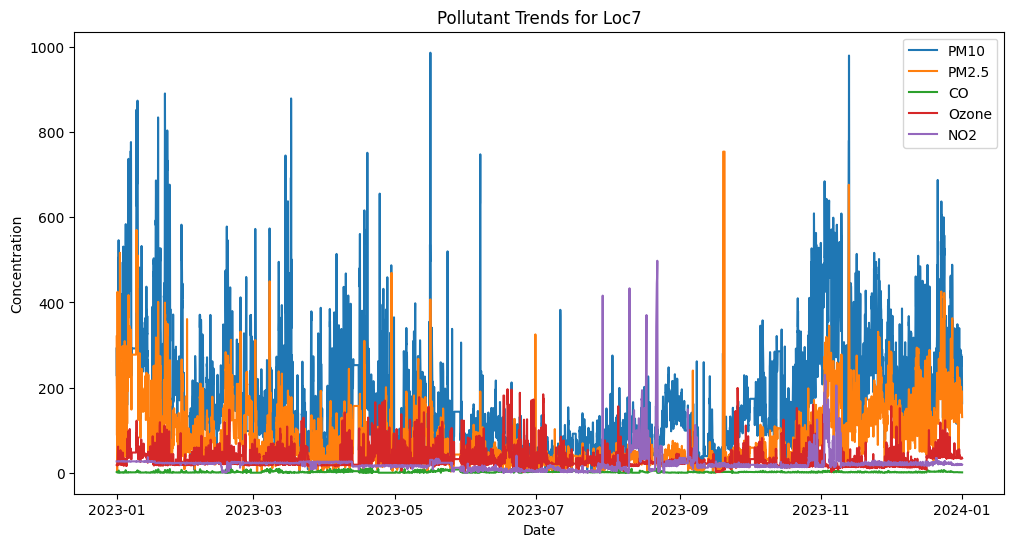

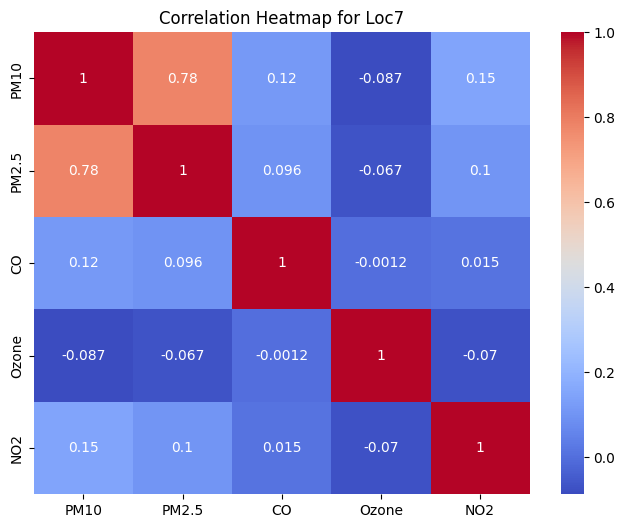

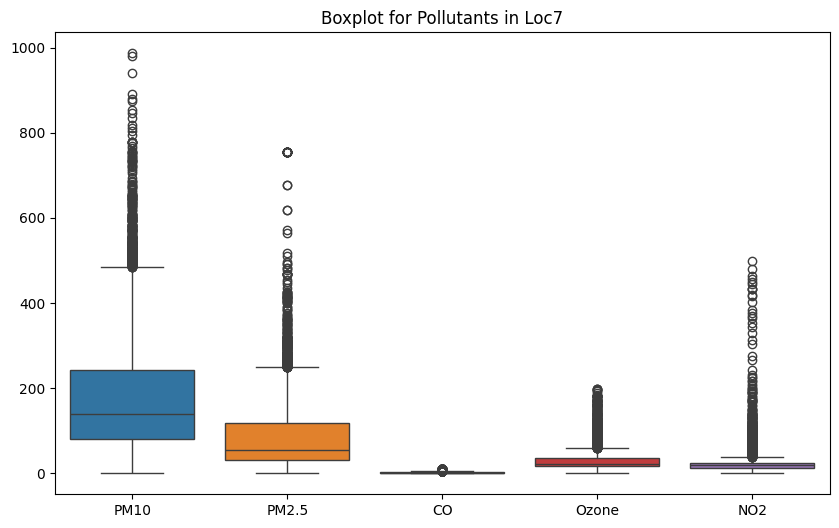


🚀 Training Model for: Loc7

ML Performance for Loc7:
MAE: 18.16, MSE: 1082.55


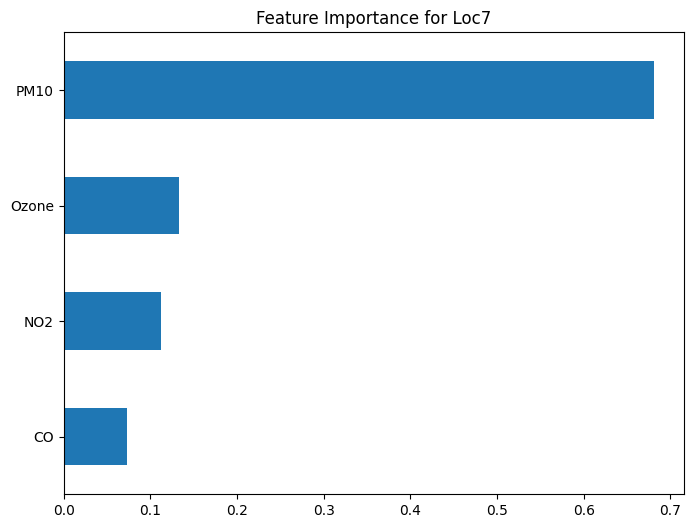


📍 Analyzing Data for: Loc8

Sample Data for Loc8:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  227.80  103.65  1.28  25.70  52.68   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  231.18   98.35  1.16  25.90  32.79   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  236.50  101.90  0.94  25.91  34.39   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  222.90   85.07  0.92  25.75  47.49   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  204.30   87.37  0.81  25.44  42.62   

  Location  
0     Loc8  
1     Loc8  
2     Loc8  
3     Loc8  
4     Loc8  

Summary Statistics for Loc8:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   249.534054    66.780068   
min    2023-01-01 00:00:00  2023-01-01 01:00:00    33.350000     0.100000   
25%    2023-04-02 05:45:00  2023-04-02 06:45

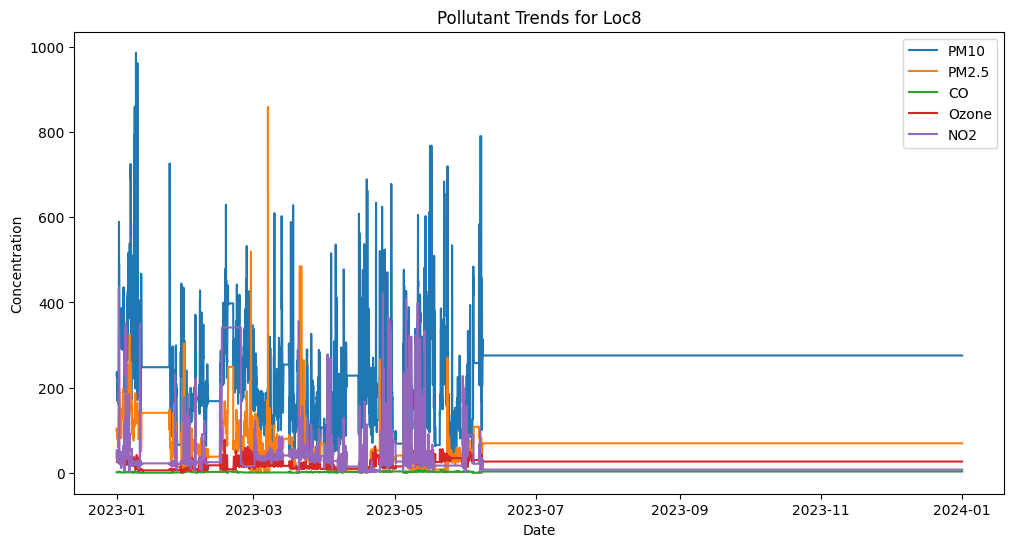

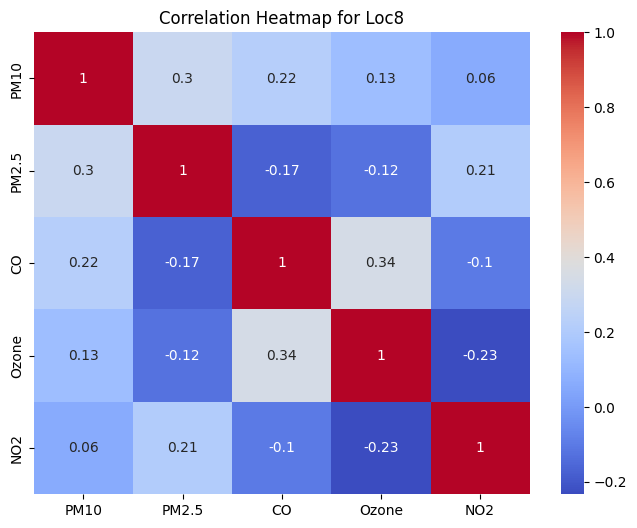

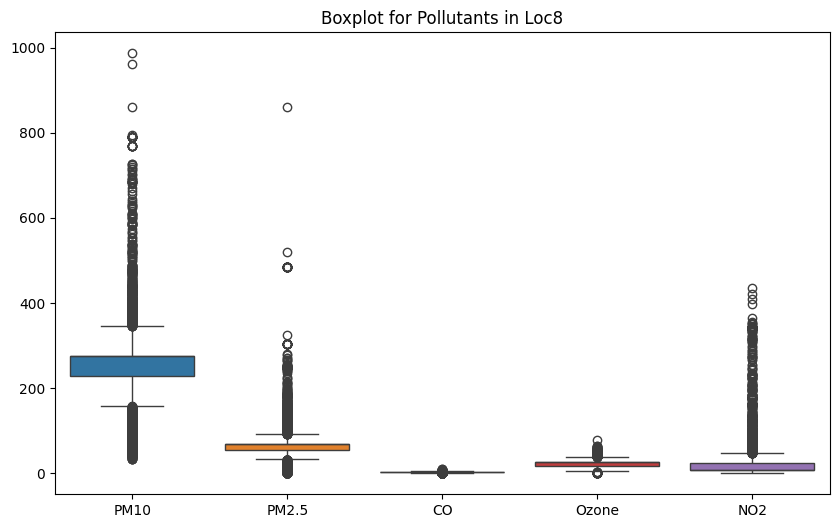


🚀 Training Model for: Loc8

ML Performance for Loc8:
MAE: 6.70, MSE: 527.55


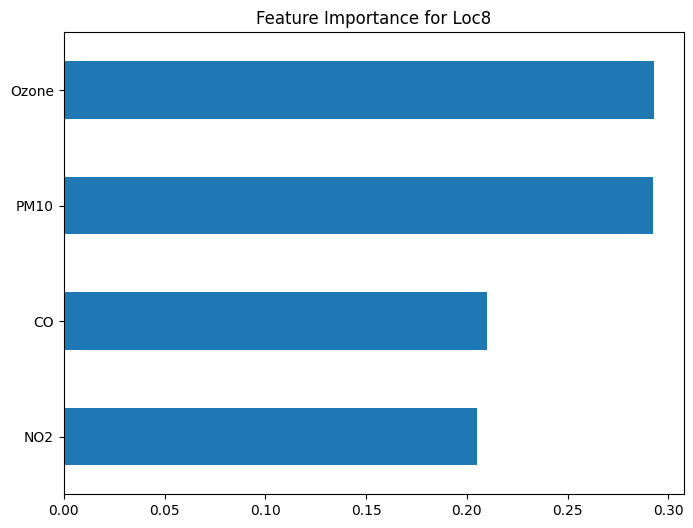


📍 Analyzing Data for: Loc9

Sample Data for Loc9:
             From_Date             To_Date   PM10   PM2.5    CO  Ozone   NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  302.0  198.75  1.33  33.30  6.40   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  242.0  154.00  1.27  29.35  5.05   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  212.0  157.25  1.19  32.12  5.60   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  249.0  200.00  1.08  30.07  6.75   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  236.0  172.00  1.01  32.78  8.95   

  Location  
0     Loc9  
1     Loc9  
2     Loc9  
3     Loc9  
4     Loc9  

Summary Statistics for Loc9:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   215.696029    70.552041   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     5.750000     1.000000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00   104.97

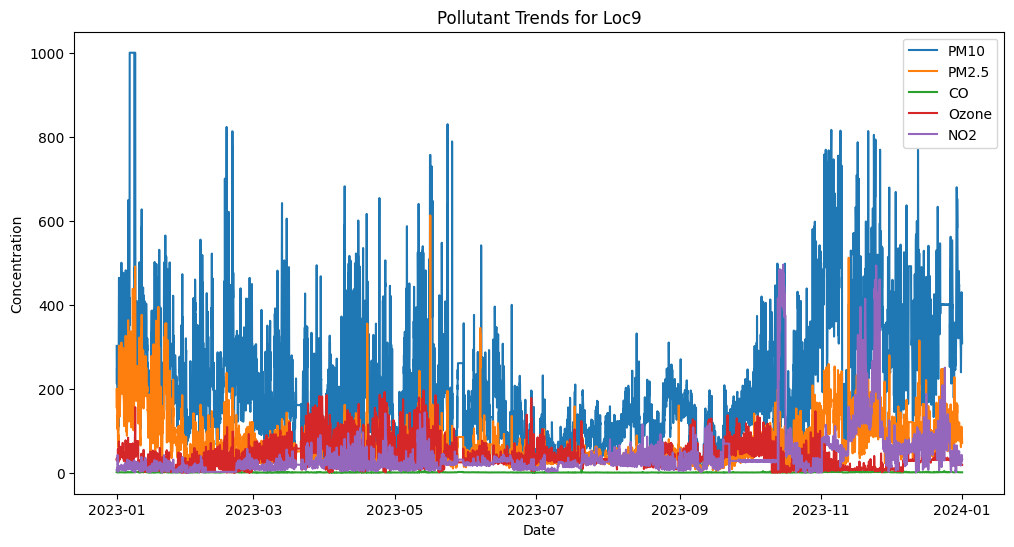

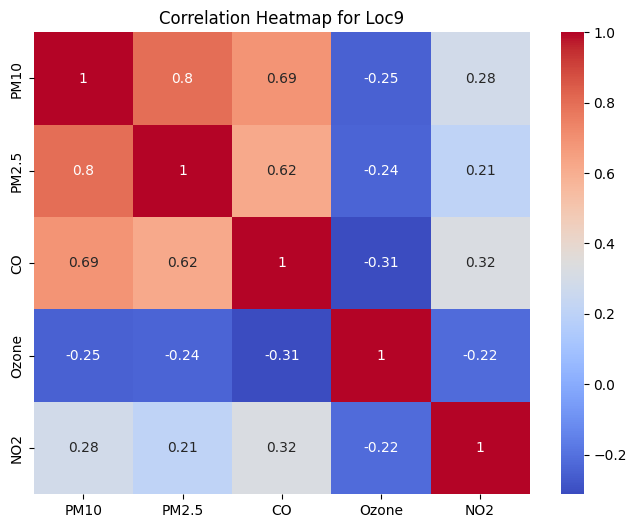

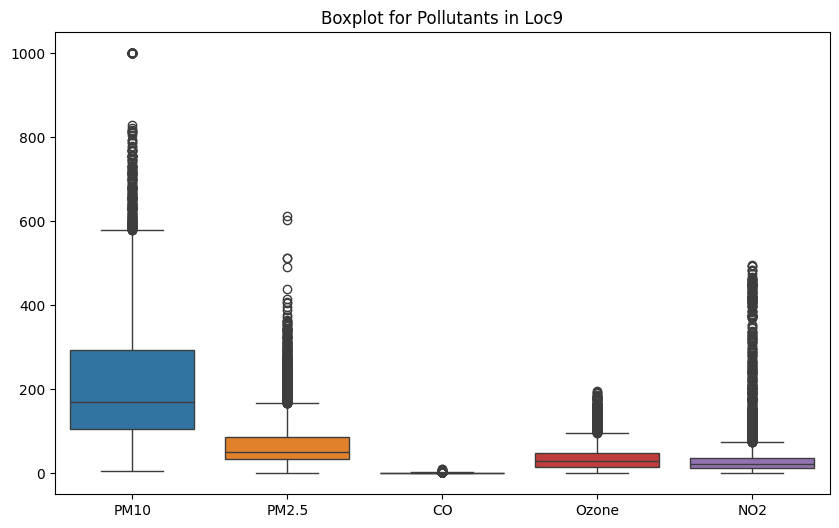


🚀 Training Model for: Loc9

ML Performance for Loc9:
MAE: 13.76, MSE: 737.30


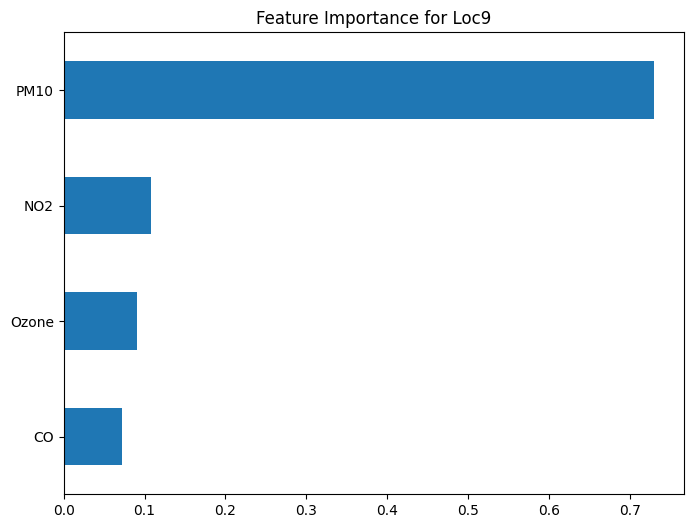


📍 Analyzing Data for: Loc10

Sample Data for Loc10:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  203.50  135.50  1.38   4.30  76.28   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  209.25  152.00  1.20   5.80  71.07   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  198.75  147.50  1.20   4.42  71.07   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  177.25  129.00  0.90   3.97  63.38   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  152.25  111.25  0.62   6.43  50.33   

  Location  
0    Loc10  
1    Loc10  
2    Loc10  
3    Loc10  
4    Loc10  

Summary Statistics for Loc10:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   182.035941    95.721196   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     2.000000     1.000000   
25%    2023-04-02 05:45:00  2023-04-02 06

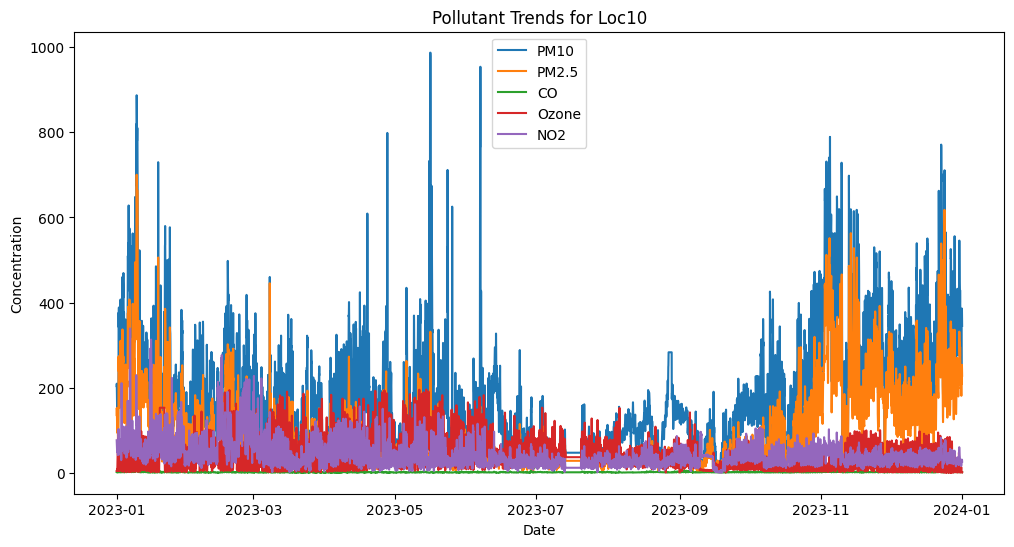

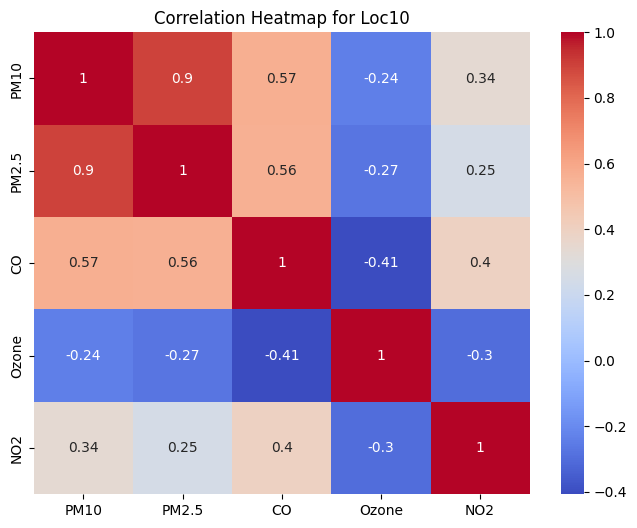

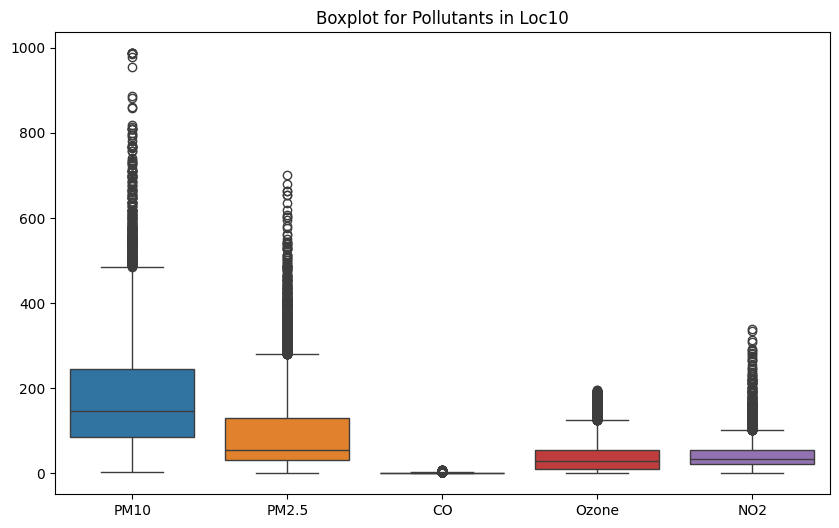


🚀 Training Model for: Loc10

ML Performance for Loc10:
MAE: 18.00, MSE: 751.84


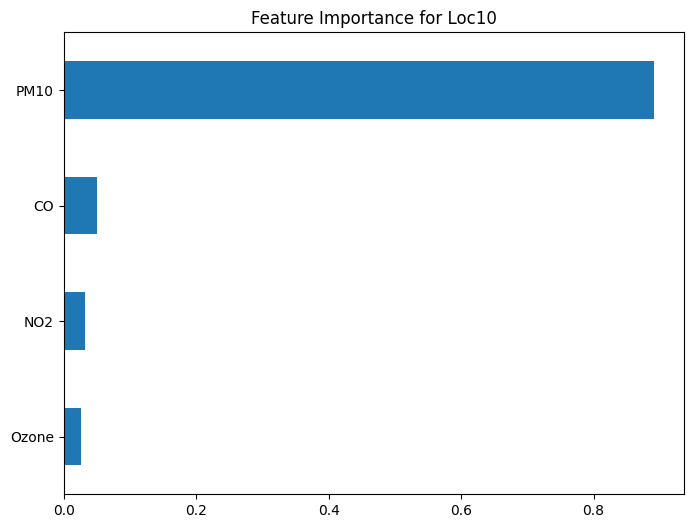


📍 Analyzing Data for: Loc11

Sample Data for Loc11:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  256.25  199.00  1.05   1.30  15.65   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  197.25  153.75  0.85   1.50  15.45   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  165.00  131.75  0.70   1.33  14.00   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  142.75  118.00  0.55   1.30  15.53   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  128.00  105.00  0.45   1.43  15.30   

  Location  
0    Loc11  
1    Loc11  
2    Loc11  
3    Loc11  
4    Loc11  

Summary Statistics for Loc11:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   230.836643   106.576303   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     6.000000     3.000000   
25%    2023-04-02 05:45:00  2023-04-02 06

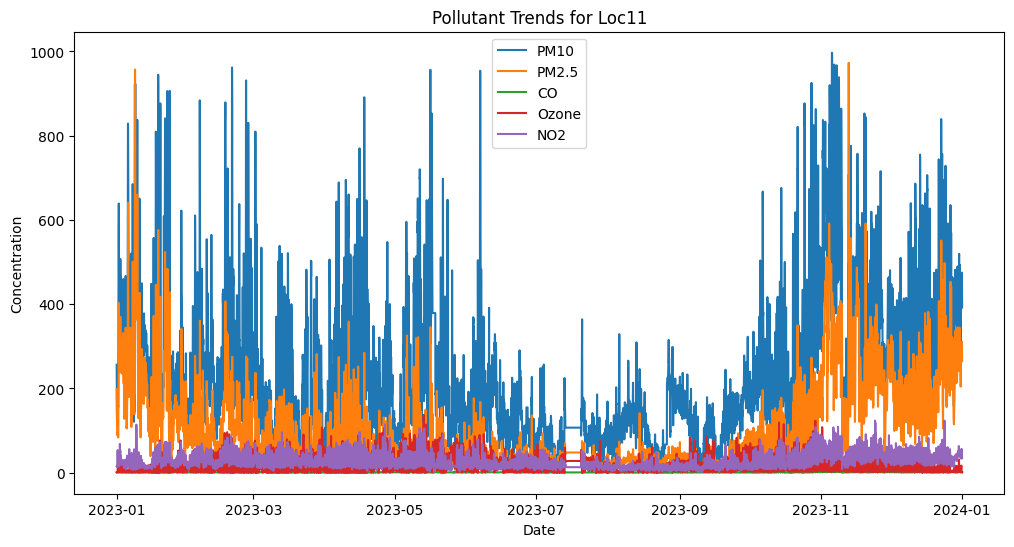

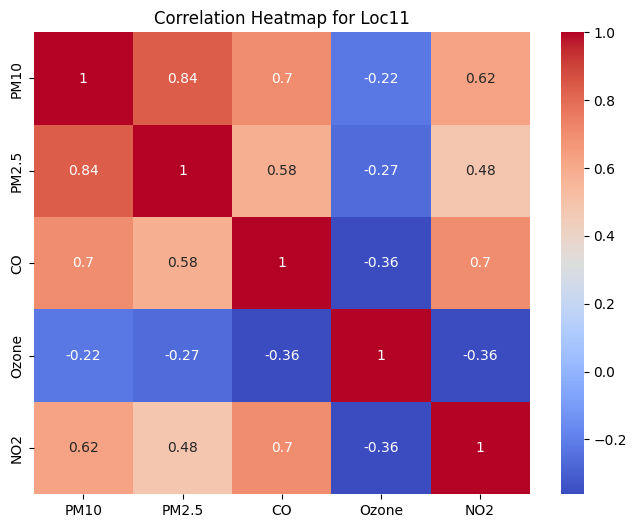

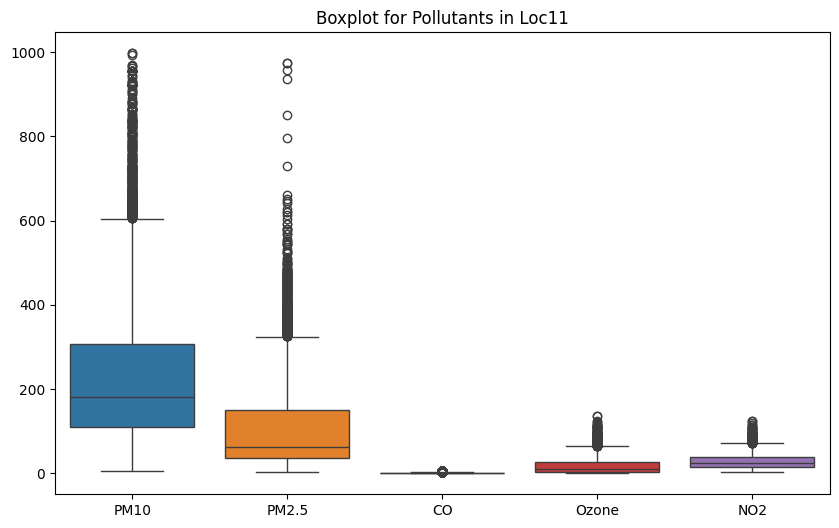


🚀 Training Model for: Loc11

ML Performance for Loc11:
MAE: 24.05, MSE: 1336.28


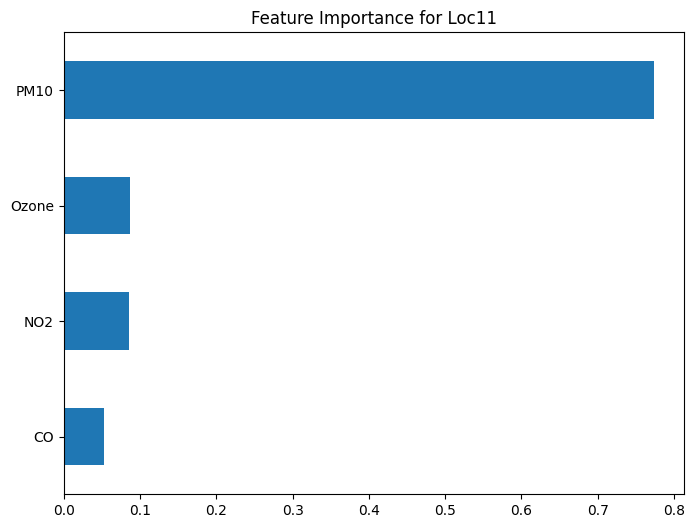


📍 Analyzing Data for: Loc12

Sample Data for Loc12:
             From_Date             To_Date    PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  145.93  86.81  0.63   9.65  28.85   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  139.02  90.23  0.57  10.40  24.50   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  104.58  64.56  0.55   9.84  25.62   
3 2023-01-01 03:00:00 2023-01-01 04:00:00   97.69  55.32  0.55   9.56  27.98   
4 2023-01-01 04:00:00 2023-01-01 05:00:00   94.10  70.45  0.57   9.95  30.31   

  Location  
0    Loc12  
1    Loc12  
2    Loc12  
3    Loc12  
4    Loc12  

Summary Statistics for Loc12:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   183.366844    86.606761   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     2.340000     0.430000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00

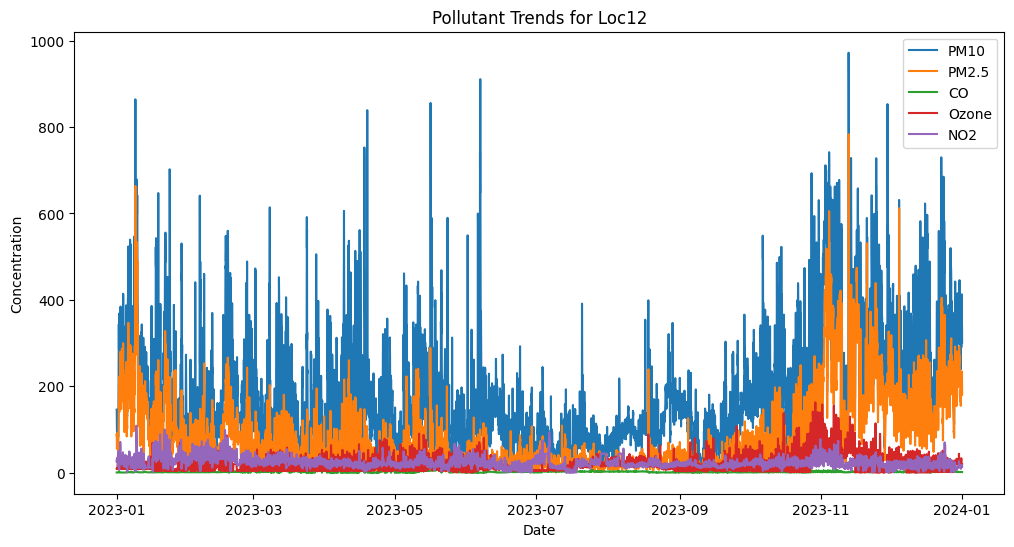

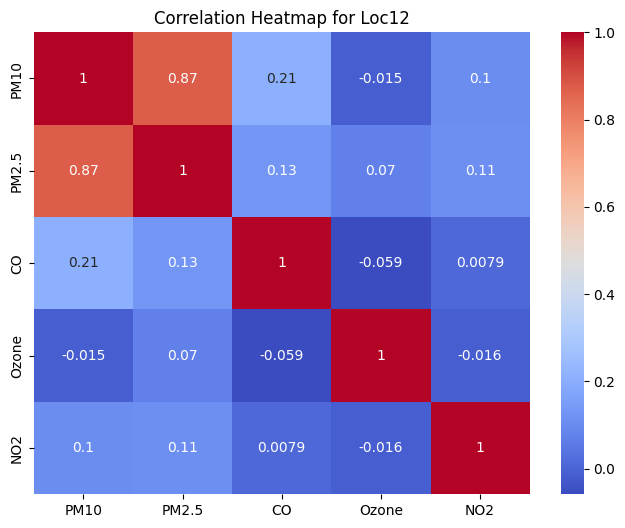

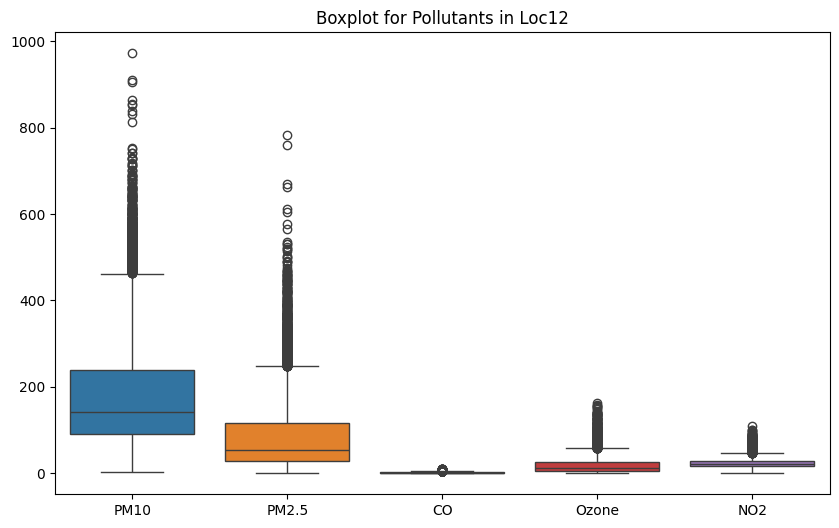


🚀 Training Model for: Loc12

ML Performance for Loc12:
MAE: 19.71, MSE: 902.34


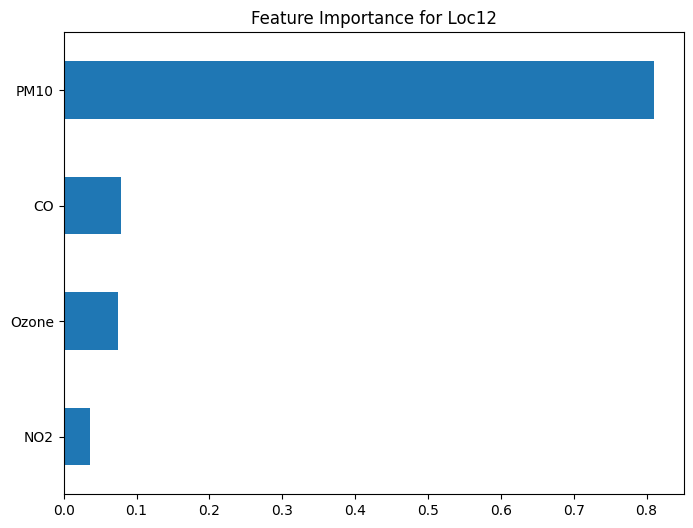


📍 Analyzing Data for: Loc13

Sample Data for Loc13:
             From_Date             To_Date    PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  194.17  102.3  1.82   4.68  15.19   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  184.60  115.6  1.62   5.04  13.53   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  181.52   87.5  1.36   4.97  14.22   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  160.07   82.3  1.25   6.41  10.62   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  190.20   64.6  1.41   5.61  10.98   

  Location  
0    Loc13  
1    Loc13  
2    Loc13  
3    Loc13  
4    Loc13  

Summary Statistics for Loc13:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   170.773369    80.339293   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     7.170000    10.000000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00

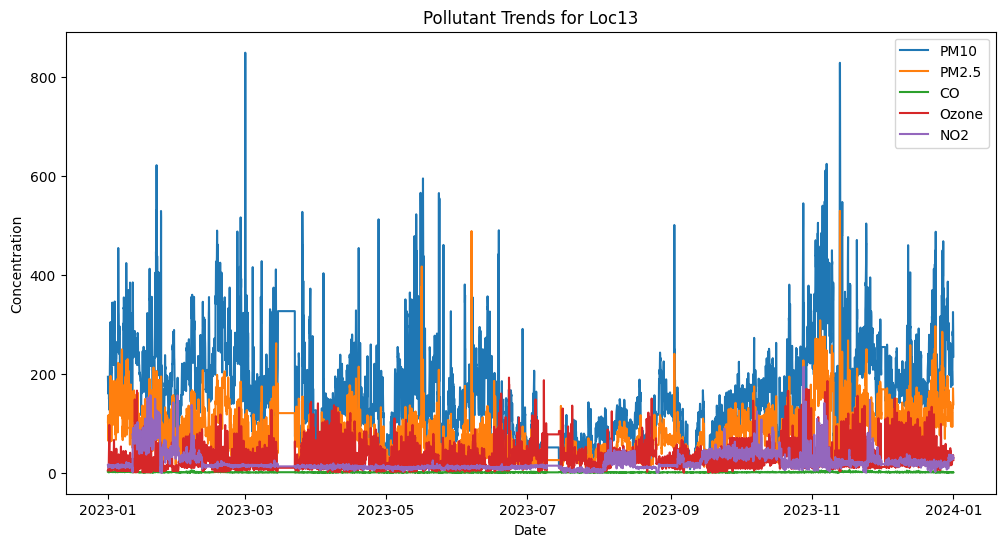

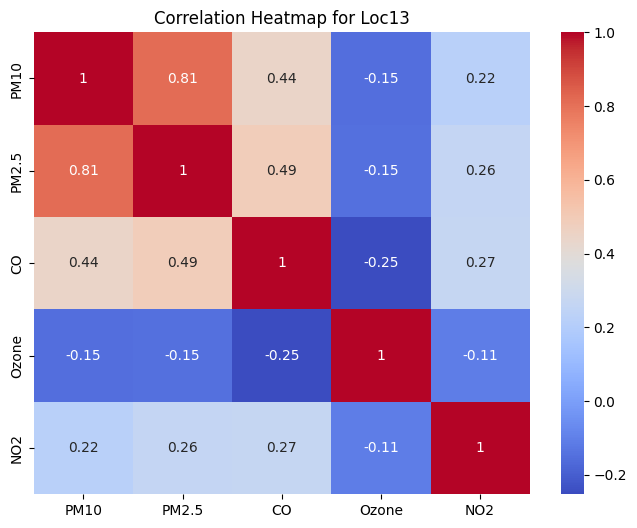

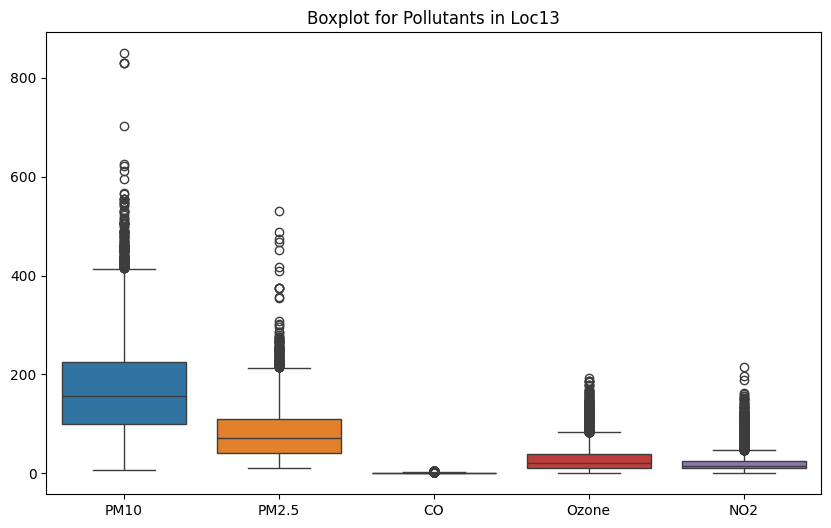


🚀 Training Model for: Loc13

ML Performance for Loc13:
MAE: 15.33, MSE: 541.94


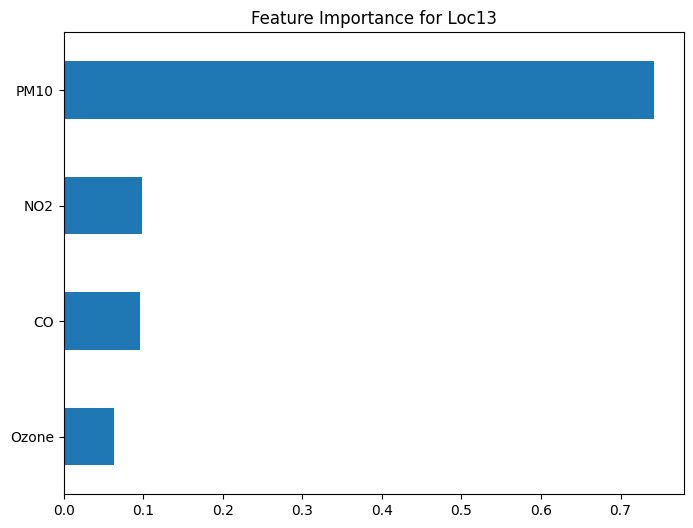


📍 Analyzing Data for: Loc14

Sample Data for Loc14:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  162.50  159.00  2.15   8.60  44.60   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  150.50  148.00  1.74   8.35  36.30   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  129.33  126.00  1.50   8.33  30.13   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  122.00  118.25  1.52   8.25  26.67   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  109.75  105.75  1.20   8.20  20.65   

  Location  
0    Loc14  
1    Loc14  
2    Loc14  
3    Loc14  
4    Loc14  

Summary Statistics for Loc14:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   174.222189   108.990703   
min    2023-01-01 00:00:00  2023-01-01 01:00:00    11.750000     5.000000   
25%    2023-04-02 05:45:00  2023-04-02 06

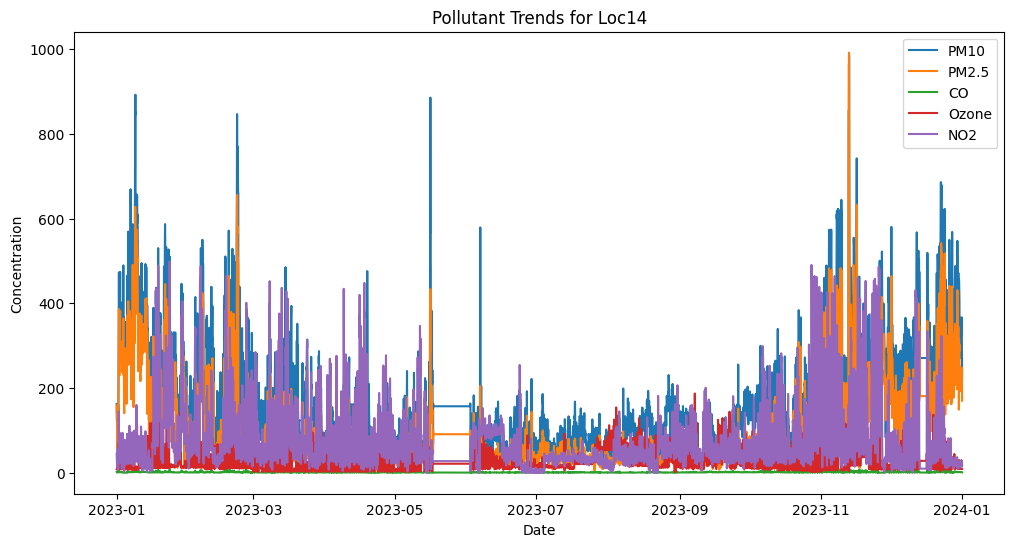

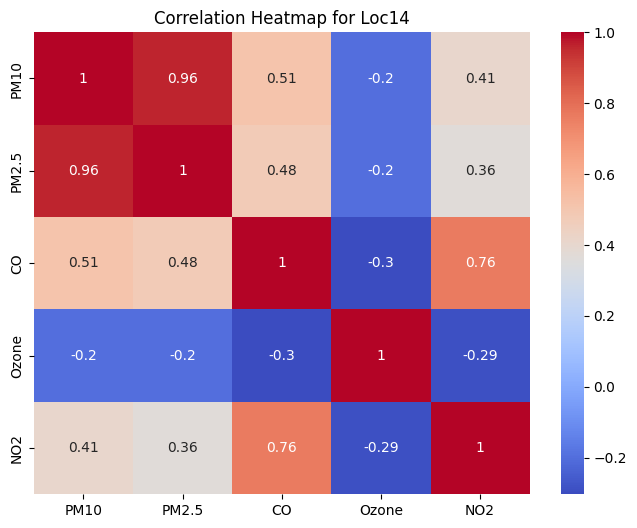

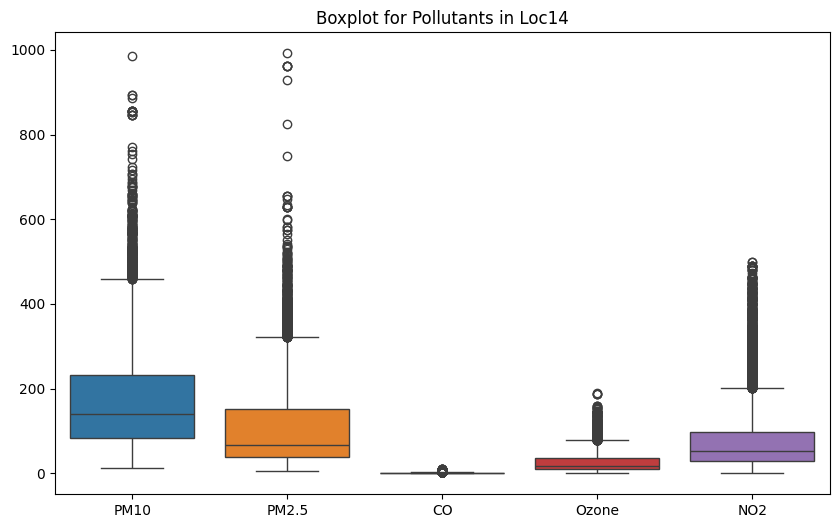


🚀 Training Model for: Loc14

ML Performance for Loc14:
MAE: 13.60, MSE: 466.24


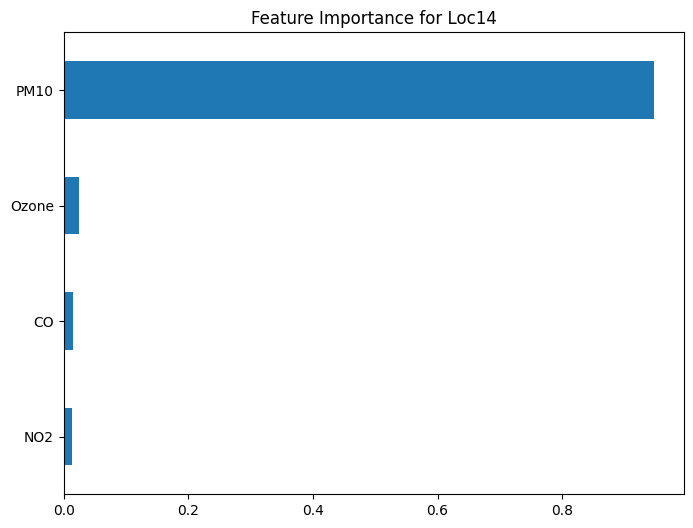


📍 Analyzing Data for: Loc15

Sample Data for Loc15:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  275.25  159.00  0.95   3.38  57.62   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  227.75  140.50  0.73   3.30  53.50   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  201.00  124.00  0.80   3.40  45.20   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  204.75  133.50  0.80   3.23  43.88   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  205.50  133.25  1.12   3.55  47.53   

  Location  
0    Loc15  
1    Loc15  
2    Loc15  
3    Loc15  
4    Loc15  

Summary Statistics for Loc15:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   259.836226   122.790995   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     1.750000     3.000000   
25%    2023-04-02 05:45:00  2023-04-02 06

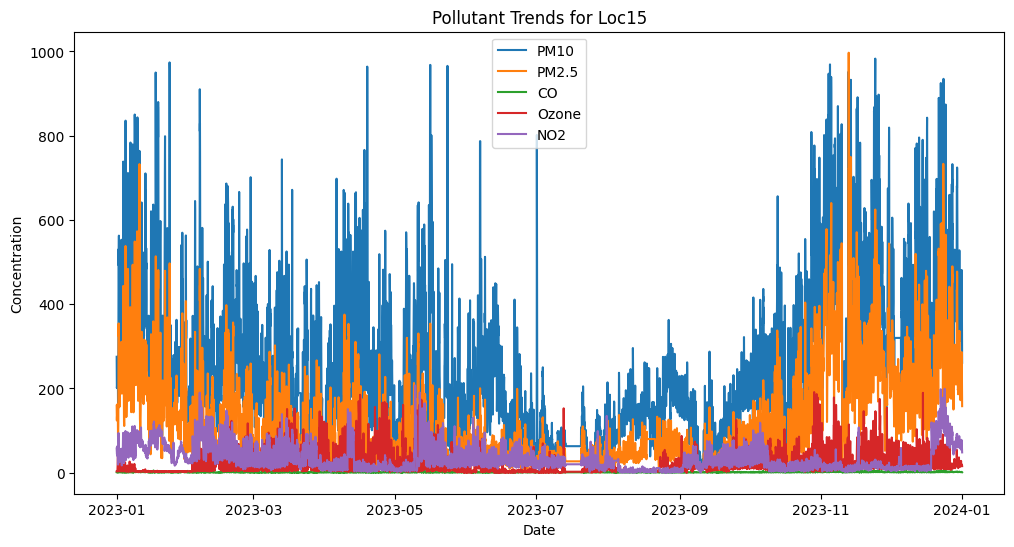

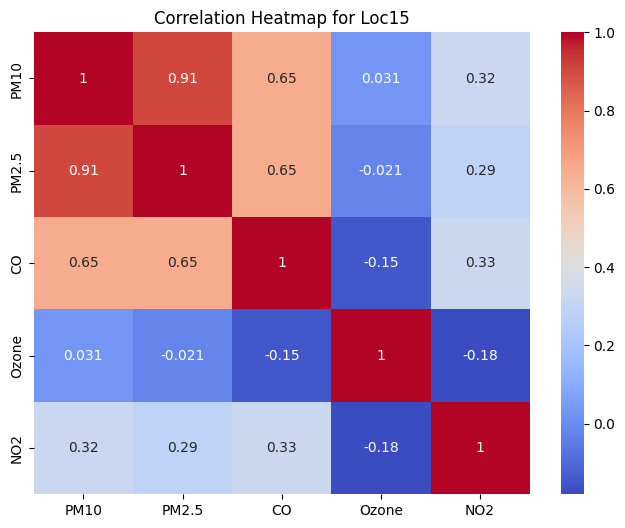

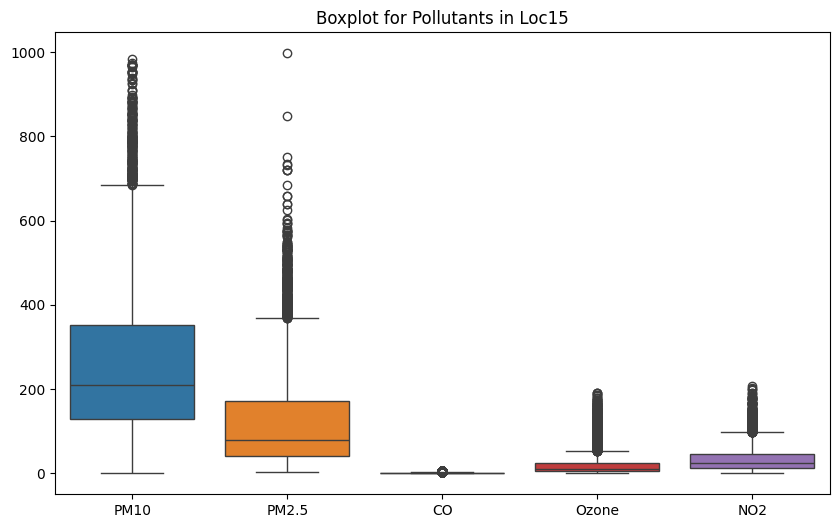


🚀 Training Model for: Loc15

ML Performance for Loc15:
MAE: 22.19, MSE: 1174.37


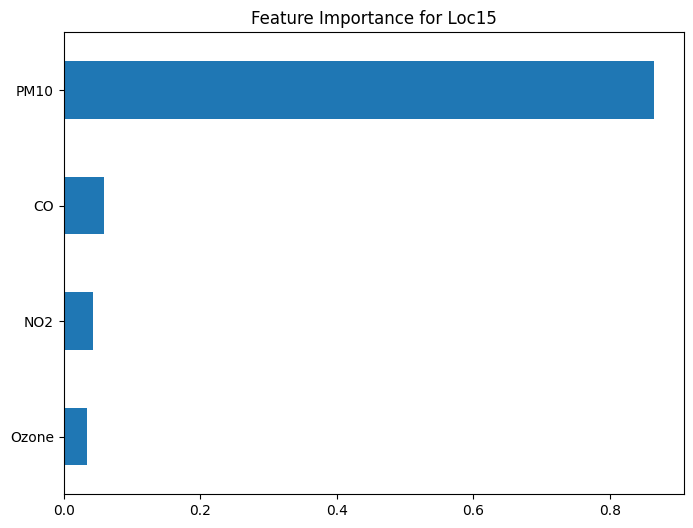


📍 Analyzing Data for: Loc16

Sample Data for Loc16:
             From_Date             To_Date   PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  250.0  190.0  2.48   4.50  22.65   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  245.0  178.0  2.33   3.50  23.00   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  230.0  172.0  1.40   3.60  18.90   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  218.0  162.0  1.35   3.58  18.70   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  190.0  146.0  0.80   2.92  23.42   

  Location  
0    Loc16  
1    Loc16  
2    Loc16  
3    Loc16  
4    Loc16  

Summary Statistics for Loc16:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   172.872793    90.416292   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     1.000000     1.000000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00    91

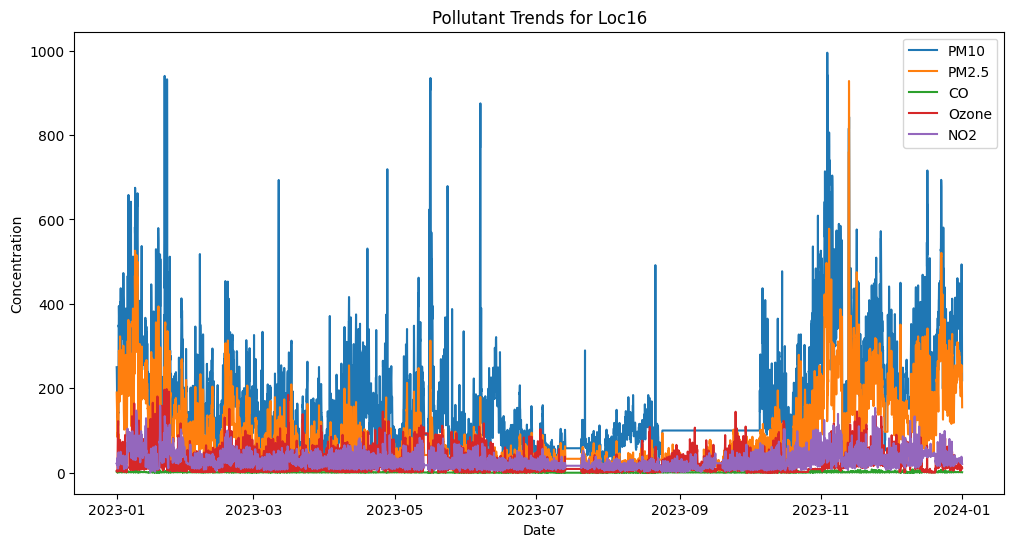

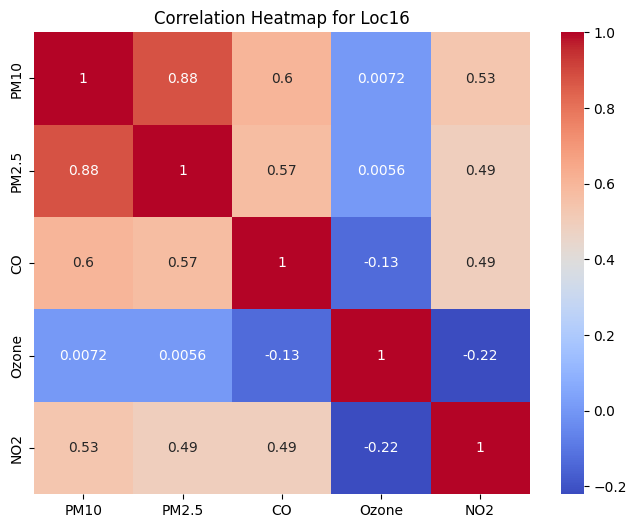

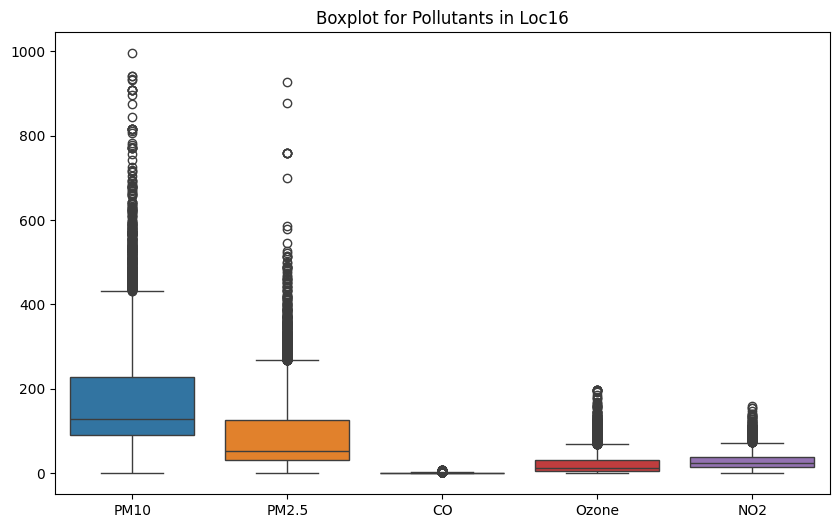


🚀 Training Model for: Loc16

ML Performance for Loc16:
MAE: 18.36, MSE: 866.86


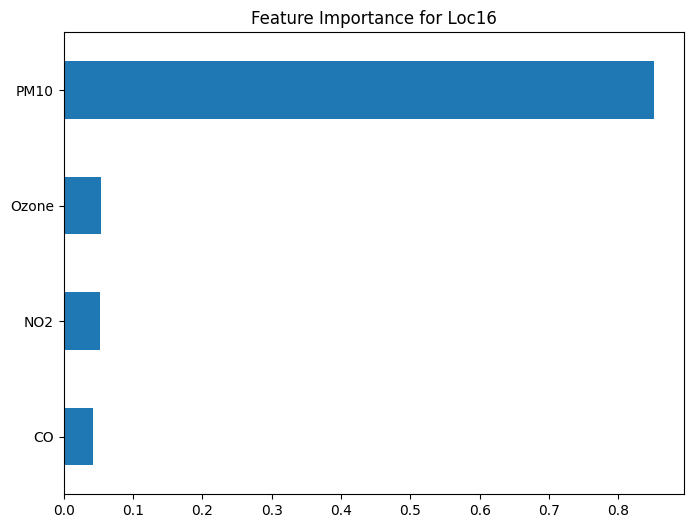


📍 Analyzing Data for: Loc17

Sample Data for Loc17:
             From_Date             To_Date  PM10  PM2.5  CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00   NaN    NaN NaN    NaN  33.91   
1 2023-01-01 01:00:00 2023-01-01 02:00:00   NaN    NaN NaN    NaN  33.64   
2 2023-01-01 02:00:00 2023-01-01 03:00:00   NaN    NaN NaN    NaN  33.43   
3 2023-01-01 03:00:00 2023-01-01 04:00:00   NaN    NaN NaN    NaN  32.64   
4 2023-01-01 04:00:00 2023-01-01 05:00:00   NaN    NaN NaN    NaN  32.20   

  Location  
0    Loc17  
1    Loc17  
2    Loc17  
3    Loc17  
4    Loc17  

Summary Statistics for Loc17:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8602.000000  8602.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00    75.359123    68.071233   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     1.230000     0.600000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00    32.100000    12.3300

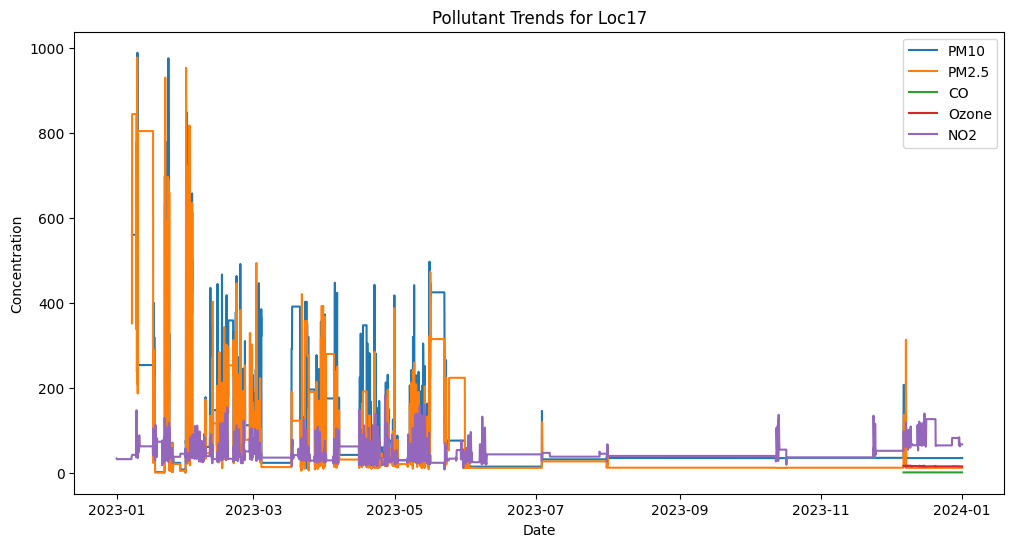

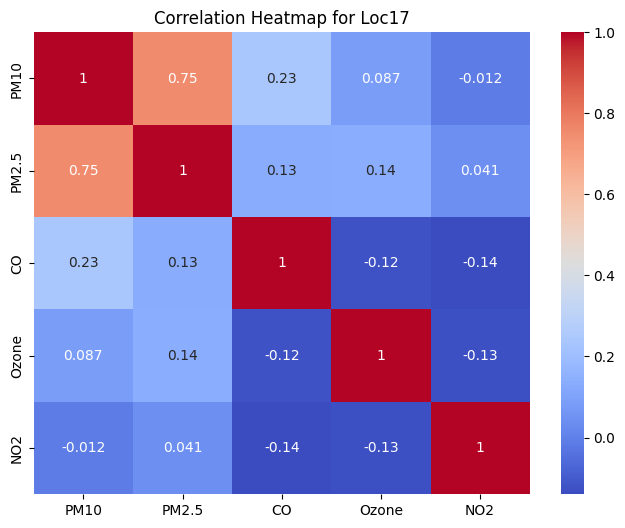

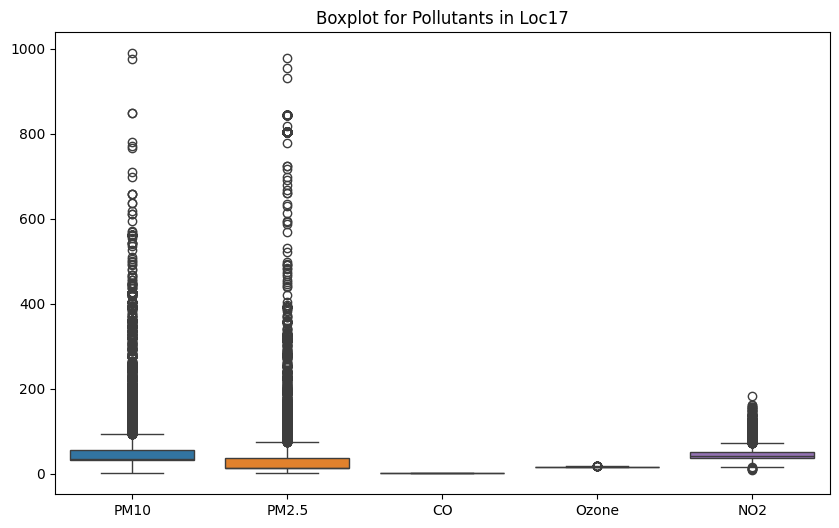


🚀 Training Model for: Loc17
❌ Error loading Loc17 (File: COMP17): Input y contains NaN.

📍 Analyzing Data for: Loc18

Sample Data for Loc18:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  198.42  146.28  3.08   7.45  25.17   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  202.59  149.67  3.00   8.16  24.54   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  194.12  135.64  2.91   7.92  24.84   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  195.13  134.89  2.81   7.92  24.31   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  176.57  127.87  2.73   7.79  24.63   

  Location  
0    Loc18  
1    Loc18  
2    Loc18  
3    Loc18  
4    Loc18  

Summary Statistics for Loc18:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   154.516253    75.253935   
min    2023-01-01 00:00:00  2

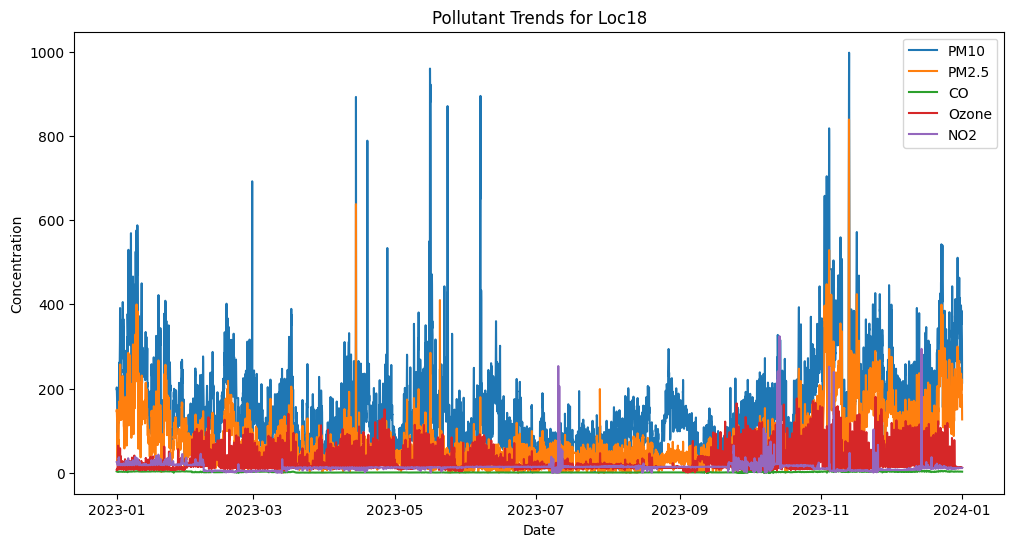

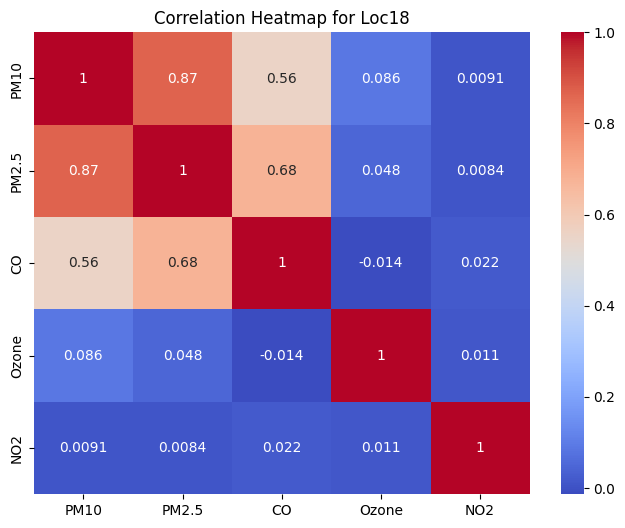

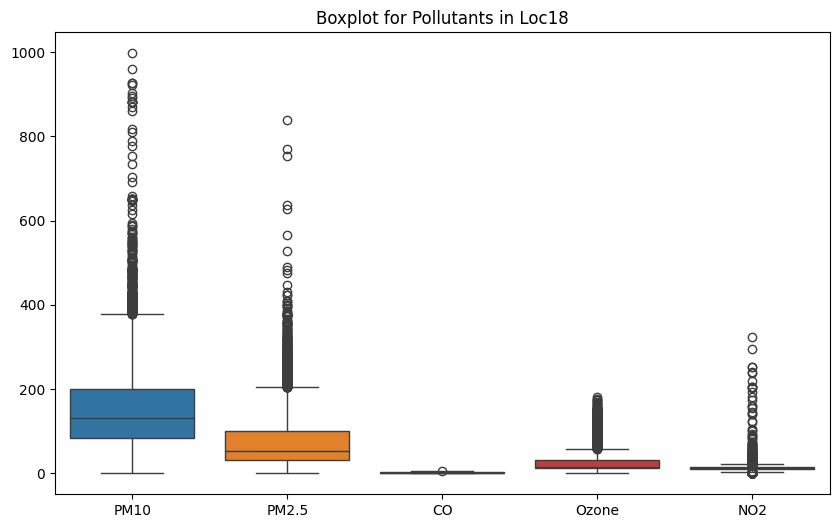


🚀 Training Model for: Loc18

ML Performance for Loc18:
MAE: 13.15, MSE: 462.53


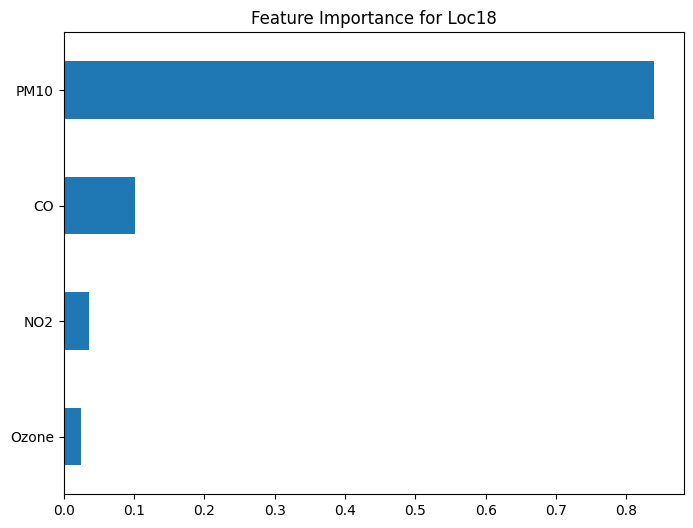


📍 Analyzing Data for: Loc19

Sample Data for Loc19:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  260.25  211.00  1.92   2.73  28.07   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  251.00  203.75  1.83   2.30  22.00   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  235.00  195.75  0.70   2.35  21.45   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  217.00  180.25  0.72   2.42  23.68   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  191.25  164.75  0.55   2.12  20.48   

  Location  
0    Loc19  
1    Loc19  
2    Loc19  
3    Loc19  
4    Loc19  

Summary Statistics for Loc19:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   191.150409    98.057429   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     6.000000     2.000000   
25%    2023-04-02 05:45:00  2023-04-02 06

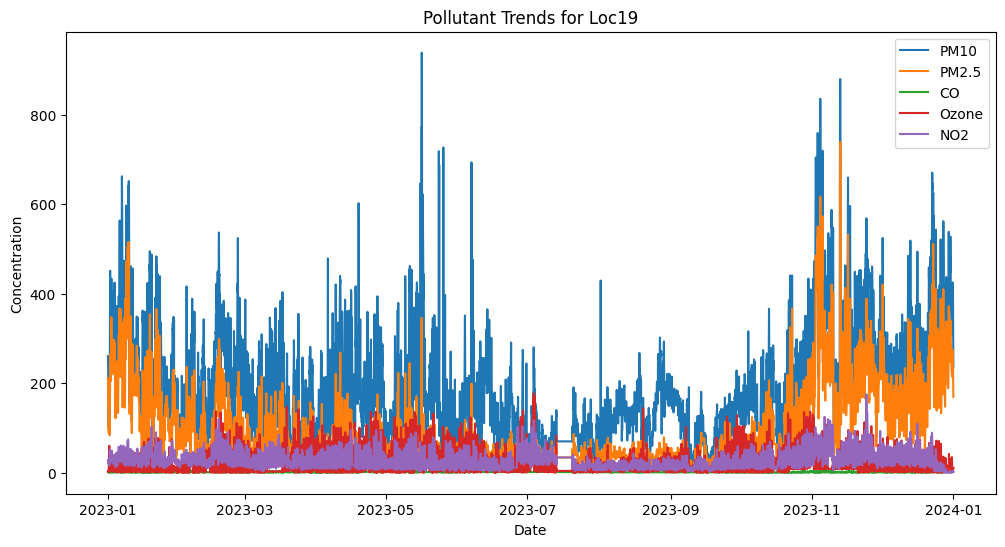

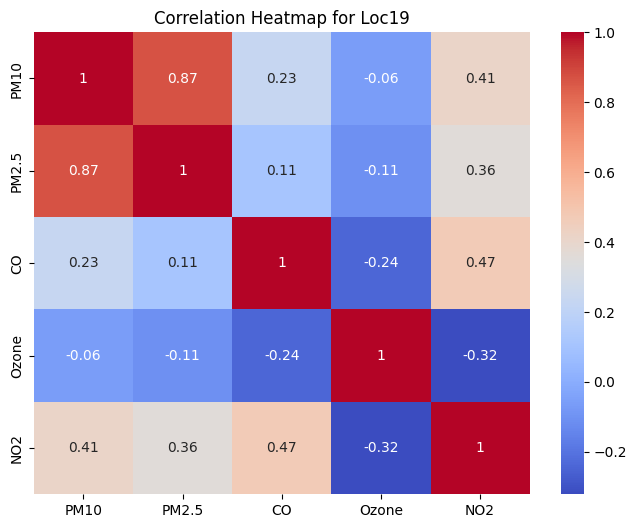

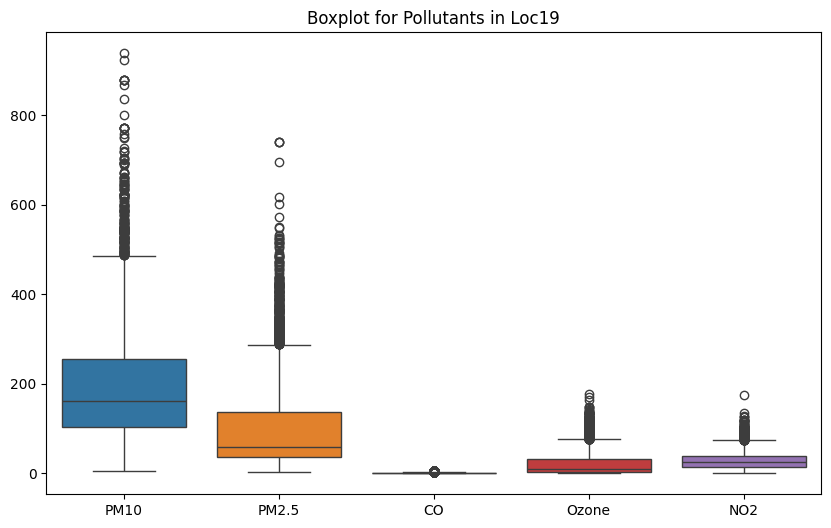


🚀 Training Model for: Loc19

ML Performance for Loc19:
MAE: 19.52, MSE: 885.74


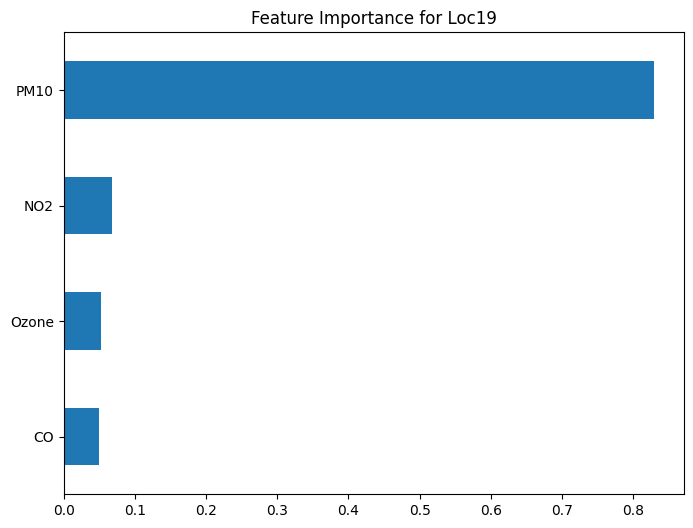


📍 Analyzing Data for: Loc20

Sample Data for Loc20:
             From_Date             To_Date   PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 00:00:00 2023-01-01 01:00:00  196.0  143.00  0.93   7.08  51.67   
1 2023-01-01 01:00:00 2023-01-01 02:00:00  196.0  144.00  0.62   7.70  51.70   
2 2023-01-01 02:00:00 2023-01-01 03:00:00  196.0  136.50  0.50   6.88  51.00   
3 2023-01-01 03:00:00 2023-01-01 04:00:00  196.0  135.25  0.58   7.48  48.47   
4 2023-01-01 04:00:00 2023-01-01 05:00:00  196.0  144.25  0.70   6.15  43.95   

  Location  
0    Loc20  
1    Loc20  
2    Loc20  
3    Loc20  
4    Loc20  

Summary Statistics for Loc20:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8760                 8760  8760.000000  8760.000000   
mean   2023-07-02 11:30:00  2023-07-02 12:30:00   177.709834    92.086200   
min    2023-01-01 00:00:00  2023-01-01 01:00:00     3.750000     1.000000   
25%    2023-04-02 05:45:00  2023-04-02 06:45:00

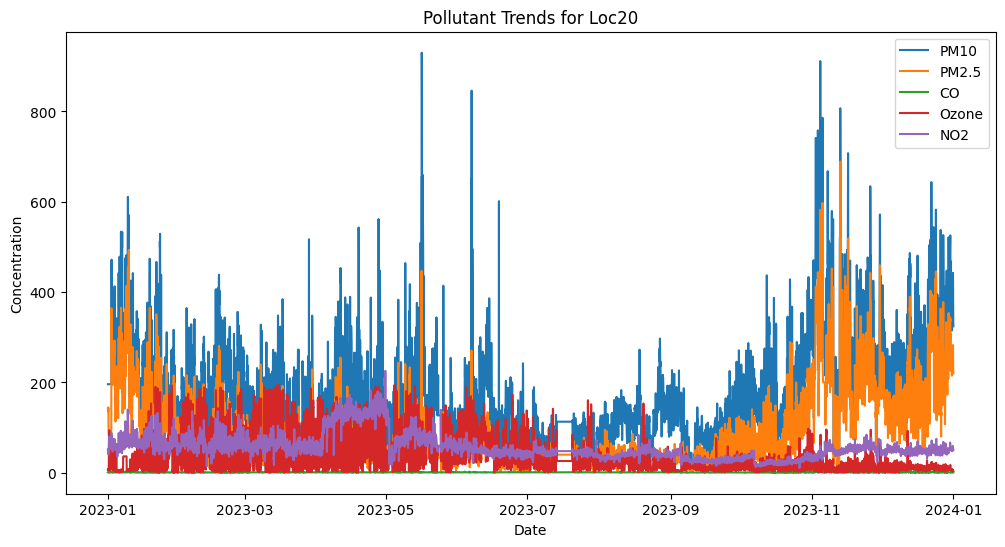

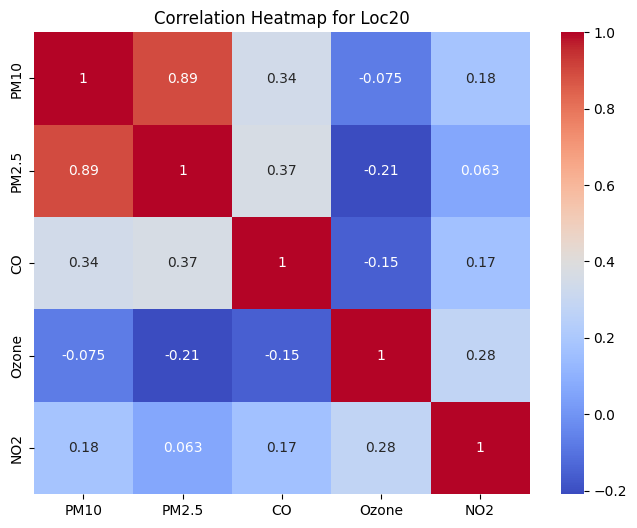

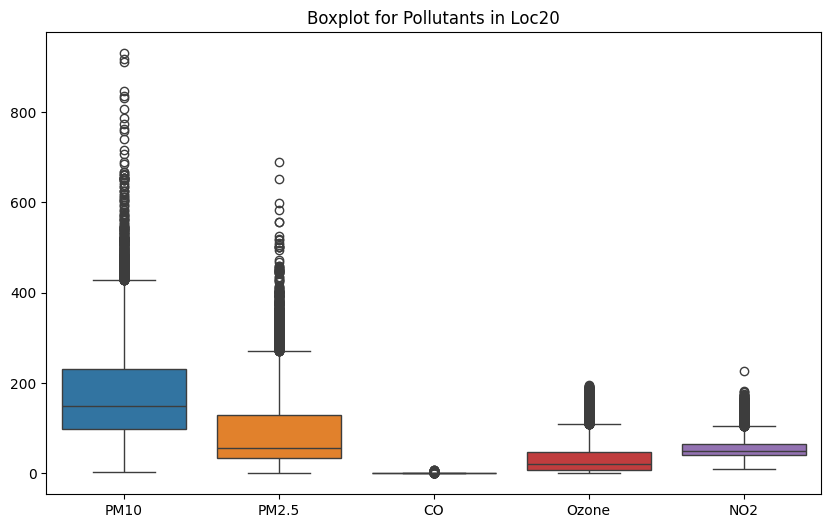


🚀 Training Model for: Loc20

ML Performance for Loc20:
MAE: 17.51, MSE: 828.99


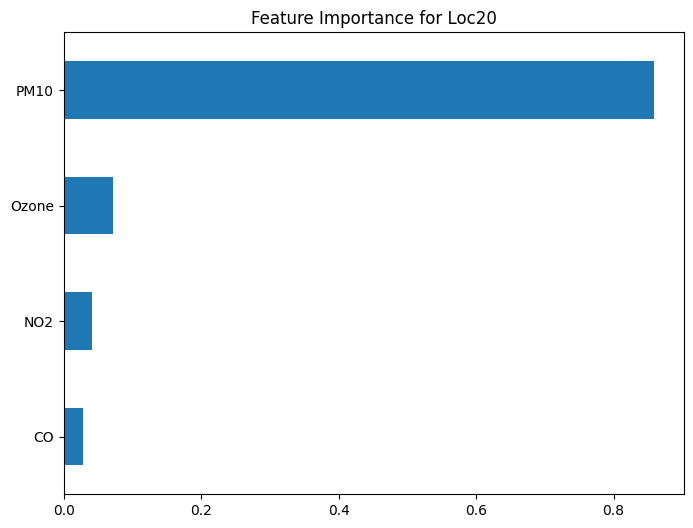


📍 Analyzing Data for: Loc21

Sample Data for Loc21:
             From_Date             To_Date   PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 23:00:00 2023-01-02 00:00:00  481.5  363.75  1.50   6.97  55.33   
1 2023-01-02 00:00:00 2023-01-02 01:00:00  456.0  319.50  1.32   5.60  40.60   
2 2023-01-02 01:00:00 2023-01-02 02:00:00  431.5  291.25  1.40   5.60  35.90   
3 2023-01-02 02:00:00 2023-01-02 03:00:00  464.0  318.25  1.40   5.50  26.70   
4 2023-01-02 03:00:00 2023-01-02 04:00:00  376.5  289.00  1.40   8.85  30.22   

  Location  
0    Loc21  
1    Loc21  
2    Loc21  
3    Loc21  
4    Loc21  

Summary Statistics for Loc21:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8737                 8737  8737.000000  8737.000000   
mean   2023-07-02 23:00:00  2023-07-03 00:00:00   278.531517   120.239475   
min    2023-01-01 23:00:00  2023-01-02 00:00:00     3.000000     1.000000   
25%    2023-04-02 23:00:00  2023-04-03 00:00:00

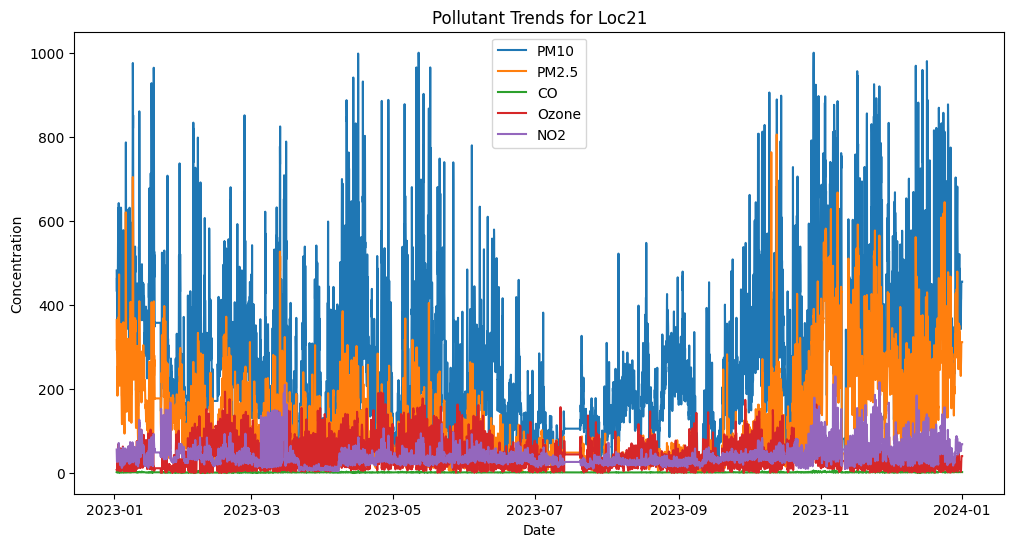

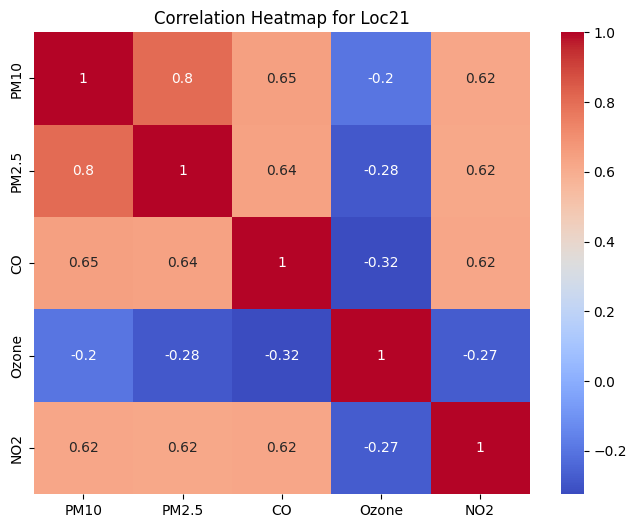

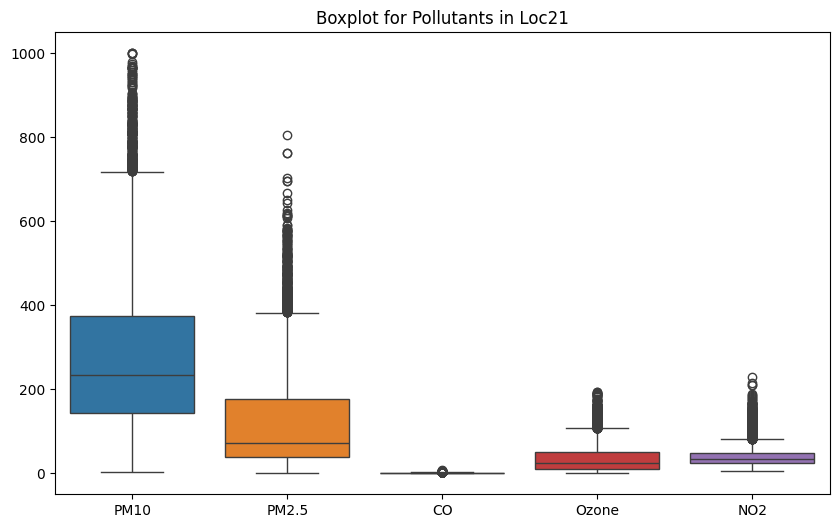


🚀 Training Model for: Loc21

ML Performance for Loc21:
MAE: 35.60, MSE: 3012.92


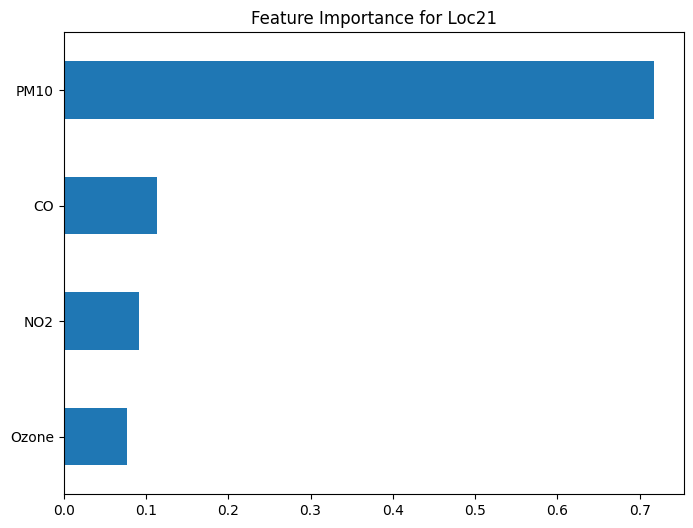


📍 Analyzing Data for: Loc22

Sample Data for Loc22:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  153.68  107.97  0.63  24.81  18.64   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  175.30  103.75  0.44  39.66  14.90   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  161.83   96.07  0.44  50.39  13.00   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  164.15   91.18  0.88  54.04  17.64   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  158.73   87.83  0.78  54.52  14.92   

  Location  
0    Loc22  
1    Loc22  
2    Loc22  
3    Loc22  
4    Loc22  

Summary Statistics for Loc22:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   227.338347   119.404213   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     9.800000     5.000000   
25%    2023-04-02 14:00:00  2023-04-02 15

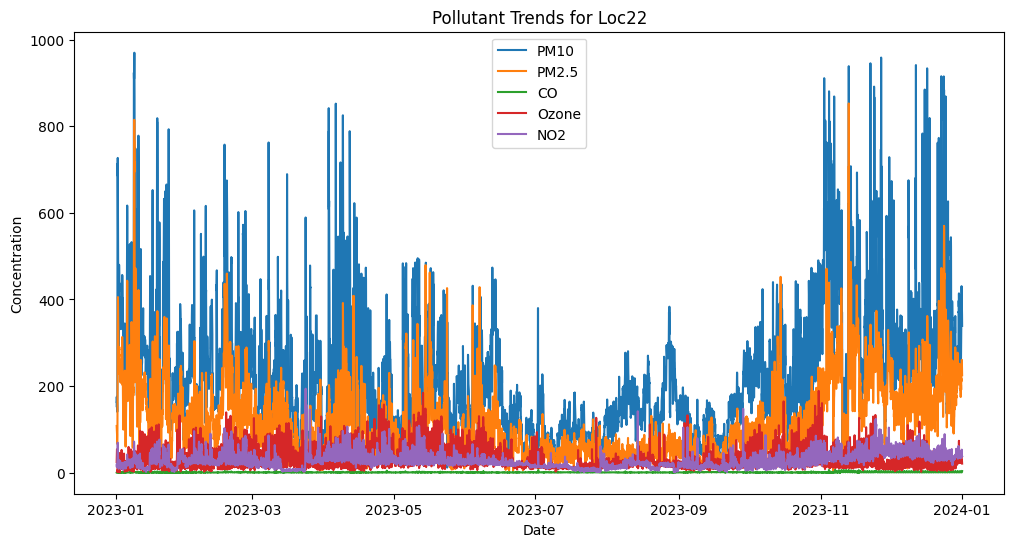

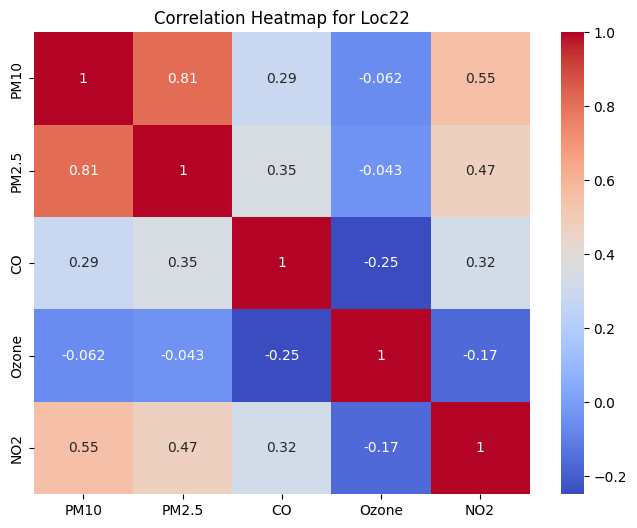

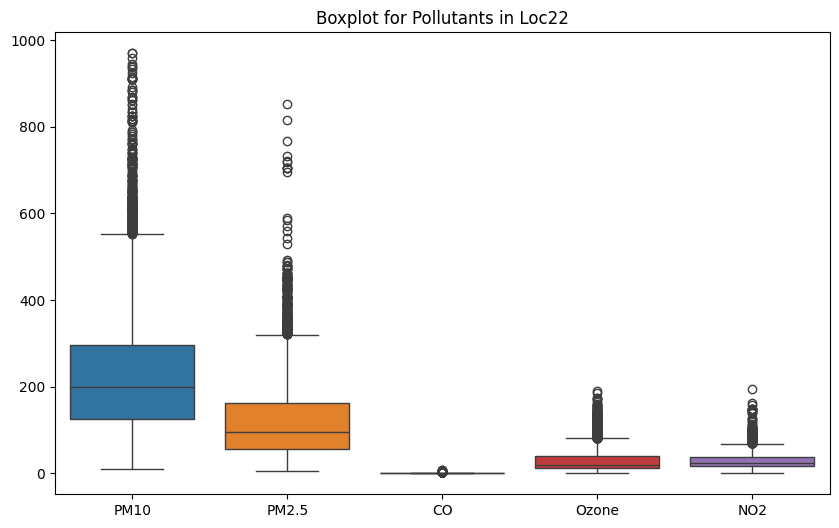


🚀 Training Model for: Loc22

ML Performance for Loc22:
MAE: 28.74, MSE: 1802.09


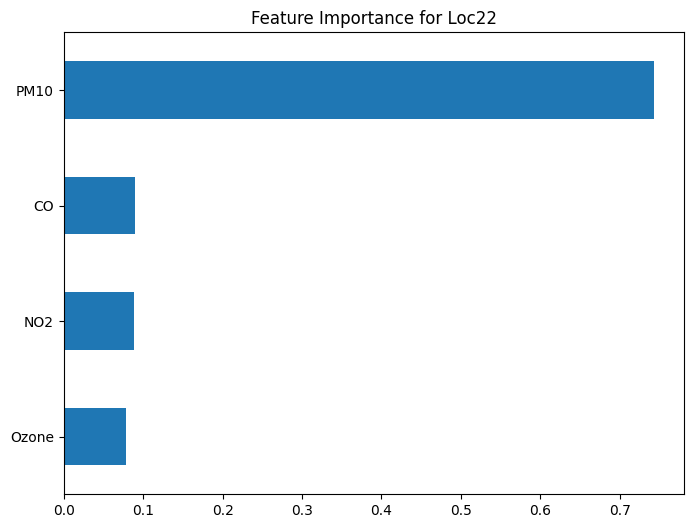


📍 Analyzing Data for: Loc23

Sample Data for Loc23:
             From_Date             To_Date   PM10  PM2.5    CO  Ozone   NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  117.0   99.0  0.50  32.68  8.33   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  128.0  110.0  0.40  43.85  5.55   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  121.0   83.0  0.40  51.70  3.88   
3 2023-01-01 14:00:00 2023-01-01 15:00:00   96.0   68.5  0.30  57.80  2.48   
4 2023-01-01 15:00:00 2023-01-01 16:00:00   92.0   67.0  0.23  56.95  1.75   

  Location  
0    Loc23  
1    Loc23  
2    Loc23  
3    Loc23  
4    Loc23  

Summary Statistics for Loc23:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   149.045274    82.317132   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     1.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15:00:00    74.00000

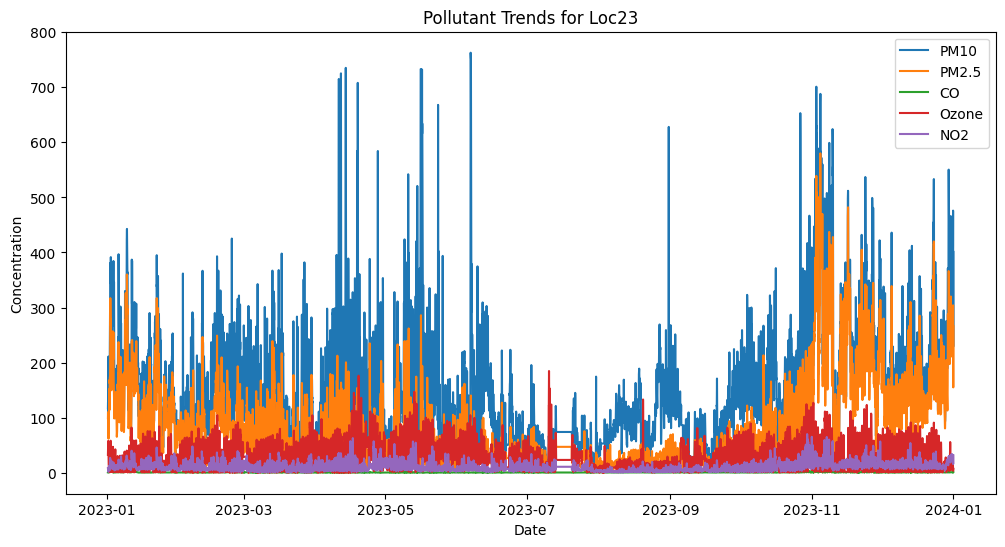

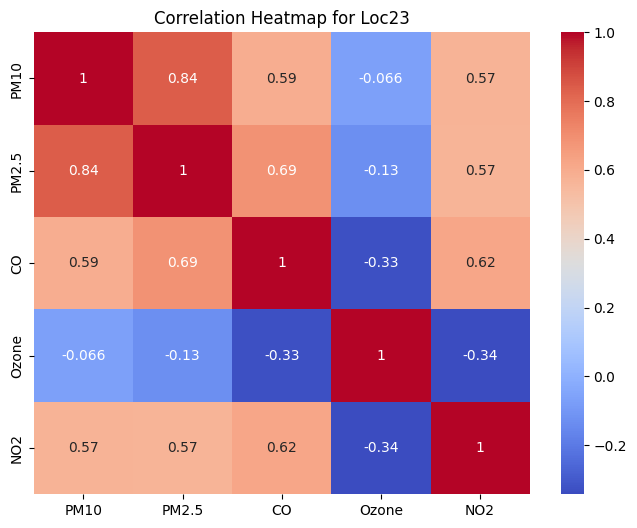

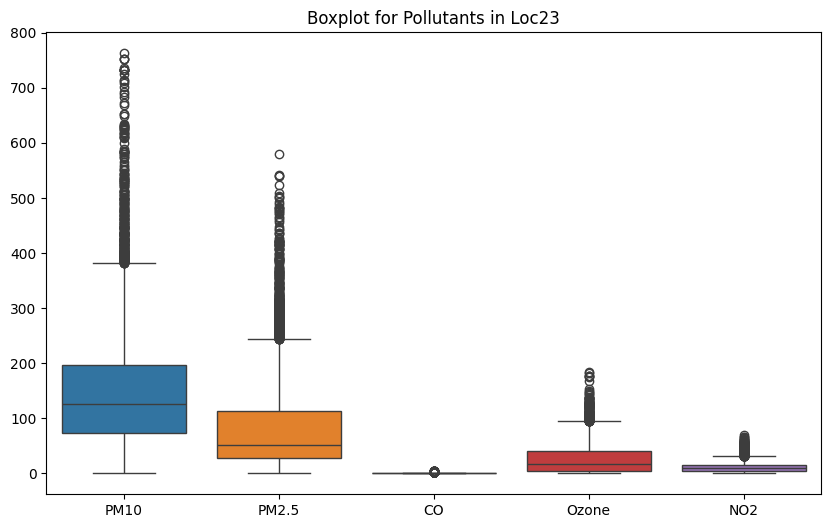


🚀 Training Model for: Loc23

ML Performance for Loc23:
MAE: 17.96, MSE: 749.30


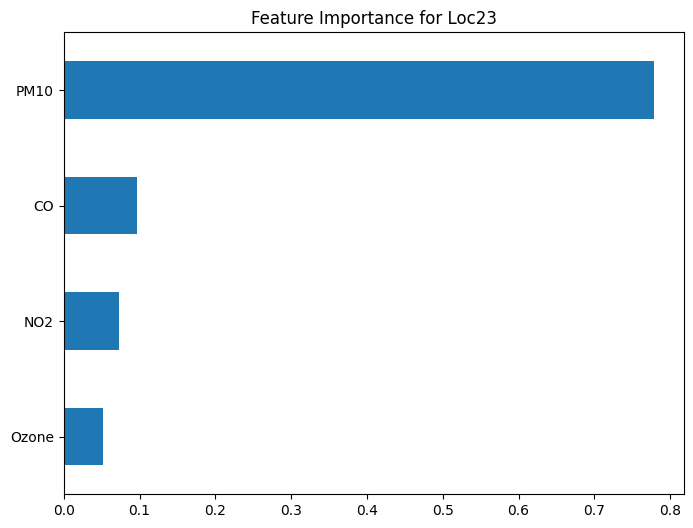


📍 Analyzing Data for: Loc24

Sample Data for Loc24:
             From_Date             To_Date    PM10   PM2.5  CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  174.75  129.75 NaN  47.20  20.07   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  154.75  106.25 NaN  65.28  12.43   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  137.50   84.25 NaN  74.55  12.80   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  147.00   88.75 NaN  80.47  14.62   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  134.75   87.50 NaN  79.93  15.20   

  Location  
0    Loc24  
1    Loc24  
2    Loc24  
3    Loc24  
4    Loc24  

Summary Statistics for Loc24:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   221.123788   107.876004   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     3.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15:00:00   113

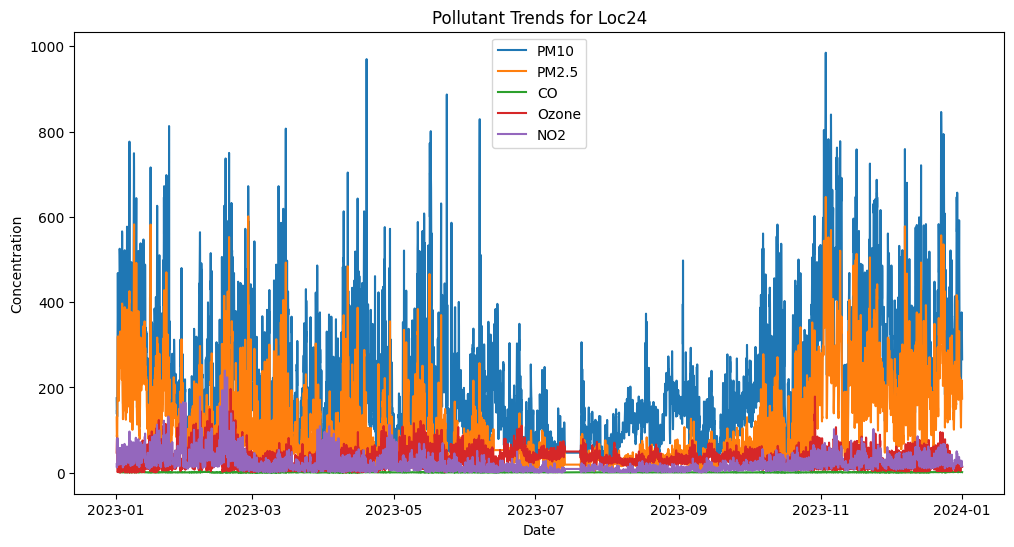

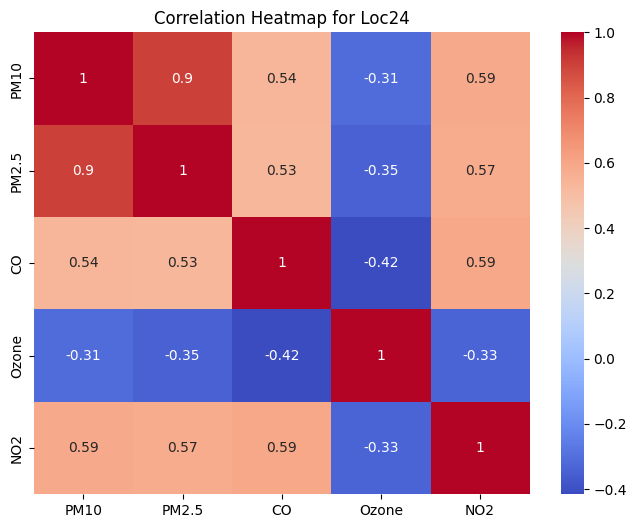

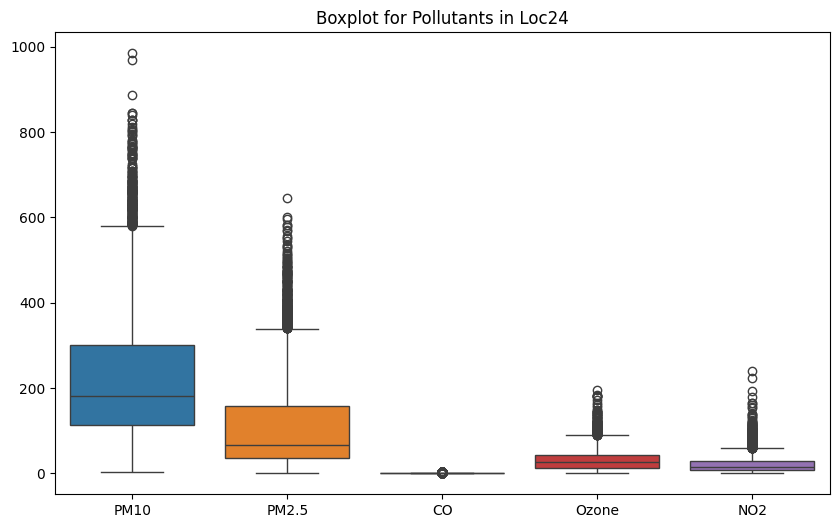


🚀 Training Model for: Loc24

ML Performance for Loc24:
MAE: 23.18, MSE: 1253.31


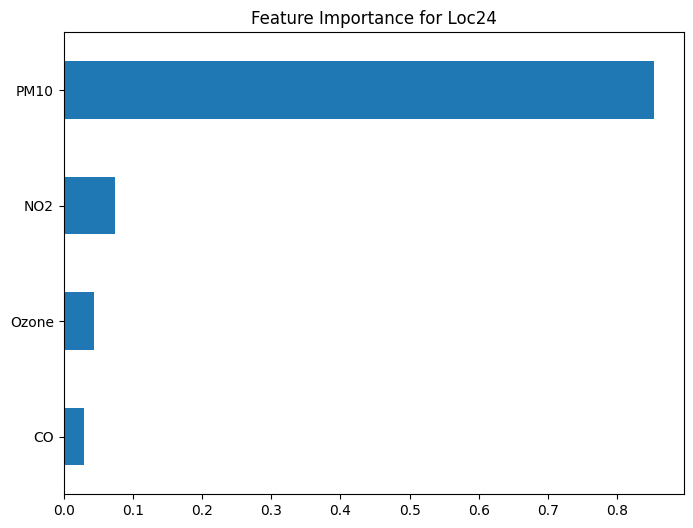


📍 Analyzing Data for: Loc25

Sample Data for Loc25:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  160.25  125.00  0.23  48.18  41.57   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  138.50  108.50  0.15  72.88  27.60   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  135.50   94.75  0.33  87.80  25.82   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  139.75   95.50  0.40  98.75  23.05   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  140.50   98.50  0.40  98.48  26.30   

  Location  
0    Loc25  
1    Loc25  
2    Loc25  
3    Loc25  
4    Loc25  

Summary Statistics for Loc25:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   211.759794   117.482828   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     3.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15

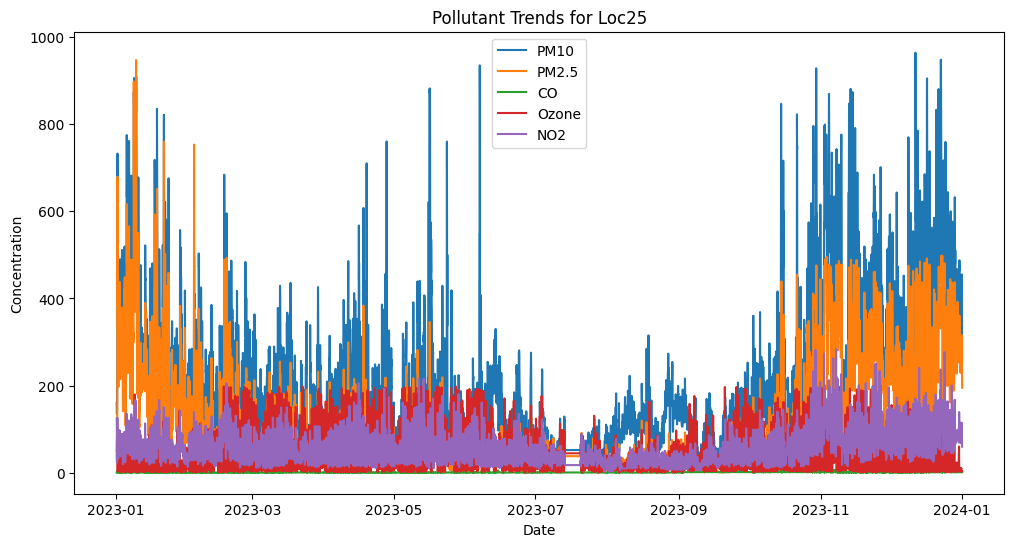

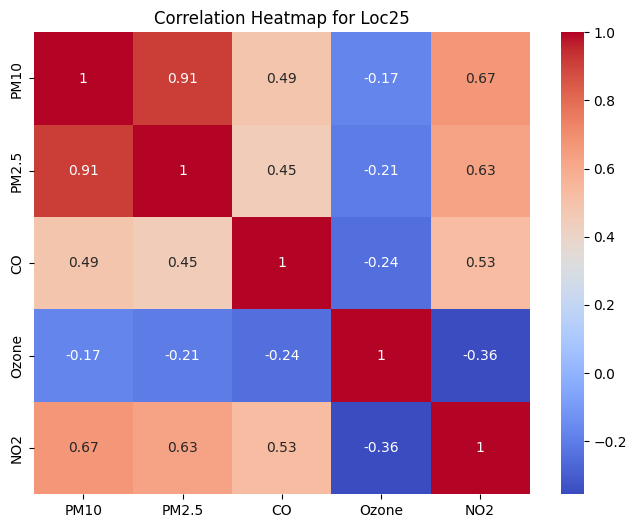

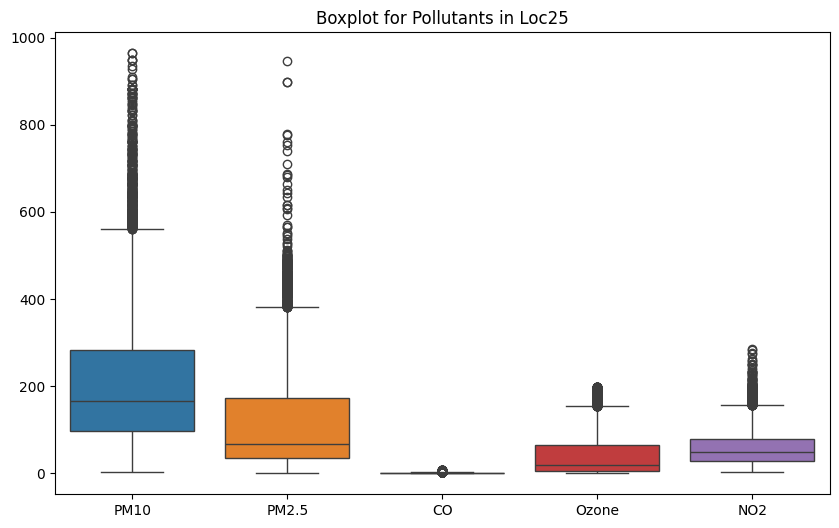


🚀 Training Model for: Loc25

ML Performance for Loc25:
MAE: 23.28, MSE: 1435.45


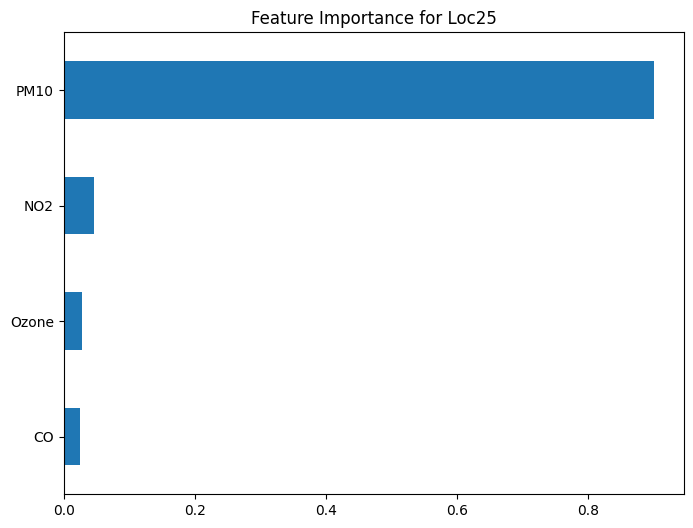


📍 Analyzing Data for: Loc26

Sample Data for Loc26:
             From_Date             To_Date  PM10  PM2.5  CO  Ozone  NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00   NaN    NaN NaN    NaN  NaN   
1 2023-01-01 12:00:00 2023-01-01 13:00:00   NaN    NaN NaN    NaN  NaN   
2 2023-01-01 13:00:00 2023-01-01 14:00:00   NaN    NaN NaN    NaN  NaN   
3 2023-01-01 14:00:00 2023-01-01 15:00:00   NaN    NaN NaN    NaN  NaN   
4 2023-01-01 15:00:00 2023-01-01 16:00:00   NaN    NaN NaN    NaN  NaN   

  Location  
0    Loc26  
1    Loc26  
2    Loc26  
3    Loc26  
4    Loc26  

Summary Statistics for Loc26:
                  From_Date              To_Date  PM10        PM2.5  \
count                 8749                 8749   0.0  2792.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   NaN   176.158825   
min    2023-01-01 11:00:00  2023-01-01 12:00:00   NaN     1.920000   
25%    2023-04-02 14:00:00  2023-04-02 15:00:00   NaN    88.000000   
50%    2023-07-02 17:00:00  2023-07-02 18

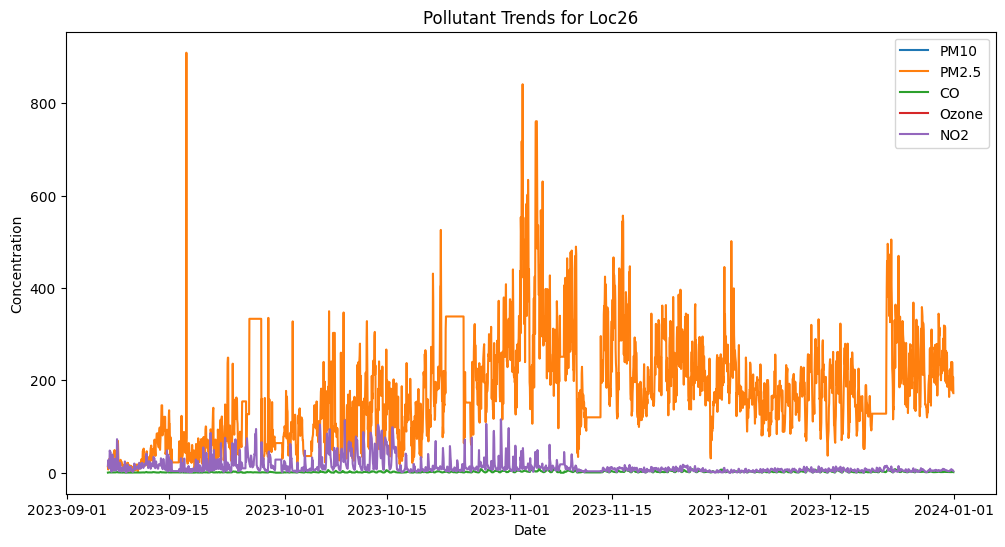

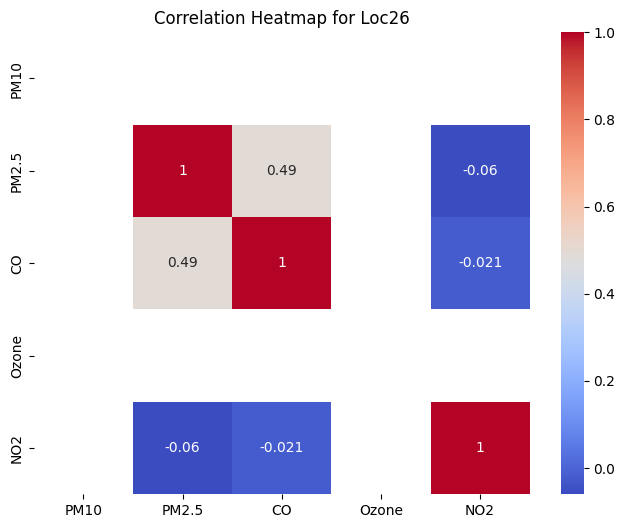

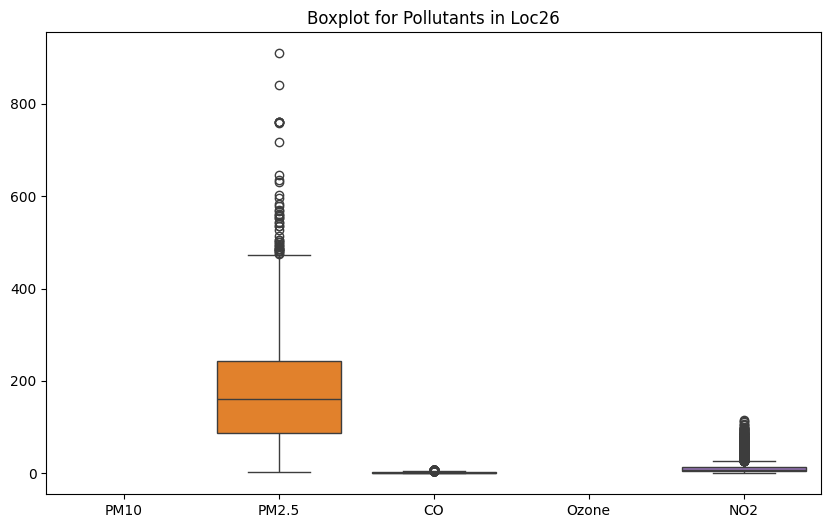


🚀 Training Model for: Loc26
❌ Error loading Loc26 (File: COMP26): Input y contains NaN.

📍 Analyzing Data for: Loc27

Sample Data for Loc27:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  167.27  114.79  0.36  29.05  19.96   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  151.26   89.28  0.23  34.88  19.55   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  134.88   78.74  0.05  39.09  19.96   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  124.31   88.79  0.03  40.90  20.00   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  122.85   90.25  0.02  38.44  20.01   

  Location  
0    Loc27  
1    Loc27  
2    Loc27  
3    Loc27  
4    Loc27  

Summary Statistics for Loc27:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   179.119276    97.549389   
min    2023-01-01 11:00:00  2

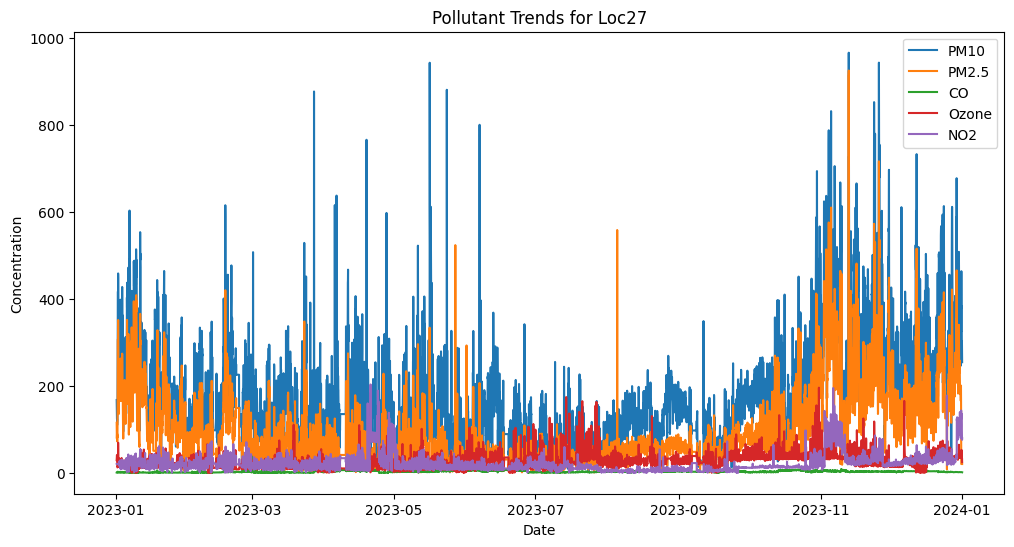

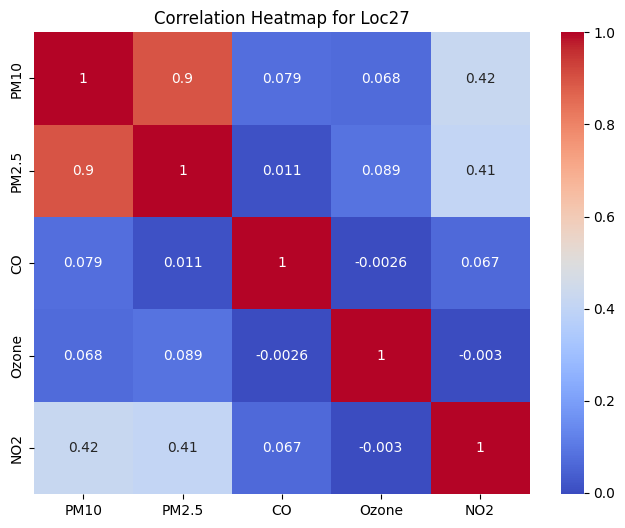

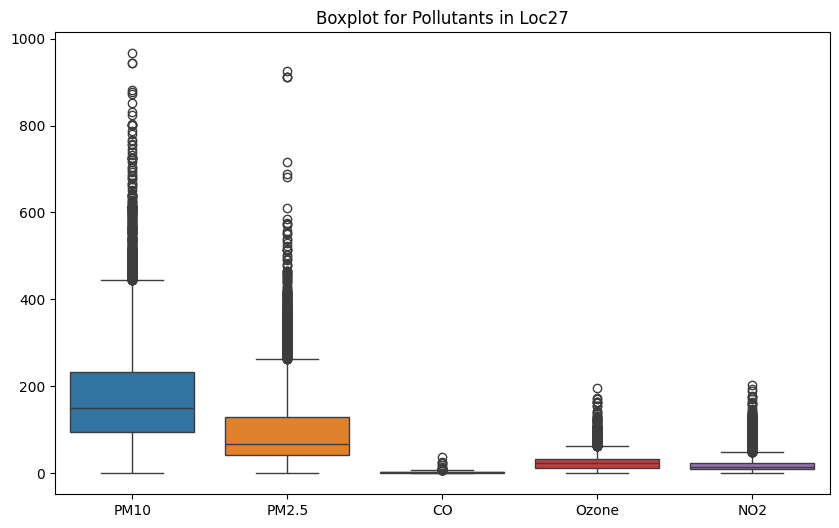


🚀 Training Model for: Loc27

ML Performance for Loc27:
MAE: 16.68, MSE: 751.01


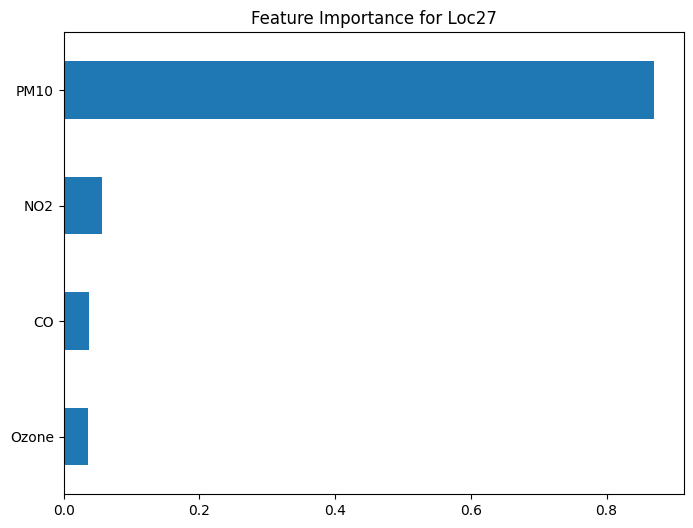


📍 Analyzing Data for: Loc28

Sample Data for Loc28:
             From_Date             To_Date    PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  154.50  99.25  1.38  38.55  43.75   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  132.50  89.25  1.25  51.70  36.50   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  124.75  79.75  1.17  58.05  32.75   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  118.75  67.50  1.15  64.85  35.95   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  109.75  71.25  1.20  60.70  41.30   

  Location  
0    Loc28  
1    Loc28  
2    Loc28  
3    Loc28  
4    Loc28  

Summary Statistics for Loc28:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   216.867920   100.674537   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     1.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15:00:00

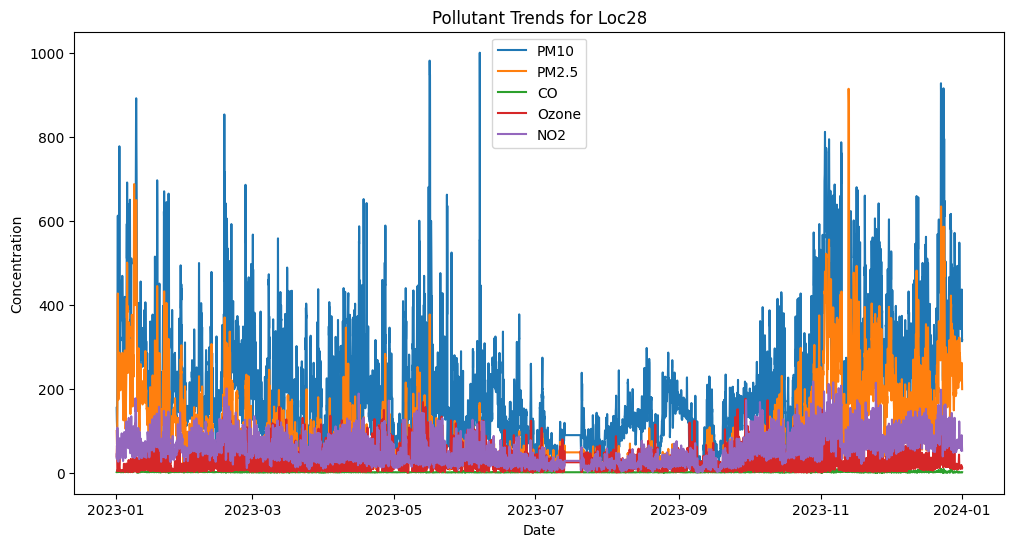

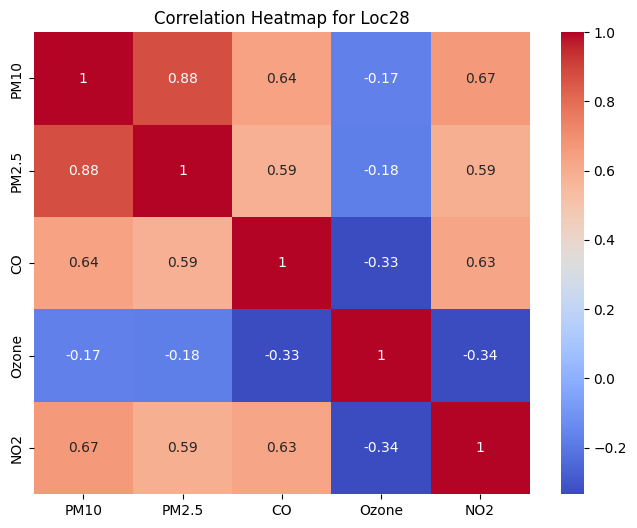

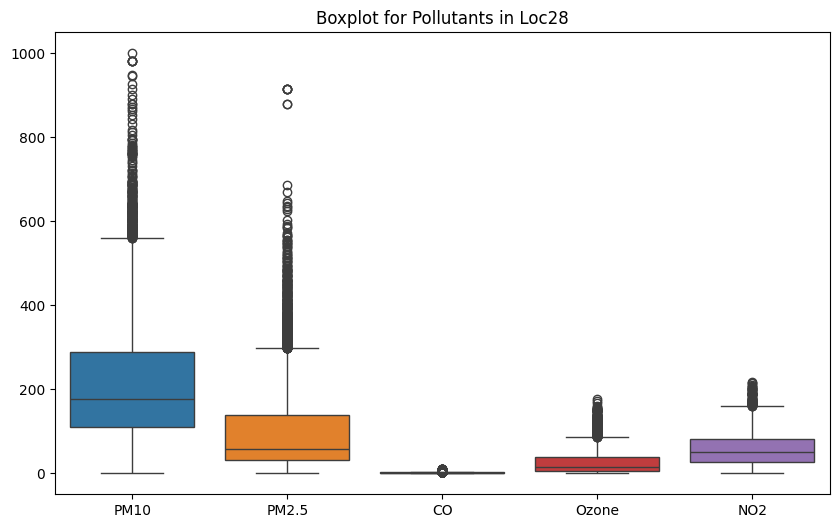


🚀 Training Model for: Loc28

ML Performance for Loc28:
MAE: 21.88, MSE: 1330.69


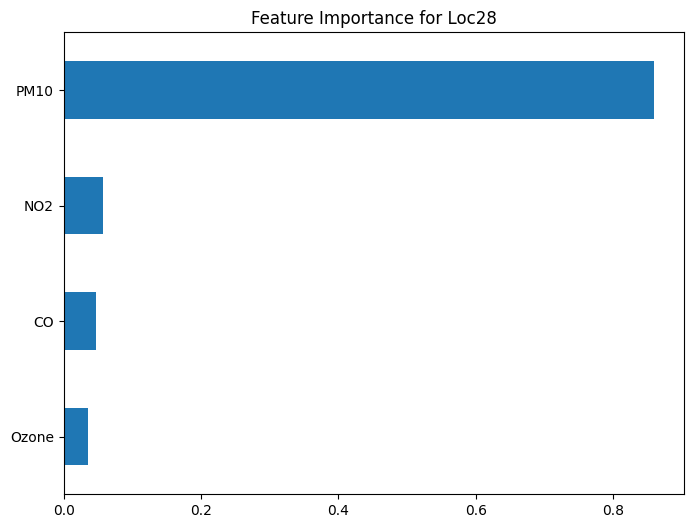


📍 Analyzing Data for: Loc29

Sample Data for Loc29:
             From_Date             To_Date    PM10   PM2.5    CO   Ozone  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  204.00  145.25  1.65   78.65   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  202.50  139.25  1.48  122.28   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  164.00  111.25  1.32  144.00   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  143.75   87.50  1.28  153.97   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  146.75   86.50  1.23  142.50   

     NO2 Location  
0  59.73    Loc29  
1  39.80    Loc29  
2  29.38    Loc29  
3  27.42    Loc29  
4  28.58    Loc29  

Summary Statistics for Loc29:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   215.459674   106.567200   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     2.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04

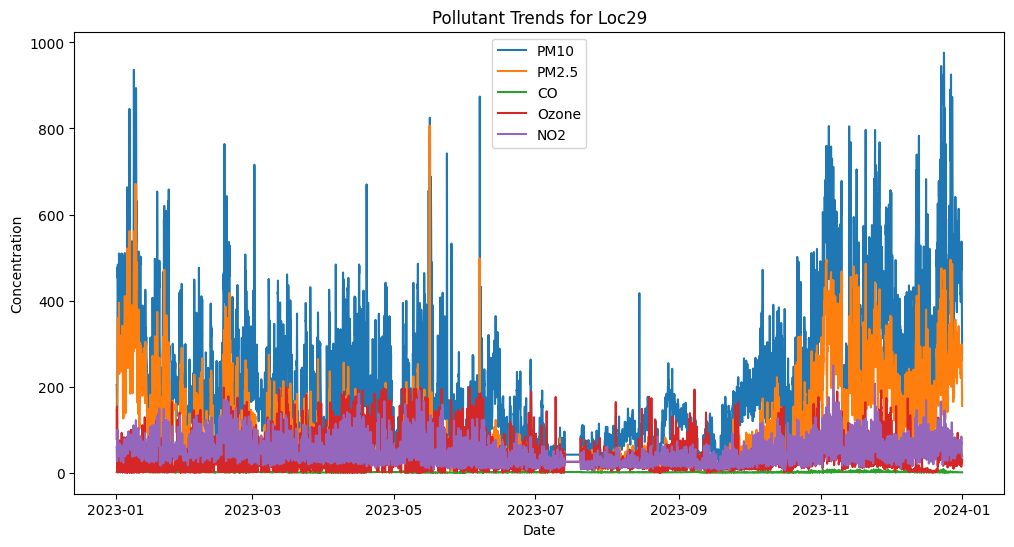

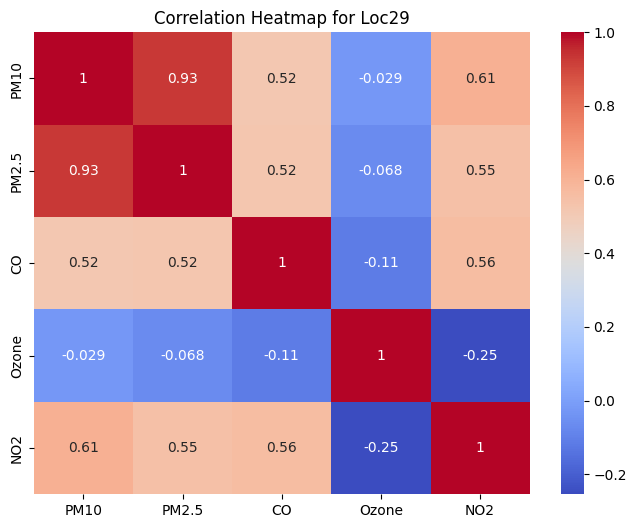

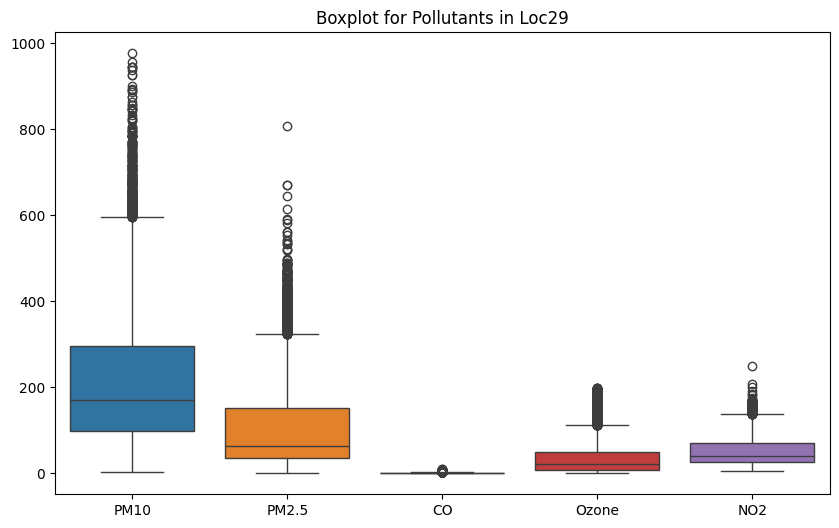


🚀 Training Model for: Loc29

ML Performance for Loc29:
MAE: 20.21, MSE: 973.04


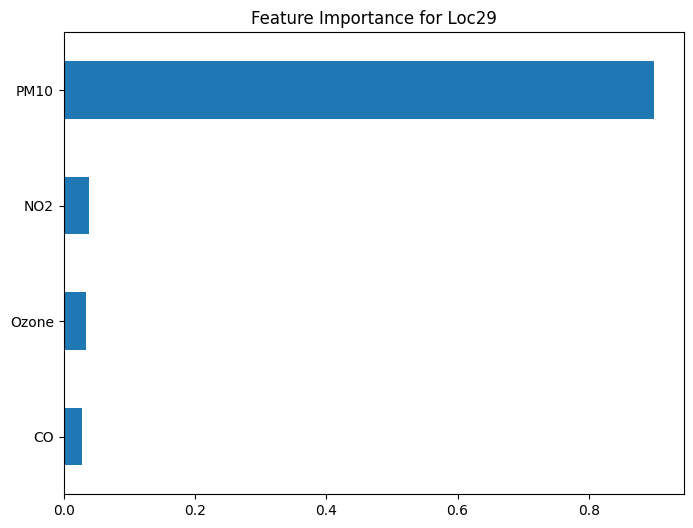


📍 Analyzing Data for: Loc30

Sample Data for Loc30:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  173.50  112.00  0.57   7.30  62.10   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  143.25   60.25  0.45   7.77  61.45   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  142.25   89.00  0.40   7.73  64.10   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  155.00   99.25  0.40   7.45  65.95   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  162.50   99.00  0.35   8.08  67.03   

  Location  
0    Loc30  
1    Loc30  
2    Loc30  
3    Loc30  
4    Loc30  

Summary Statistics for Loc30:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   222.023494   117.190893   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     8.750000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15

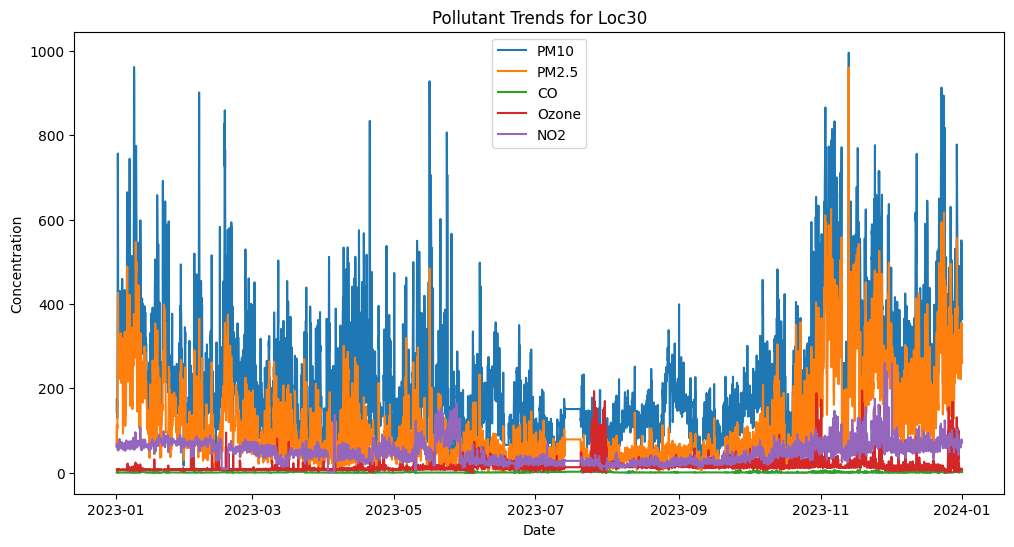

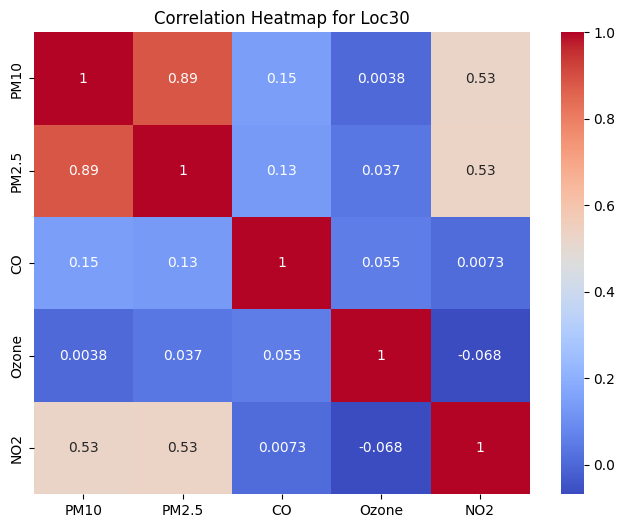

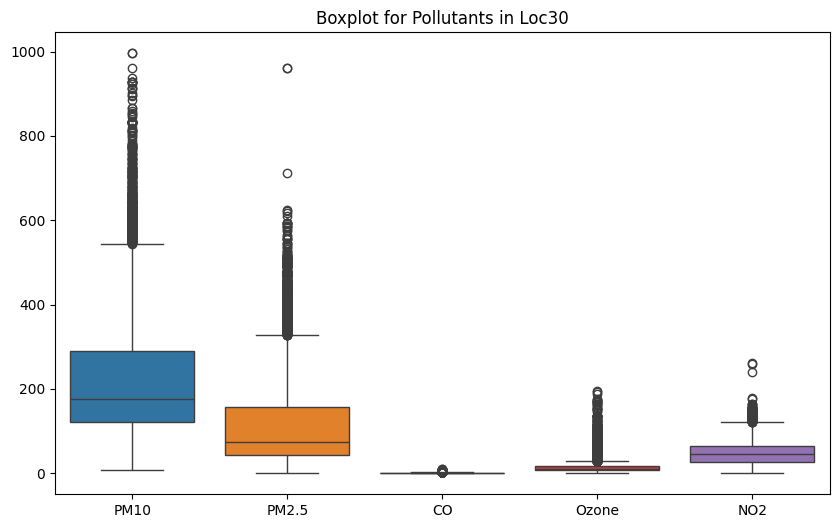


🚀 Training Model for: Loc30

ML Performance for Loc30:
MAE: 22.84, MSE: 1272.96


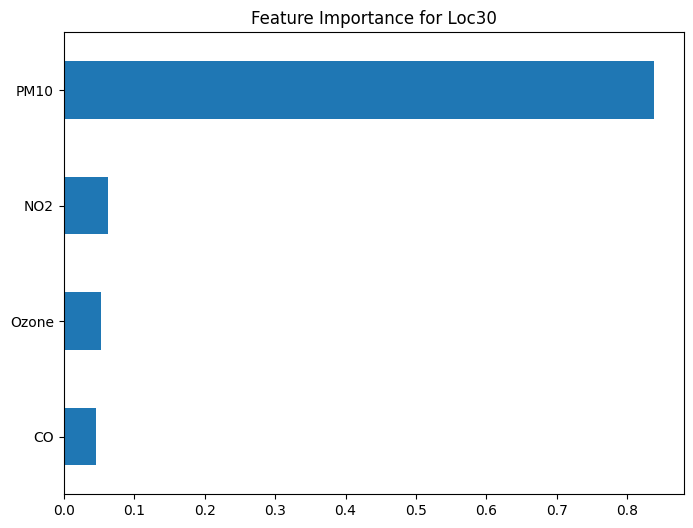


📍 Analyzing Data for: Loc31

Sample Data for Loc31:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  240.75  137.75  1.00   5.23  41.92   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  204.25  109.50  1.15   7.12  41.62   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  186.50  104.00  0.93  13.35  27.58   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  163.50   92.75  1.00  12.88  39.48   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  178.50   92.00  1.00   9.85  46.40   

  Location  
0    Loc31  
1    Loc31  
2    Loc31  
3    Loc31  
4    Loc31  

Summary Statistics for Loc31:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   224.531270    94.799234   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     5.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15

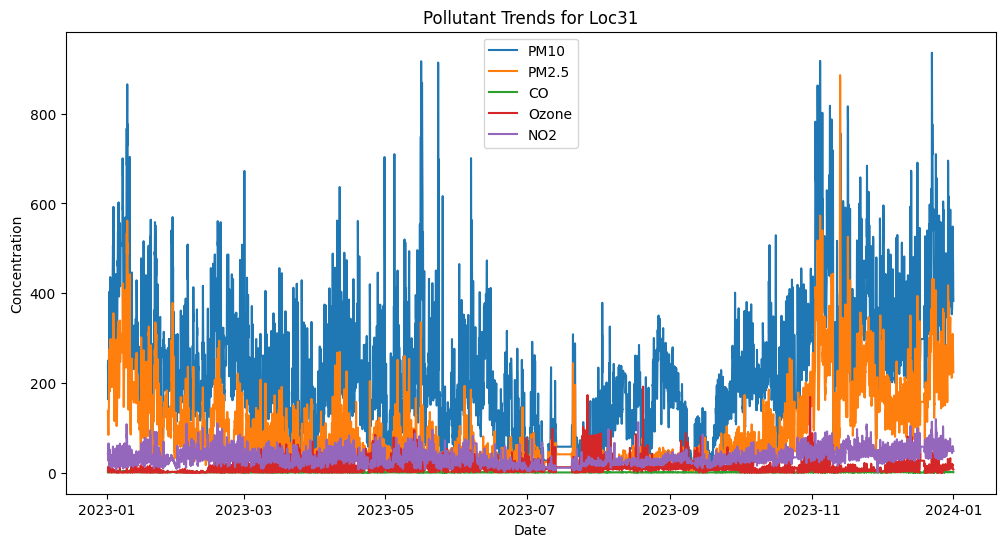

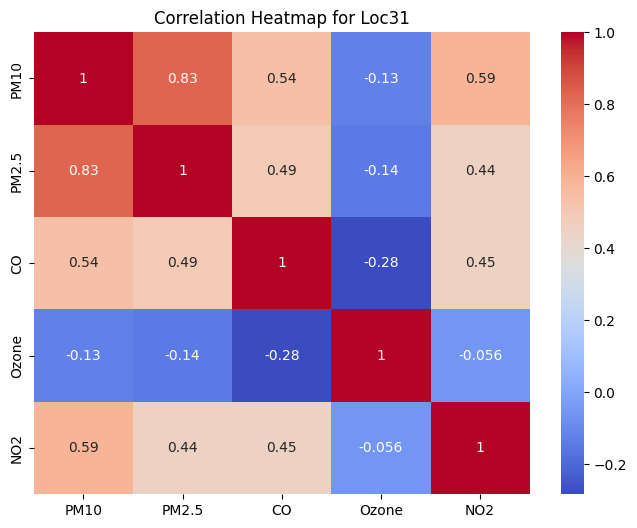

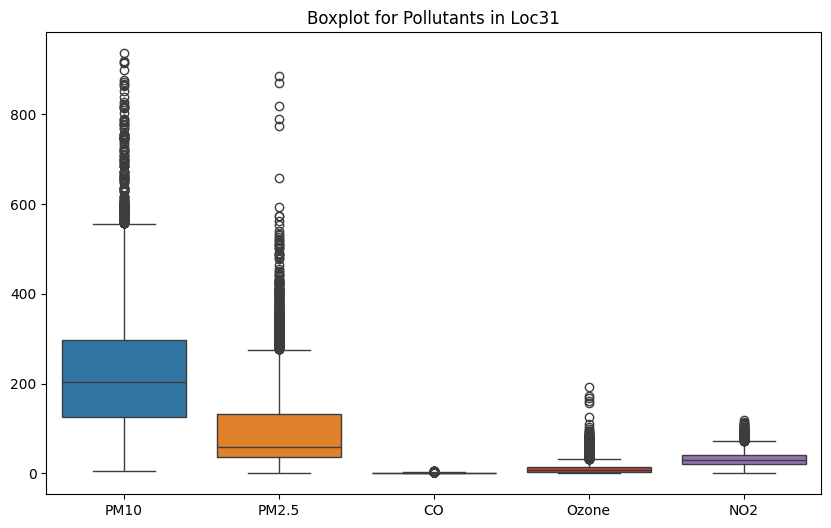


🚀 Training Model for: Loc31

ML Performance for Loc31:
MAE: 23.84, MSE: 1347.33


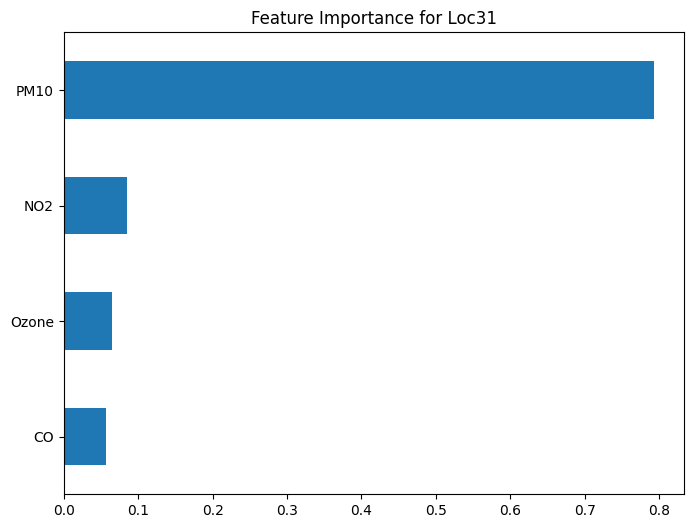


📍 Analyzing Data for: Loc32

Sample Data for Loc32:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  168.50  111.93  0.61  37.58  28.47   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  164.00  107.78  0.56  42.03  25.71   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  141.96   93.23  0.51  46.41  21.11   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  123.94   90.03  0.49  49.32  21.37   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  113.26   62.34  0.46  46.13  23.24   

  Location  
0    Loc32  
1    Loc32  
2    Loc32  
3    Loc32  
4    Loc32  

Summary Statistics for Loc32:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   153.279169    79.997125   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     0.600000     0.150000   
25%    2023-04-02 14:00:00  2023-04-02 15

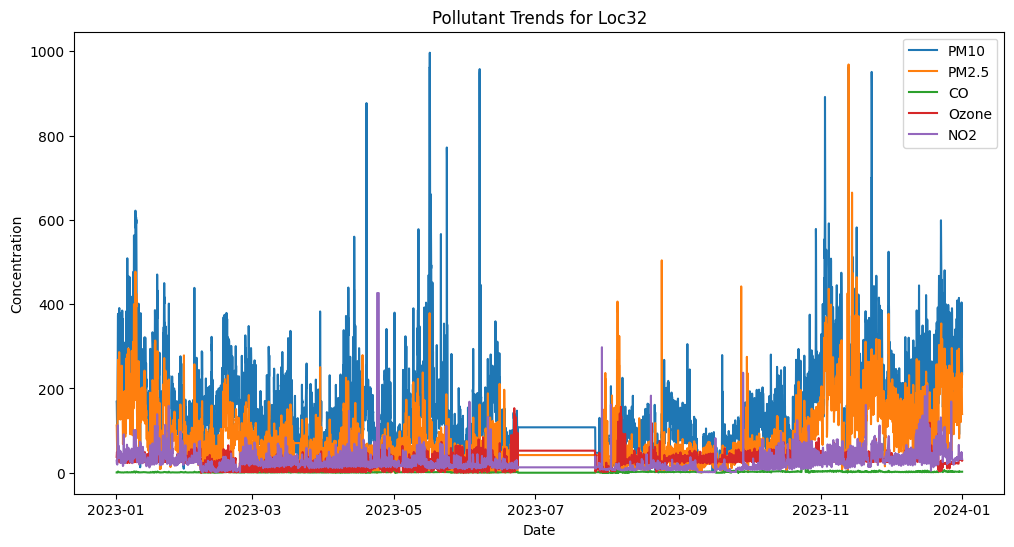

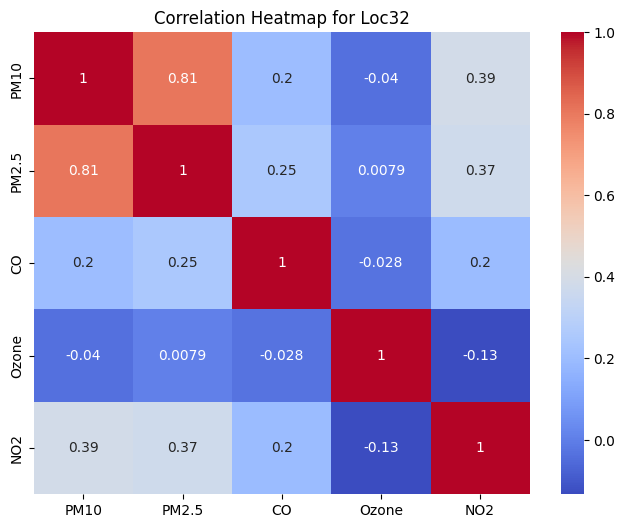

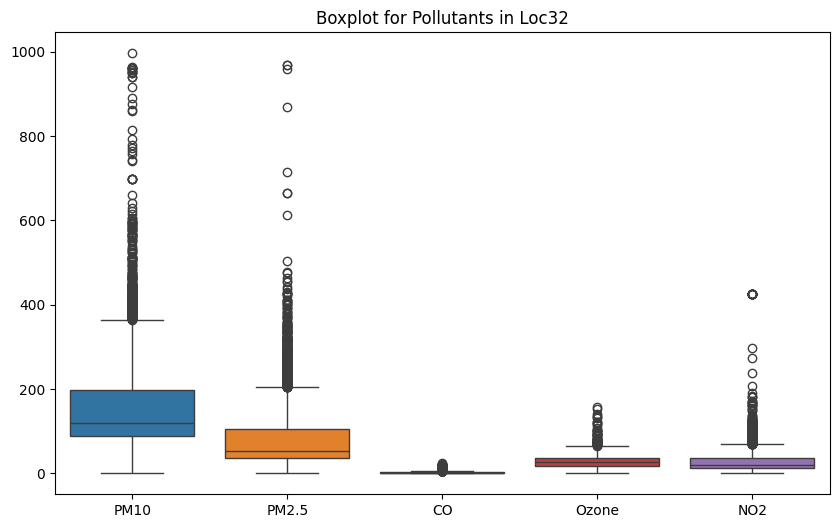


🚀 Training Model for: Loc32

ML Performance for Loc32:
MAE: 17.58, MSE: 957.51


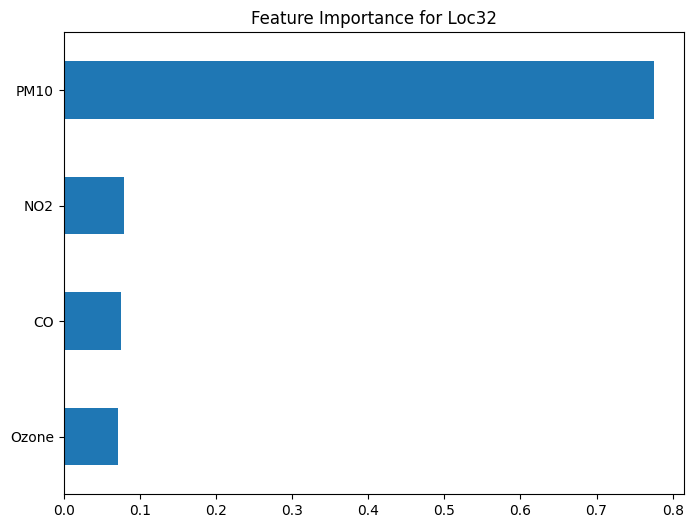


📍 Analyzing Data for: Loc33

Sample Data for Loc33:
             From_Date             To_Date    PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  136.33  92.75  0.57  52.00  26.45   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  116.00  79.75  0.58  67.35  20.27   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  109.33  79.50  0.60  82.95  12.38   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  106.33  76.75  0.60  89.25  11.15   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  111.33  66.50  0.70  86.85  16.35   

  Location  
0    Loc33  
1    Loc33  
2    Loc33  
3    Loc33  
4    Loc33  

Summary Statistics for Loc33:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   208.093461   119.632893   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     2.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15:00:00

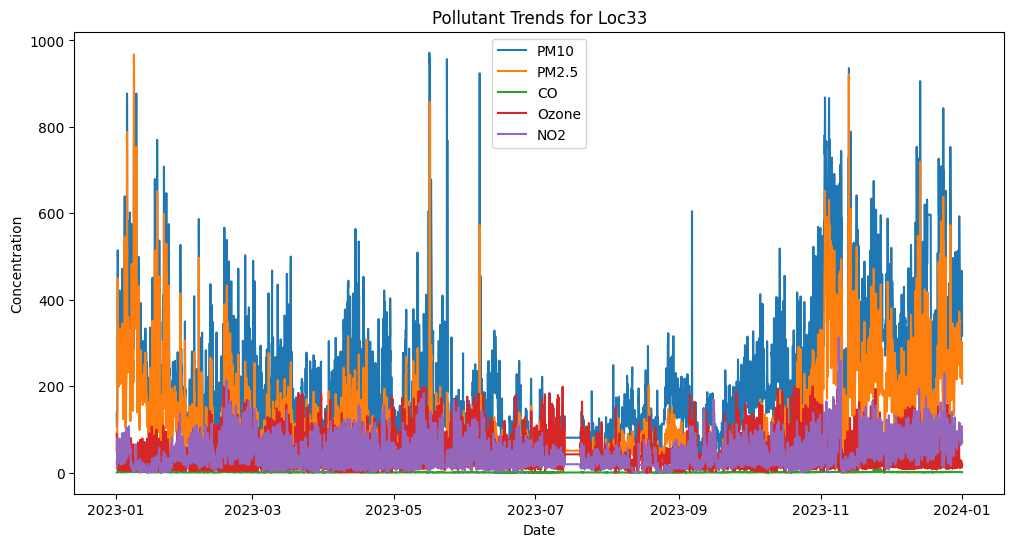

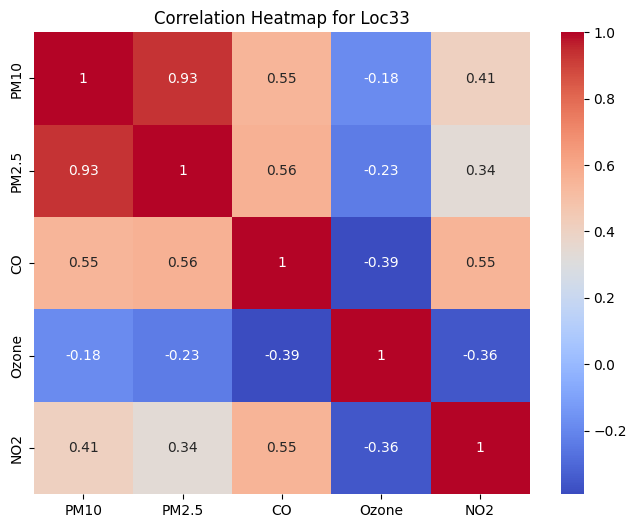

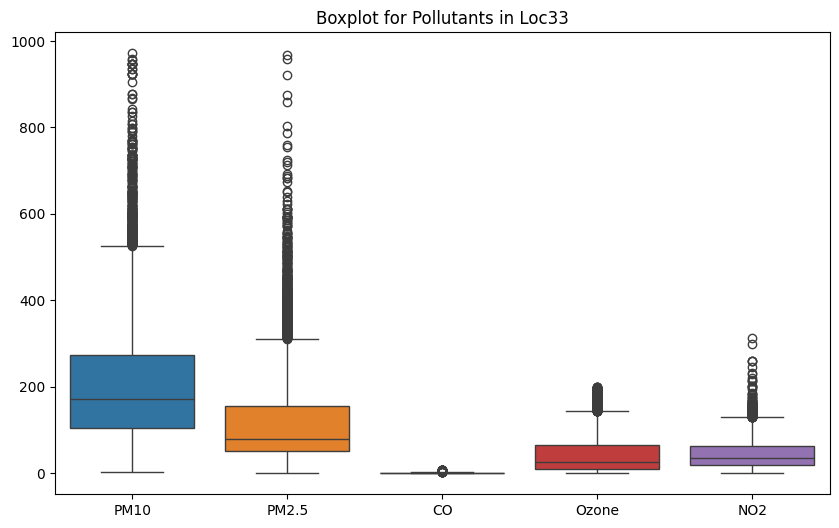


🚀 Training Model for: Loc33

ML Performance for Loc33:
MAE: 18.56, MSE: 790.57


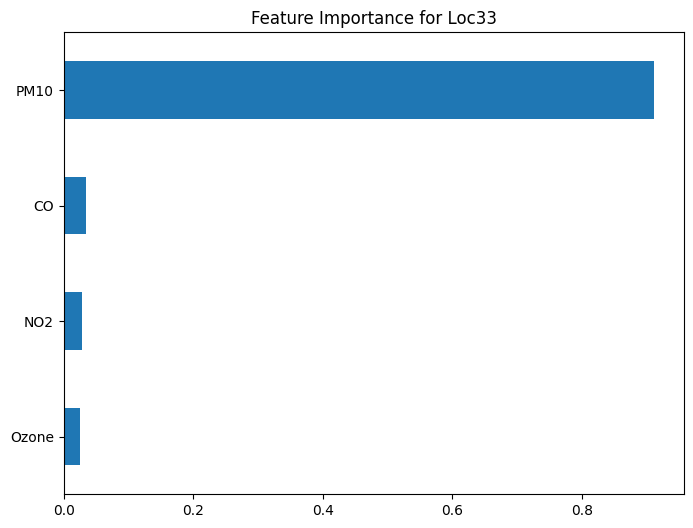


📍 Analyzing Data for: Loc34

Sample Data for Loc34:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  219.75  135.67  0.75  24.10  13.55   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  182.50  127.33  0.80  32.30  14.98   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  185.75  119.00  0.77  40.60   9.00   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  146.75   99.67  0.75  42.35   9.65   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  152.50  100.33  0.82  44.07   7.78   

  Location  
0    Loc34  
1    Loc34  
2    Loc34  
3    Loc34  
4    Loc34  

Summary Statistics for Loc34:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   229.975329   112.658950   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     5.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15

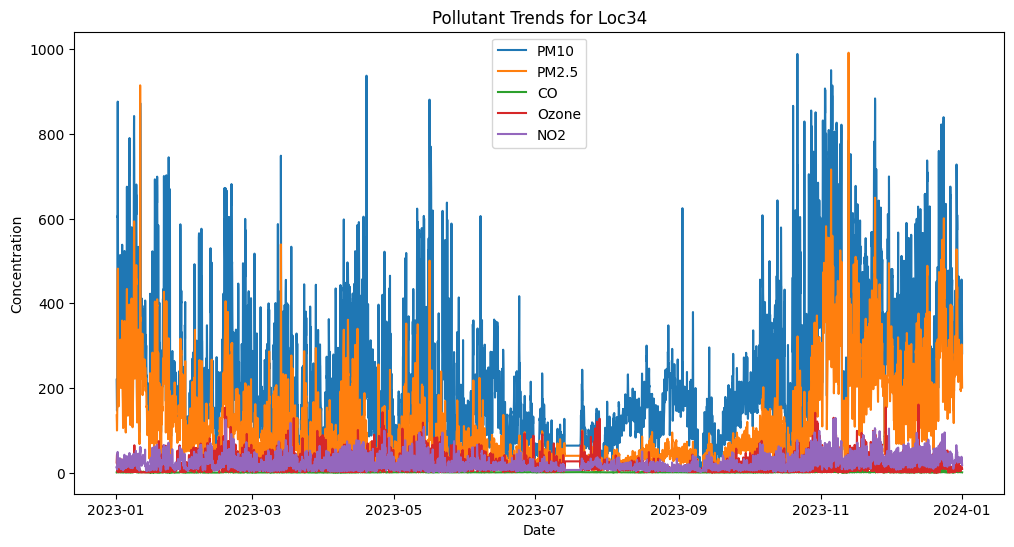

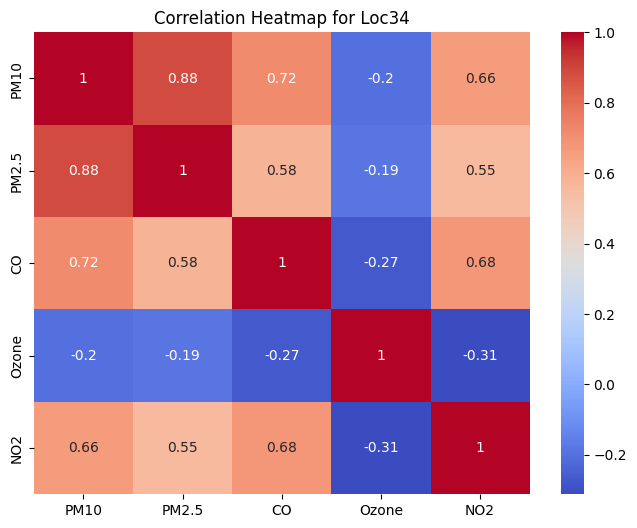

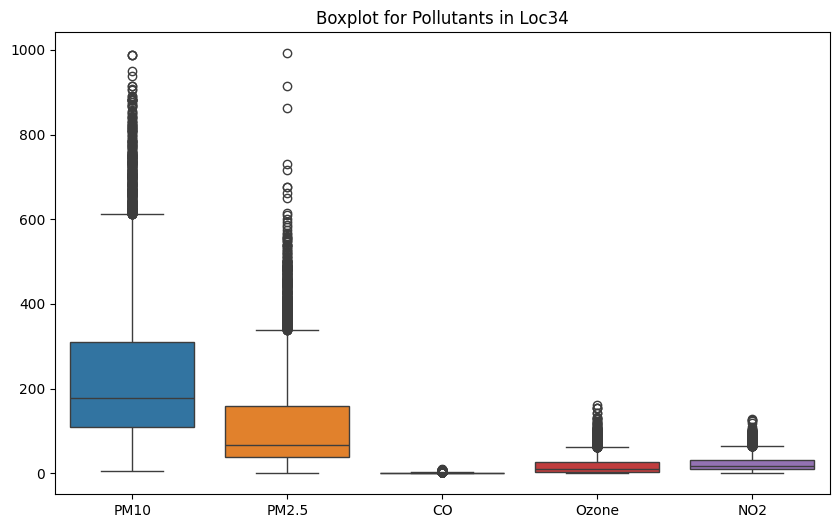


🚀 Training Model for: Loc34

ML Performance for Loc34:
MAE: 26.14, MSE: 1687.00


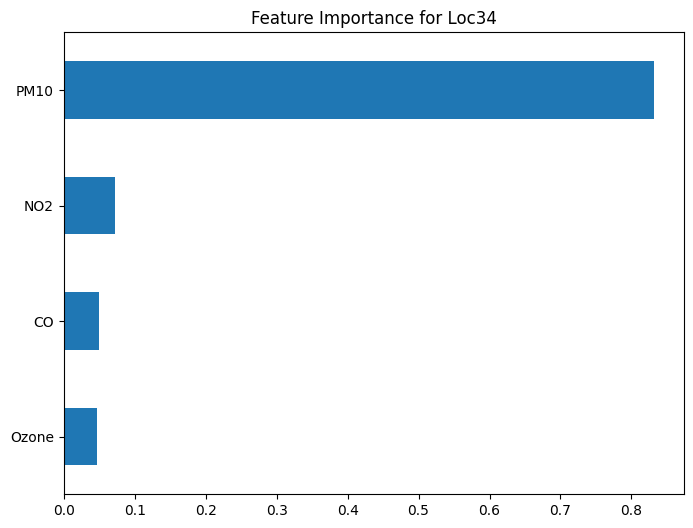


📍 Analyzing Data for: Loc35

Sample Data for Loc35:
             From_Date             To_Date    PM10   PM2.5  CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  221.17  113.85 NaN  17.91  23.84   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  216.28   73.22 NaN   5.27  23.29   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  205.20   87.57 NaN   4.19  21.66   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  206.75   83.22 NaN   3.75  21.26   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  221.27   73.75 NaN  15.74  20.20   

  Location  
0    Loc35  
1    Loc35  
2    Loc35  
3    Loc35  
4    Loc35  

Summary Statistics for Loc35:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   240.859059   116.703784   
min    2023-01-01 11:00:00  2023-01-01 12:00:00    11.170000    10.000000   
25%    2023-04-02 14:00:00  2023-04-02 15:00:00   122

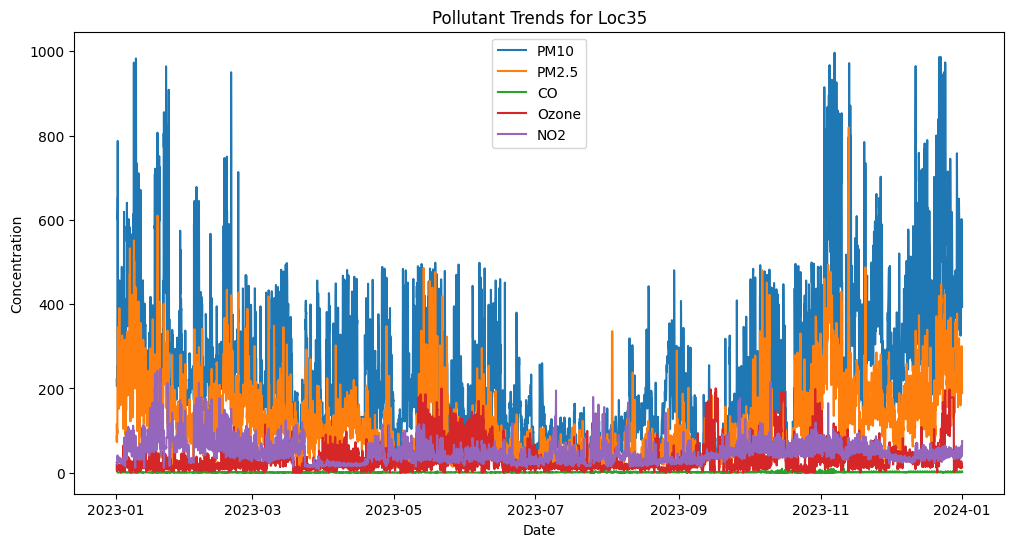

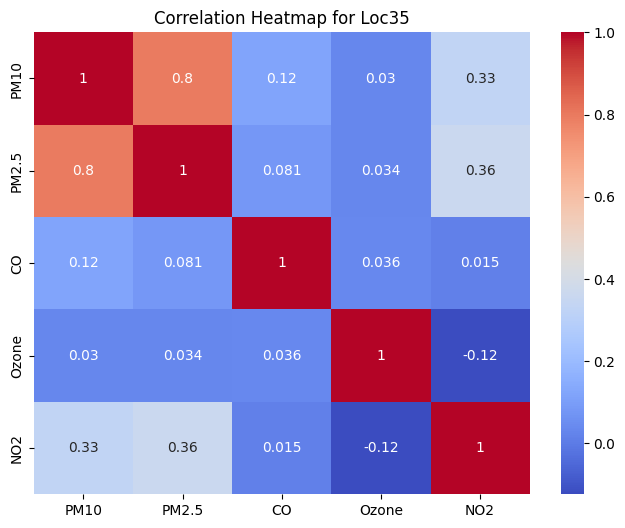

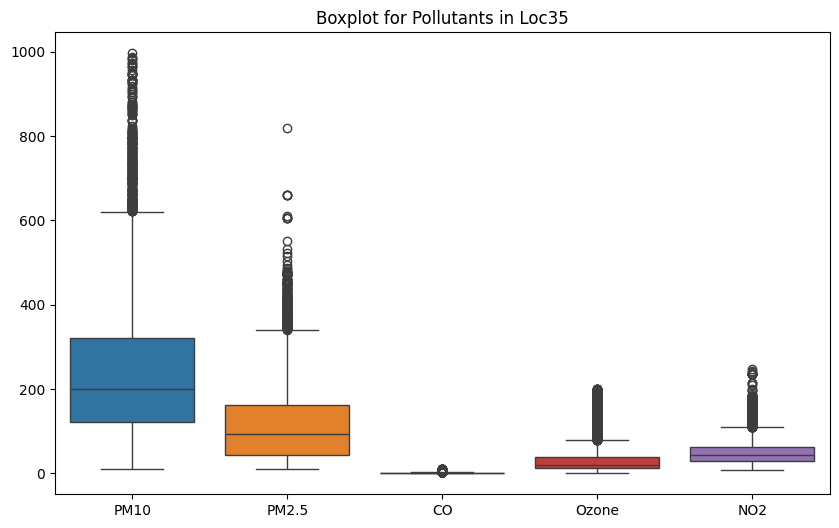


🚀 Training Model for: Loc35

ML Performance for Loc35:
MAE: 34.05, MSE: 2339.88


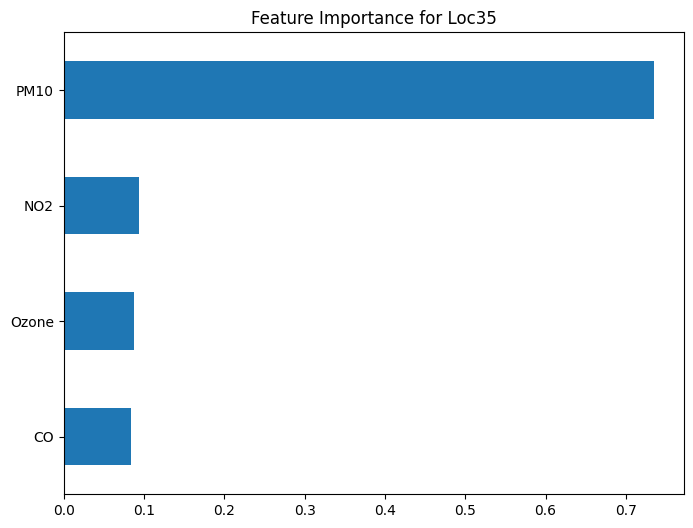


📍 Analyzing Data for: Loc36

Sample Data for Loc36:
             From_Date             To_Date    PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  144.00  81.25  0.46  24.10  20.85   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  136.00  73.00  0.42  32.15  18.10   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  136.75  74.00  0.39  42.88  15.73   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  125.00  68.00  0.36  47.78  14.20   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  123.00  67.00  0.37  49.12  14.08   

  Location  
0    Loc36  
1    Loc36  
2    Loc36  
3    Loc36  
4    Loc36  

Summary Statistics for Loc36:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   202.986992    95.966299   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     3.000000     0.850000   
25%    2023-04-02 14:00:00  2023-04-02 15:00:00

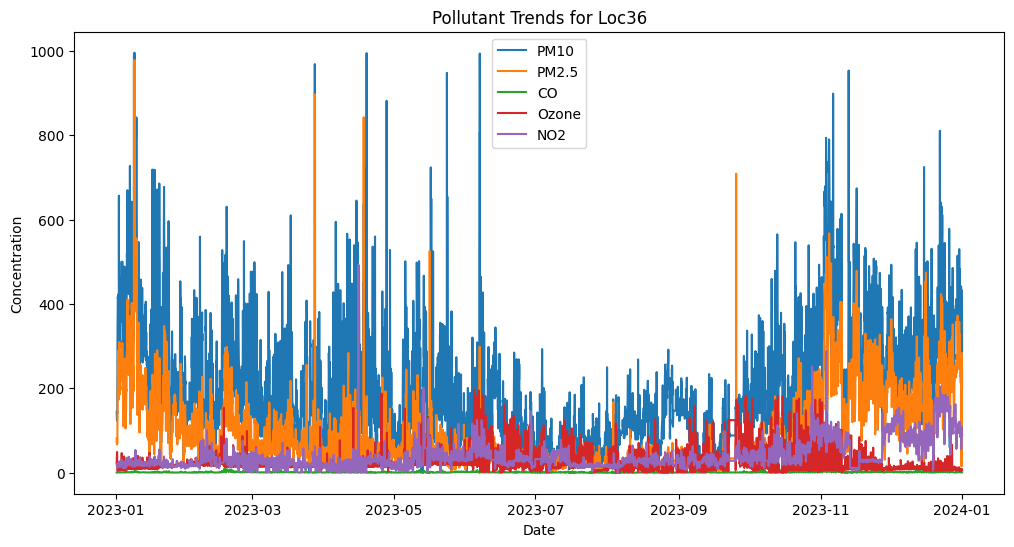

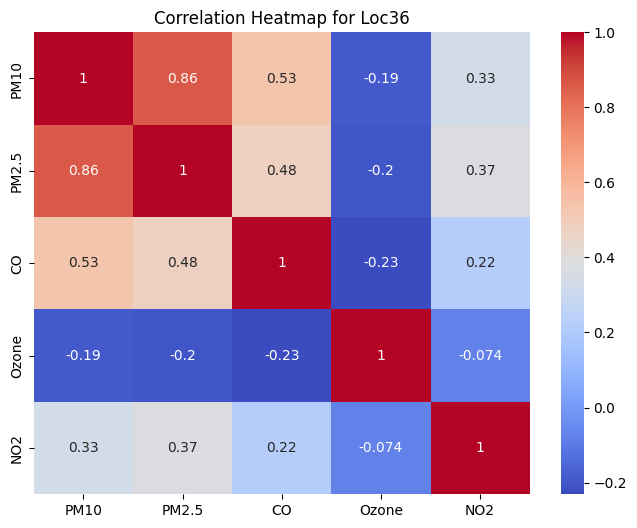

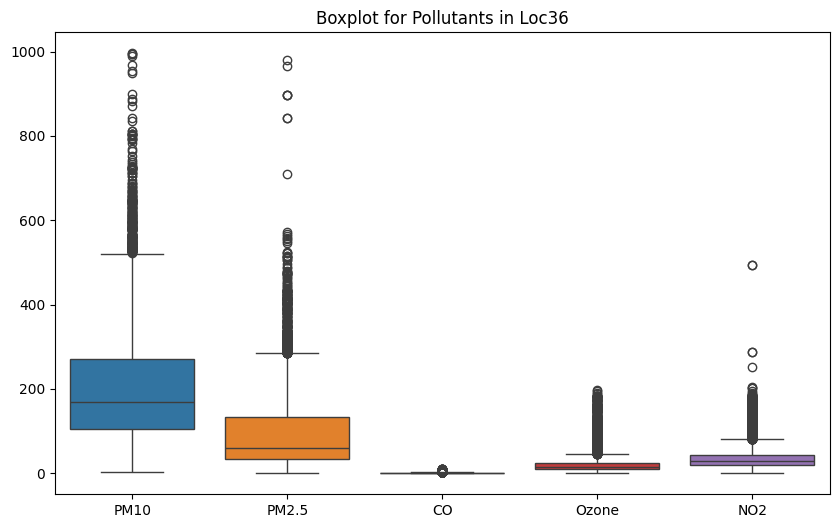


🚀 Training Model for: Loc36

ML Performance for Loc36:
MAE: 18.59, MSE: 967.83


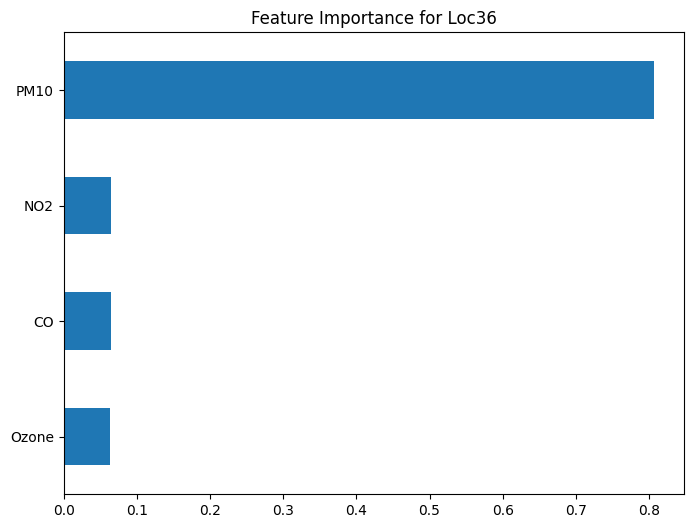


📍 Analyzing Data for: Loc37

Sample Data for Loc37:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  206.33  131.00  1.00  23.15  19.35   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  205.50  127.25  0.97  29.43  19.00   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  205.50  122.75  0.95  34.80  16.43   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  191.00  117.75  0.82  38.10  12.62   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  163.00   97.75  0.80  37.23  11.25   

  Location  
0    Loc37  
1    Loc37  
2    Loc37  
3    Loc37  
4    Loc37  

Summary Statistics for Loc37:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   221.129614   107.636955   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     2.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15

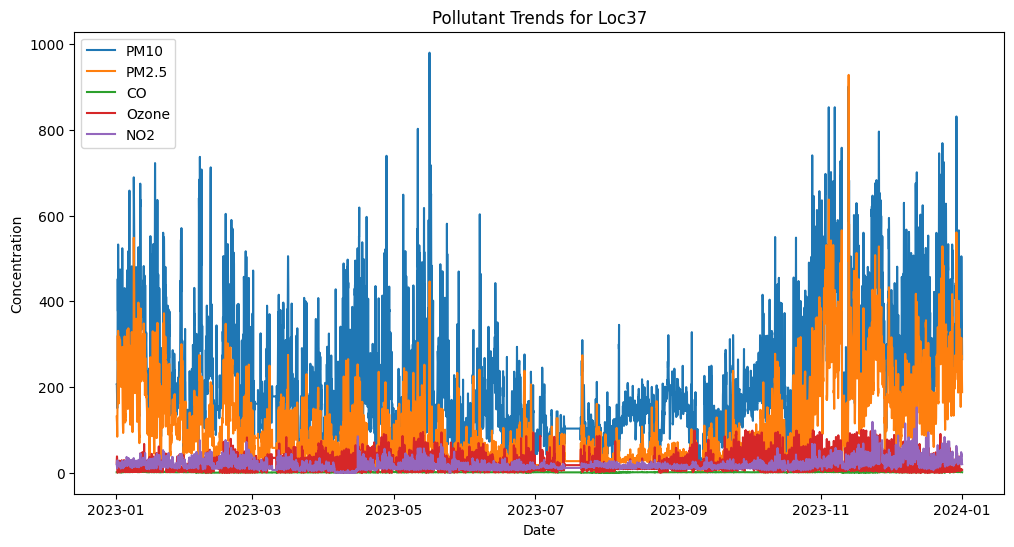

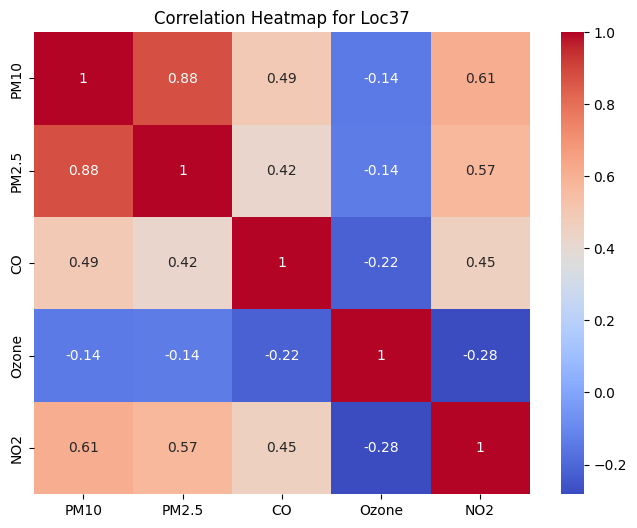

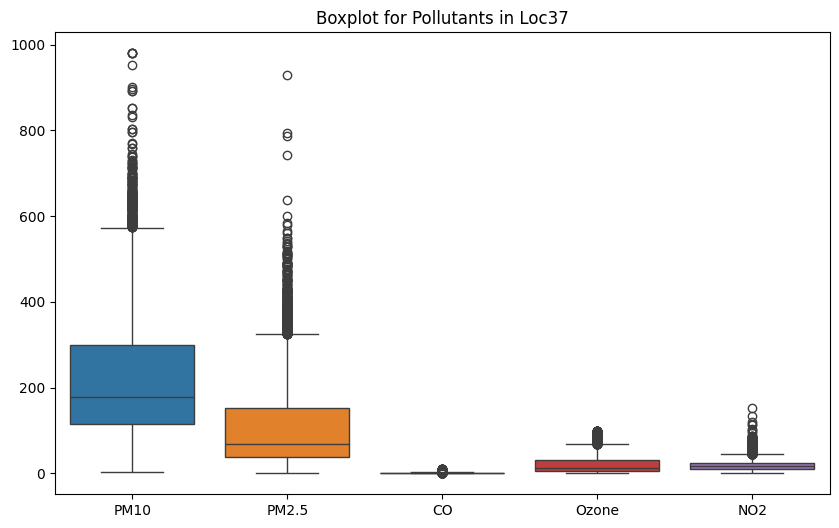


🚀 Training Model for: Loc37

ML Performance for Loc37:
MAE: 25.82, MSE: 1517.65


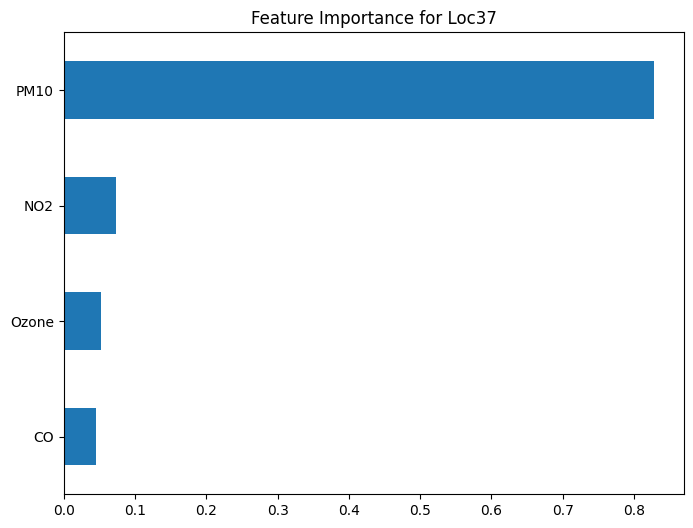


📍 Analyzing Data for: Loc38

Sample Data for Loc38:
             From_Date             To_Date    PM10  PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  133.25  98.00  0.80  44.70  26.98   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  124.50  88.00  0.80  53.50  24.52   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  122.50  87.25  0.80  62.88  21.62   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  118.25  91.25  0.77  62.05  21.08   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  111.75  83.00  0.82  64.97  20.02   

  Location  
0    Loc38  
1    Loc38  
2    Loc38  
3    Loc38  
4    Loc38  

Summary Statistics for Loc38:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   153.871431    86.188080   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     3.000000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15:00:00

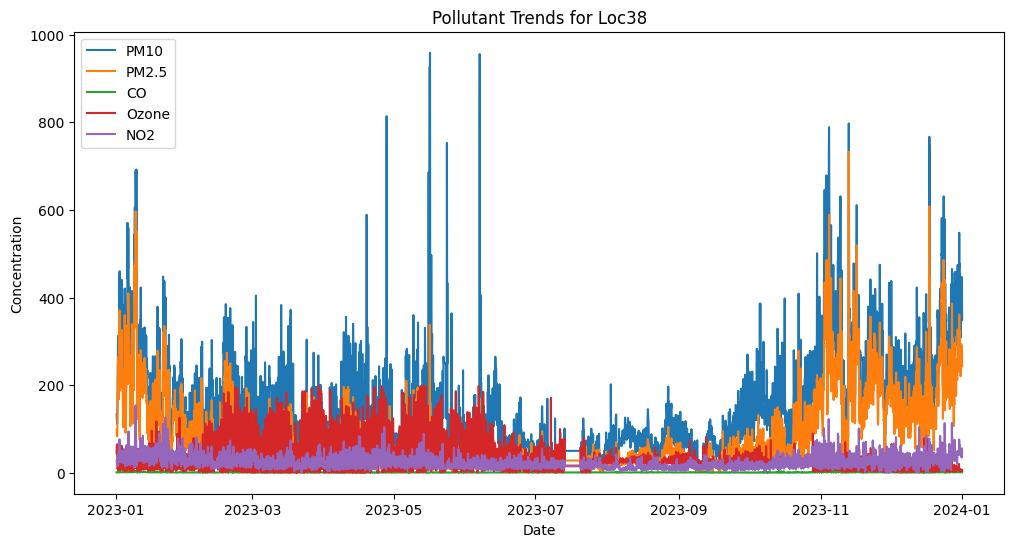

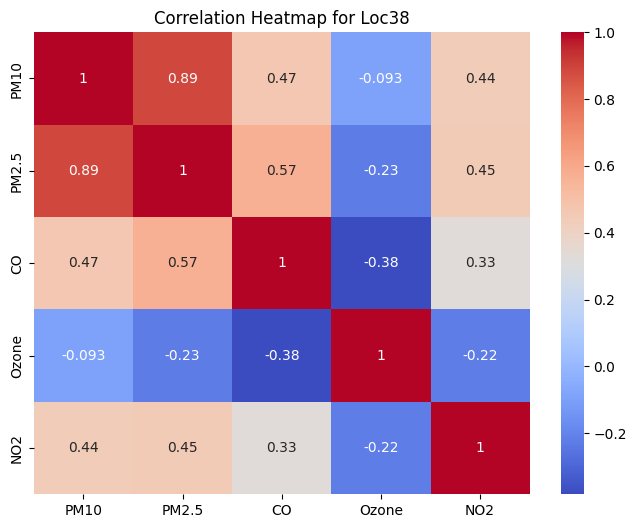

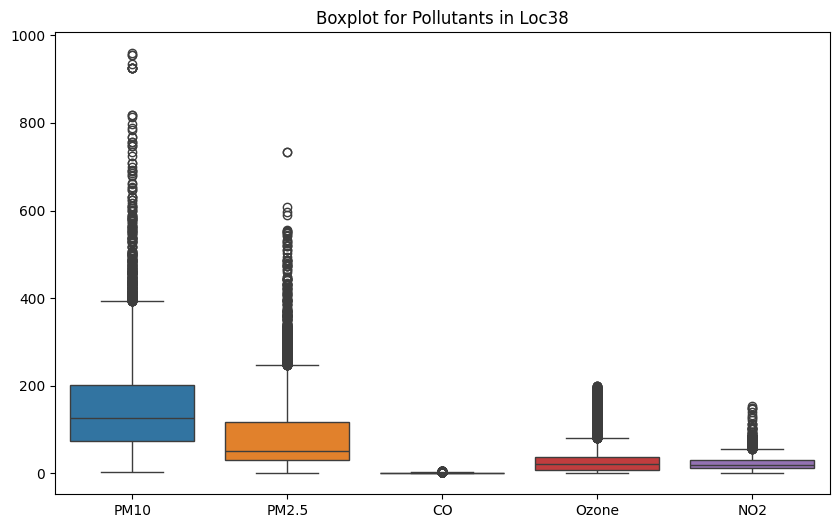


🚀 Training Model for: Loc38

ML Performance for Loc38:
MAE: 12.72, MSE: 393.52


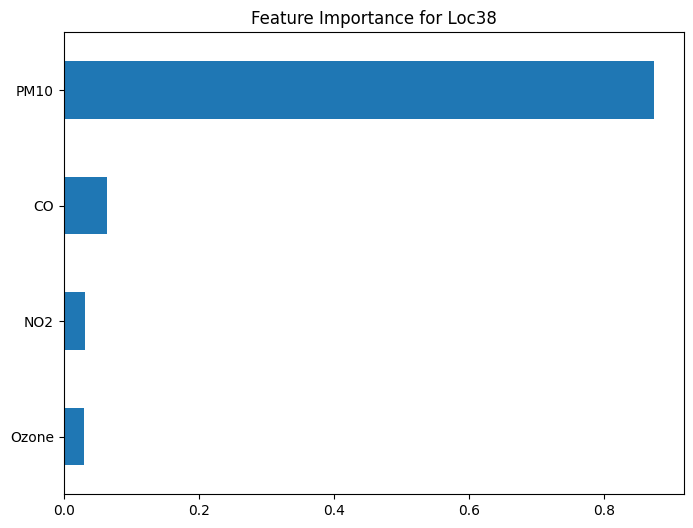


📍 Analyzing Data for: Loc40

Sample Data for Loc40:
             From_Date             To_Date    PM10   PM2.5    CO  Ozone    NO2  \
0 2023-01-01 11:00:00 2023-01-01 12:00:00  274.75  162.25  1.25  39.02  29.80   
1 2023-01-01 12:00:00 2023-01-01 13:00:00  272.25  154.50  1.07  51.95  23.80   
2 2023-01-01 13:00:00 2023-01-01 14:00:00  227.75  137.75  0.88  58.73  18.30   
3 2023-01-01 14:00:00 2023-01-01 15:00:00  188.75  106.50  0.83  60.53  17.60   
4 2023-01-01 15:00:00 2023-01-01 16:00:00  177.50   94.25  0.80  57.98  17.73   

  Location  
0    Loc40  
1    Loc40  
2    Loc40  
3    Loc40  
4    Loc40  

Summary Statistics for Loc40:
                  From_Date              To_Date         PM10        PM2.5  \
count                 8749                 8749  8749.000000  8749.000000   
mean   2023-07-02 17:00:00  2023-07-02 18:00:00   268.655598   121.911791   
min    2023-01-01 11:00:00  2023-01-01 12:00:00     3.250000     1.000000   
25%    2023-04-02 14:00:00  2023-04-02 15

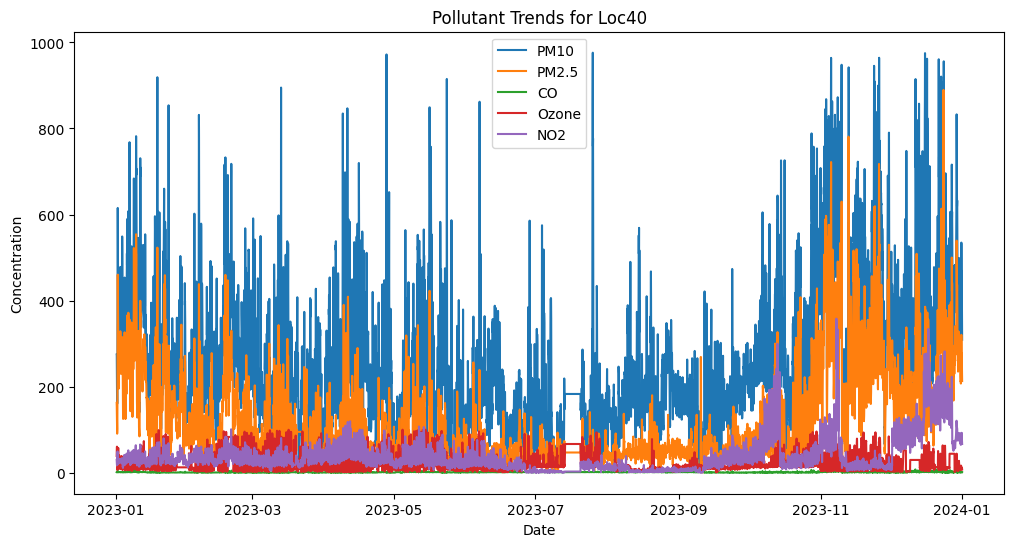

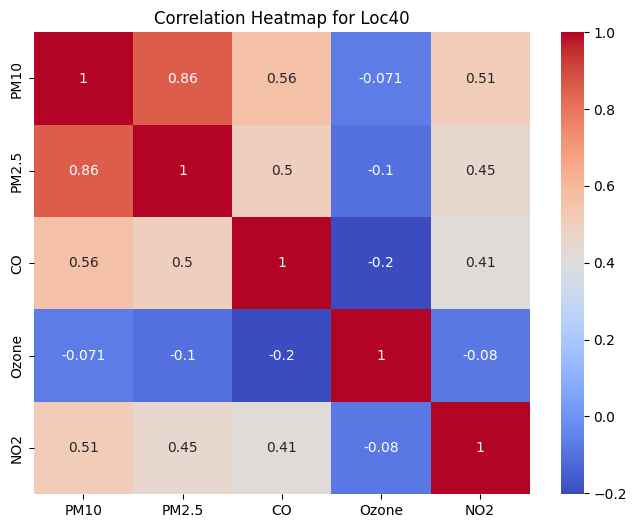

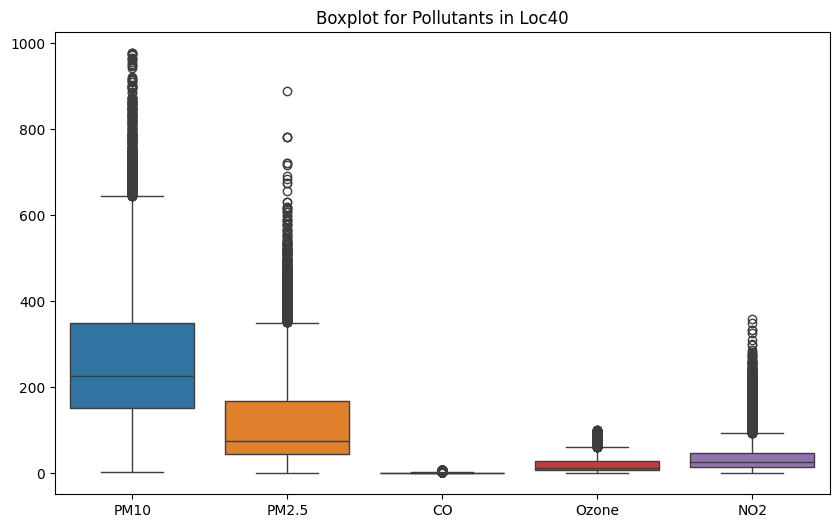


🚀 Training Model for: Loc40

ML Performance for Loc40:
MAE: 29.77, MSE: 2020.63


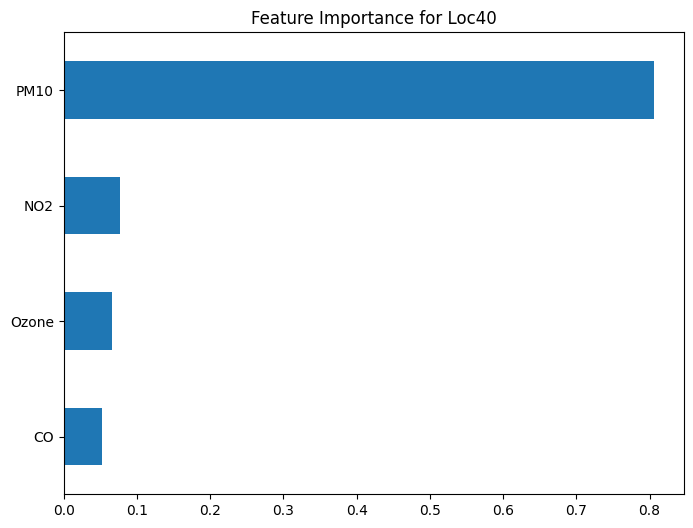

In [ ]:
# Process each file separately
for i in location_names.keys():
    file_url = f"{BASE_URL}{i}.csv"

    try:
        response = requests.get(file_url)
        if response.status_code == 200:
            # Read the CSV data
            csv_data = StringIO(response.text)
            df = pd.read_csv(csv_data)

            # Preprocess and clean data
            location = location_names[i]
            df = preprocess_data(df, location)

            # Perform EDA and visualization
            perform_eda(df, location)

            # Train and evaluate model
            train_model(df, location)

        else:
            print(f"⚠️ Failed to load: {location} (File: COMP{i})")

    except Exception as e:
        print(f"❌ Error loading {location} (File: COMP{i}): {e}")


In [ ]:
# Create a Folium map to visualize pollution levels
def create_pollution_map(df_list):
    # Calculate average PM2.5 for each location
    avg_pm25 = {loc: df['PM2.5'].mean() for loc, df in df_list.items()}

    # Create a Folium map centered on Delhi
    pollution_map = folium.Map(location=[28.7041, 77.1025], zoom_start=10)

    # Add markers for each location
    for loc, avg in avg_pm25.items():
        folium.Marker(
            location=[28.7041, 77.1025],  # Replace with actual coordinates if available
            popup=f"{loc}: Avg PM2.5 = {avg:.2f}",
            icon=folium.Icon(color='red' if avg > 100 else 'green')
        ).add_to(pollution_map)

    # Display the map
    return pollution_map

# Combine data from all locations
df_list = {}
for i in location_names.keys():
    file_url = f"{BASE_URL}{i}.csv"
    response = requests.get(file_url)
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        df = preprocess_data(df, location_names[i])
        df_list[location_names[i]] = df

# Create and display pollution map
pollution_map = create_pollution_map(df_list)
pollution_map

In [ ]:
# Define coordinates for all 40 locations in Delhi
location_coords = {
    "Loc1": [28.61, 77.23],
    "Loc2": [28.62, 77.24],
    "Loc3": [28.63, 77.25],
    "Loc4": [28.64, 77.26],
    "Loc5": [28.65, 77.27],
    "Loc6": [28.66, 77.28],
    "Loc7": [28.67, 77.29],
    "Loc8": [28.68, 77.30],
    "Loc9": [28.69, 77.31],
    "Loc10": [28.70, 77.32],
    "Loc11": [28.71, 77.33],
    "Loc12": [28.72, 77.34],
    "Loc13": [28.73, 77.35],
    "Loc14": [28.74, 77.36],
    "Loc15": [28.75, 77.37],
    "Loc16": [28.76, 77.38],
    "Loc17": [28.77, 77.39],
    "Loc18": [28.78, 77.40],
    "Loc19": [28.79, 77.41],
    "Loc20": [28.80, 77.42],
    "Loc21": [28.81, 77.43],
    "Loc22": [28.82, 77.44],
    "Loc23": [28.83, 77.45],
    "Loc24": [28.84, 77.46],
    "Loc25": [28.85, 77.47],
    "Loc26": [28.86, 77.48],
    "Loc27": [28.87, 77.49],
    "Loc28": [28.88, 77.50],
    "Loc29": [28.89, 77.51],
    "Loc30": [28.90, 77.52],
    "Loc31": [28.91, 77.53],
    "Loc32": [28.92, 77.54],
    "Loc33": [28.93, 77.55],
    "Loc34": [28.94, 77.56],
    "Loc35": [28.95, 77.57],
    "Loc36": [28.96, 77.58],
    "Loc37": [28.97, 77.59],
    "Loc38": [28.98, 77.60],
    "Loc40": [28.99, 77.61],
}

# Function to generate a downloadable report for a location
def generate_report(df, location):
    report = f"""
    <h2>Pollution Analysis Report for {location}</h2>
    <h3>Summary Statistics</h3>
    {df[['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']].describe().to_html()}
    <h3>Future Forecast (Next 7 Days)</h3>
    <p>Forecasted PM2.5: {df['PM2.5'].mean() + np.random.normal(0, 5):.2f}</p>
    <p>Forecasted PM10: {df['PM10'].mean() + np.random.normal(0, 5):.2f}</p>
    <p>Forecasted CO: {df['CO'].mean() + np.random.normal(0, 0.1):.2f}</p>
    <p>Forecasted Ozone: {df['Ozone'].mean() + np.random.normal(0, 1):.2f}</p>
    <p>Forecasted NO2: {df['NO2'].mean() + np.random.normal(0, 2):.2f}</p>
    """
    return report

# Function to create a Folium map with detailed analysis and download options
def create_pollution_map(df_list):
    # Calculate average PM2.5 for each location
    avg_pm25 = {loc: df['PM2.5'].mean() for loc, df in df_list.items()}

    # Create a Folium map centered on Delhi
    pollution_map = folium.Map(location=[28.7041, 77.1025], zoom_start=10)

    # Add markers for each location
    for loc, df in df_list.items():
        # Get coordinates for the location
        coords = location_coords.get(loc, [28.7041, 77.1025])  # Default to Delhi center if coordinates not found

        # Calculate summary statistics for the location
        summary_stats = df[['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']].describe().to_dict()

        # Generate the report for the location
        report = generate_report(df, loc)

        # Create a tooltip with detailed analysis
        tooltip_text = f"""
        <b>Location:</b> {loc}<br>
        <b>Avg PM2.5:</b> {avg_pm25[loc]:.2f}<br>
        <b>PM10:</b> Mean={summary_stats['PM10']['mean']:.2f}, Max={summary_stats['PM10']['max']:.2f}<br>
        <b>PM2.5:</b> Mean={summary_stats['PM2.5']['mean']:.2f}, Max={summary_stats['PM2.5']['max']:.2f}<br>
        <b>CO:</b> Mean={summary_stats['CO']['mean']:.2f}, Max={summary_stats['CO']['max']:.2f}<br>
        <b>Ozone:</b> Mean={summary_stats['Ozone']['mean']:.2f}, Max={summary_stats['Ozone']['max']:.2f}<br>
        <b>NO2:</b> Mean={summary_stats['NO2']['mean']:.2f}, Max={summary_stats['NO2']['max']:.2f}<br>
        """

        # Create a popup with the report and download link
        popup_html = f"""
        <h3>{loc} Pollution Analysis</h3>
        {report}
        <a href="data:text/html;charset=utf-8,{report}" download="{loc}_report.html">Download Report</a>
        """

        # Add marker with tooltip and popup
        folium.Marker(
            location=coords,
            popup=folium.Popup(popup_html, max_width=500),
            tooltip=tooltip_text,
            icon=folium.Icon(color='red' if avg_pm25[loc] > 100 else 'green')
        ).add_to(pollution_map)

    # Display the map
    return pollution_map

# Combine data from all locations
df_list = {}
for i in location_names.keys():
    file_url = f"{BASE_URL}{i}.csv"
    response = requests.get(file_url)
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        df = preprocess_data(df, location_names[i])
        df_list[location_names[i]] = df

# Create and display pollution map
pollution_map = create_pollution_map(df_list)
pollution_map

In [ ]:
import os
import base64
from sklearn.linear_model import LinearRegression

# Function to save a plot as an image and return the base64 encoded string
def save_plot_as_image(plt):
    if not os.path.exists("plots"):
        os.makedirs("plots")
    plot_path = f"plots/plot_{np.random.randint(1000)}.png"
    plt.savefig(plot_path, bbox_inches='tight')
    plt.close()
    with open(plot_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

# Function to generate a downloadable report for a location
def generate_report(df, location):
    try:
        # Generate plots
        plt.figure(figsize=(12, 6))
        for pollutant in ['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']:
            plt.plot(df['From_Date'], df[pollutant], label=pollutant)
        plt.xlabel('Date')
        plt.ylabel('Concentration')
        plt.title(f'Pollutant Trends for {location}')
        plt.legend()
        trend_plot = save_plot_as_image(plt)

        plt.figure(figsize=(8, 6))
        sns.heatmap(df[['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']].corr(), annot=True, cmap='coolwarm')
        plt.title(f'Correlation Heatmap for {location}')
        correlation_plot = save_plot_as_image(plt)

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']])
        plt.title(f'Boxplot for Pollutants in {location}')
        boxplot_plot = save_plot_as_image(plt)

        # Generate future forecast
        future_dates = pd.date_range(df['From_Date'].max(), periods=8, freq='D')[1:]  # Next 7 days
        forecast_data = {
            'PM2.5': df['PM2.5'].mean() + np.random.normal(0, 5, 7),
            'PM10': df['PM10'].mean() + np.random.normal(0, 5, 7),
            'CO': df['CO'].mean() + np.random.normal(0, 0.1, 7),
            'Ozone': df['Ozone'].mean() + np.random.normal(0, 1, 7),
            'NO2': df['NO2'].mean() + np.random.normal(0, 2, 7),
        }
        forecast_df = pd.DataFrame(forecast_data, index=future_dates)

        # Plot forecast
        plt.figure(figsize=(12, 6))
        for pollutant in ['PM2.5', 'PM10', 'CO', 'Ozone', 'NO2']:
            plt.plot(forecast_df.index, forecast_df[pollutant], label=pollutant)
        plt.xlabel('Date')
        plt.ylabel('Concentration')
        plt.title(f'Forecasted Pollutant Trends for {location}')
        plt.legend()
        forecast_plot = save_plot_as_image(plt)

        # Create the report
        report = f"""
        <h2>Pollution Analysis Report for {location}</h2>
        <h3>Historical Data Analysis</h3>
        <h4>Pollutant Trends</h4>
        <img src="data:image/png;base64,{trend_plot}" alt="Pollutant Trends">
        <h4>Correlation Heatmap</h4>
        <img src="data:image/png;base64,{correlation_plot}" alt="Correlation Heatmap">
        <h4>Boxplot for Pollutants</h4>
        <img src="data:image/png;base64,{boxplot_plot}" alt="Boxplot">
        <h3>Future Forecast (Next 7 Days)</h3>
        <h4>Forecasted Pollutant Trends</h4>
        <img src="data:image/png;base64,{forecast_plot}" alt="Forecasted Trends">
        <h4>Forecasted Data</h4>
        {forecast_df.to_html()}
        <a href="data:text/html;charset=utf-8,{report}" download="{location}_report.html">Download Report</a>
        """
    except Exception as e:
        # If an error occurs, create a minimal report with the error message
        report = f"""
        <h2>Pollution Analysis Report for {location}</h2>
        <h3>Error Generating Report</h3>
        <p>An error occurred while generating the report: {str(e)}</p>
        """

    return report

# Function to create a Folium map with detailed analysis and download options
def create_pollution_map(df_list):
    # Calculate average PM2.5 for each location
    avg_pm25 = {loc: df['PM2.5'].mean() for loc, df in df_list.items()}

    # Create a Folium map centered on Delhi
    pollution_map = folium.Map(location=[28.7041, 77.1025], zoom_start=10)

    # Add markers for each location
    for loc, df in df_list.items():
        # Get coordinates for the location
        coords = location_coords.get(loc, [28.7041, 77.1025])  # Default to Delhi center if coordinates not found

        # Generate the report for the location
        report = generate_report(df, loc)

        # Create a tooltip with detailed analysis
        tooltip_text = f"""
        <b>Location:</b> {loc}<br>
        <b>Avg PM2.5:</b> {avg_pm25[loc]:.2f}<br>
        """

        # Create a popup with the report and download link
        popup_html = f"""
        <h3>{loc} Pollution Analysis</h3>
        {report}
        """

        # Add marker with tooltip and popup
        folium.Marker(
            location=coords,
            popup=folium.Popup(popup_html, max_width=500),
            tooltip=tooltip_text,
            icon=folium.Icon(color='red' if avg_pm25[loc] > 100 else 'green')
        ).add_to(pollution_map)

    # Display the map
    return pollution_map

# Combine data from all locations
df_list = {}
for i in location_names.keys():
    file_url = f"{BASE_URL}{i}.csv"
    response = requests.get(file_url)
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        df = preprocess_data(df, location_names[i])
        df_list[location_names[i]] = df

# Create and display pollution map
pollution_map = create_pollution_map(df_list)
pollution_map

In [ ]:
import os
import base64
from sklearn.linear_model import LinearRegression

# Function to save a plot as an image and return the base64 encoded string
def save_plot_as_image(plt):
    if not os.path.exists("plots"):
        os.makedirs("plots")
    plot_path = f"plots/plot_{np.random.randint(1000)}.png"
    plt.savefig(plot_path, bbox_inches='tight')
    plt.close()
    with open(plot_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')

# Function to generate a downloadable report for a location
def generate_report(df, location):
    try:
        # Generate plots
        plt.figure(figsize=(12, 6))
        for pollutant in ['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']:
            plt.plot(df['From_Date'], df[pollutant], label=pollutant)
        plt.xlabel('Date')
        plt.ylabel('Concentration')
        plt.title(f'Pollutant Trends for {location}')
        plt.legend()
        trend_plot = save_plot_as_image(plt)

        plt.figure(figsize=(8, 6))
        sns.heatmap(df[['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']].corr(), annot=True, cmap='coolwarm')
        plt.title(f'Correlation Heatmap for {location}')
        correlation_plot = save_plot_as_image(plt)

        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[['PM10', 'PM2.5', 'CO', 'Ozone', 'NO2']])
        plt.title(f'Boxplot for Pollutants in {location}')
        boxplot_plot = save_plot_as_image(plt)

        # Generate future forecast
        future_dates = pd.date_range(df['From_Date'].max(), periods=8, freq='D')[1:]  # Next 7 days
        forecast_data = {
            'PM2.5': df['PM2.5'].mean() + np.random.normal(0, 5, 7),
            'PM10': df['PM10'].mean() + np.random.normal(0, 5, 7),
            'CO': df['CO'].mean() + np.random.normal(0, 0.1, 7),
            'Ozone': df['Ozone'].mean() + np.random.normal(0, 1, 7),
            'NO2': df['NO2'].mean() + np.random.normal(0, 2, 7),
        }
        forecast_df = pd.DataFrame(forecast_data, index=future_dates)

        # Plot forecast
        plt.figure(figsize=(12, 6))
        for pollutant in ['PM2.5', 'PM10', 'CO', 'Ozone', 'NO2']:
            plt.plot(forecast_df.index, forecast_df[pollutant], label=pollutant)
        plt.xlabel('Date')
        plt.ylabel('Concentration')
        plt.title(f'Forecasted Pollutant Trends for {location}')
        plt.legend()
        forecast_plot = save_plot_as_image(plt)

        # Create the report content
        report_content = f"""
        <h2>Pollution Analysis Report for {location}</h2>
        <h3>Historical Data Analysis</h3>
        <h4>Pollutant Trends</h4>
        <img src="data:image/png;base64,{trend_plot}" alt="Pollutant Trends">
        <h4>Correlation Heatmap</h4>
        <img src="data:image/png;base64,{correlation_plot}" alt="Correlation Heatmap">
        <h4>Boxplot for Pollutants</h4>
        <img src="data:image/png;base64,{boxplot_plot}" alt="Boxplot">
        <h3>Future Forecast (Next 7 Days)</h3>
        <h4>Forecasted Pollutant Trends</h4>
        <img src="data:image/png;base64,{forecast_plot}" alt="Forecasted Trends">
        <h4>Forecasted Data</h4>
        {forecast_df.to_html()}
        """

        # Create the downloadable report
        report = f"""
        {report_content}
        <a href="data:text/html;charset=utf-8,{report_content}" download="{location}_report.html">Download Report</a>
        """
    except Exception as e:
        # If an error occurs, create a minimal report with the error message
        report_content = f"""
        <h2>Pollution Analysis Report for {location}</h2>
        <h3>Error Generating Report</h3>
        <p>An error occurred while generating the report: {str(e)}</p>
        """
        report = f"""
        {report_content}
        <a href="data:text/html;charset=utf-8,{report_content}" download="{location}_report.html">Download Report</a>
        """

    return report

# Function to create a Folium map with detailed analysis and download options
def create_pollution_map(df_list):
    # Calculate average PM2.5 for each location
    avg_pm25 = {loc: df['PM2.5'].mean() for loc, df in df_list.items()}

    # Create a Folium map centered on Delhi
    pollution_map = folium.Map(location=[28.7041, 77.1025], zoom_start=10)

    # Add markers for each location
    for loc, df in df_list.items():
        # Get coordinates for the location
        coords = location_coords.get(loc, [28.7041, 77.1025])  # Default to Delhi center if coordinates not found

        # Generate the report for the location
        report = generate_report(df, loc)

        # Create a tooltip with detailed analysis
        tooltip_text = f"""
        <b>Location:</b> {loc}<br>
        <b>Avg PM2.5:</b> {avg_pm25[loc]:.2f}<br>
        """

        # Create a popup with the report and download link
        popup_html = f"""
        <h3>{loc} Pollution Analysis</h3>
        {report}
        """

        # Add marker with tooltip and popup
        folium.Marker(
            location=coords,
            popup=folium.Popup(popup_html, max_width=500),
            tooltip=tooltip_text,
            icon=folium.Icon(color='red' if avg_pm25[loc] > 100 else 'green')
        ).add_to(pollution_map)

    # Display the map
    return pollution_map

# Combine data from all locations
df_list = {}
for i in location_names.keys():
    file_url = f"{BASE_URL}{i}.csv"
    response = requests.get(file_url)
    if response.status_code == 200:
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        df = preprocess_data(df, location_names[i])
        df_list[location_names[i]] = df

# Create and display pollution map
pollution_map = create_pollution_map(df_list)
pollution_map